# S2 areas and area fractions of Kr-83m events

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
from matplotlib.image import NonUniformImage
from matplotlib.patches import Rectangle
import math

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
import matplotlib.patches as patches

import pandas as pd

In [2]:
#import subprocess
#subprocess.check_call(["latex"])

## Data Import

In [3]:
ctx = straxbra.XebraContext()

In [4]:
run = '00157'
filenameprefix = 'run_'+run
peaks_data = ctx.get_array(run, 'peaks')

In [5]:
waveform = peaks_data['data']
integral = peaks_data['area']
width = peaks_data['width'][:,5] # 50 % width
timestamp = peaks_data['time']   # for drift time cut
area_per_channel = peaks_data['area_per_channel']

## Data Processing

In [6]:
## Cut condition first Kr-83m S1

def CutCondition_83mKr_firstS1(waveform, i):
    
    firstS1_area = sum(waveform[i][:15]) # range in samples (not ns!)
    firstS1_peaktime = np.argmax(waveform[i][:15]) * 10 # peak time in ns, sampling rate digitizer 10^8 GHz
   
    if firstS1_area > 100 and firstS1_area < 600: 
        #print (i , firstS1_area, firstS1_peaktime)
        return(True, firstS1_peaktime)
    else:
        return(False, 0)

In [7]:
## Cut condition second Kr-83m S1

def CutCondition_83mKr_secondS1(waveform, i):
    
    secondS1_area = sum(waveform[i][15:]) # range in samples (not ns!)
    secondS1_peaktime = np.argmax(waveform[i][15:]) * 10 # peak time in ns
    
    if secondS1_area > 40 and secondS1_area  < 200: 
        #print (i , secondS1_area, secondS1_peaktime)
        return(True, secondS1_peaktime)
    else:
        return(False, 0)

In [8]:
## Kr-83m S2s

def Process(waveform, i):

    CutFlag_firstS1, firstS1_peaktime = CutCondition_83mKr_firstS1(waveform, i)
    CutFlag_secondS1, secondS1_peaktime = CutCondition_83mKr_secondS1(waveform, i)
    if CutFlag_firstS1 == True and CutFlag_secondS1 == True:
        Kr_S1_area.append(integral[i])
        Kr_S1_width.append(width[i])
        Delta_t.append(secondS1_peaktime - firstS1_peaktime)
                   
        if integral[i+1] > 500 and width[i+1] >200 and width[i+1] < 2000 and timestamp[i+1] < timestamp[i]+50000: 
            PMT1_area.append(area_per_channel[i+1][1])
            PMT2_area.append(area_per_channel[i+1][2])
            PMT3_area.append(area_per_channel[i+1][3])
            PMT4_area.append(area_per_channel[i+1][4])
            PMT5_area.append(area_per_channel[i+1][5])
            PMT6_area.append(area_per_channel[i+1][6])
            PMT7_area.append(area_per_channel[i+1][7]) 
            
            sum_area = sum(area_per_channel[i+1][1:8])   
            sample_list = []
            for k in range(len(area_per_channel[i+1][1:8])):
                sample_list.append(float(area_per_channel[i+1][1:8][k]))
            sum_area = sum(sample_list)
                
            if (sum_area > area_per_channel[i+1][1]) and (sum_area > area_per_channel[i+1][2]) and (sum_area > area_per_channel[i+1][3])and (sum_area > area_per_channel[i+1][4]) and (sum_area > area_per_channel[i+1][5])and (sum_area > area_per_channel[i+1][6])and (sum_area > area_per_channel[i+1][7]):
                PMT1_HF.append((area_per_channel[i+1][1])/sum_area)
                PMT2_HF.append((area_per_channel[i+1][2])/sum_area)
                PMT3_HF.append((area_per_channel[i+1][3])/sum_area)
                PMT4_HF.append((area_per_channel[i+1][4])/sum_area)
                PMT5_HF.append((area_per_channel[i+1][5])/sum_area)
                PMT6_HF.append((area_per_channel[i+1][6])/sum_area) 
                PMT7_HF.append((area_per_channel[i+1][7])/sum_area)
            
        elif integral[i+2] > 500 and width[i+2] >200 and width[i+2] < 2000 and timestamp[i+2] < timestamp[i]+50000:
            PMT1_area.append(area_per_channel[i+2][1])
            PMT2_area.append(area_per_channel[i+2][2])
            PMT3_area.append(area_per_channel[i+2][3])
            PMT4_area.append(area_per_channel[i+2][4])
            PMT5_area.append(area_per_channel[i+2][5])
            PMT6_area.append(area_per_channel[i+2][6])
            PMT7_area.append(area_per_channel[i+2][7])  
            
            sum_area = sum(area_per_channel[i+2][1:8])   
            sample_list = []
            for k in range(len(area_per_channel[i+2][1:8])):
                sample_list.append(float(area_per_channel[i+2][1:8][k]))
            sum_area = sum(sample_list)
                
            if (sum_area > area_per_channel[i+2][1]) and (sum_area > area_per_channel[i+2][2]) and (sum_area > area_per_channel[i+2][3])and (sum_area > area_per_channel[i+2][4]) and (sum_area > area_per_channel[i+2][5])and (sum_area > area_per_channel[i+2][6])and (sum_area > area_per_channel[i+2][7]):
                PMT1_HF.append((area_per_channel[i+2][1])/sum_area)
                PMT2_HF.append((area_per_channel[i+2][2])/sum_area)
                PMT3_HF.append((area_per_channel[i+2][3])/sum_area)
                PMT4_HF.append((area_per_channel[i+2][4])/sum_area)
                PMT5_HF.append((area_per_channel[i+2][5])/sum_area)
                PMT6_HF.append((area_per_channel[i+2][6])/sum_area) 
                PMT7_HF.append((area_per_channel[i+2][7])/sum_area)            
            
        elif integral[i+3] > 500 and width[i+3] >200 and width[i+3] < 2000 and timestamp[i+3] < timestamp[i]+50000:
            PMT1_area.append(area_per_channel[i+3][1])
            PMT2_area.append(area_per_channel[i+3][2])
            PMT3_area.append(area_per_channel[i+3][3])
            PMT4_area.append(area_per_channel[i+3][4])
            PMT5_area.append(area_per_channel[i+3][5])
            PMT6_area.append(area_per_channel[i+3][6])
            PMT7_area.append(area_per_channel[i+3][7])
            
            sum_area = sum(area_per_channel[i+3][1:8])   
            sample_list = []
            for k in range(len(area_per_channel[i+3][1:8])):
                sample_list.append(float(area_per_channel[i+3][1:8][k]))
            sum_area = sum(sample_list)
                
            if (sum_area > area_per_channel[i+3][1]) and (sum_area > area_per_channel[i+3][2]) and (sum_area > area_per_channel[i+3][3])and (sum_area > area_per_channel[i+3][4]) and (sum_area > area_per_channel[i+3][5])and (sum_area > area_per_channel[i+3][6])and (sum_area > area_per_channel[i+3][7]):
                PMT1_HF.append((area_per_channel[i+3][1])/sum_area)
                PMT2_HF.append((area_per_channel[i+3][2])/sum_area)
                PMT3_HF.append((area_per_channel[i+3][3])/sum_area)
                PMT4_HF.append((area_per_channel[i+3][4])/sum_area)
                PMT5_HF.append((area_per_channel[i+3][5])/sum_area)
                PMT6_HF.append((area_per_channel[i+3][6])/sum_area) 
                PMT7_HF.append((area_per_channel[i+3][7])/sum_area)            
           
        elif integral[i+4] > 500 and width[i+4] >200 and width[i+4] < 2000 and timestamp[i+4] < timestamp[i]+50000:
            PMT1_area.append(area_per_channel[i+4][1])
            PMT2_area.append(area_per_channel[i+4][2])
            PMT3_area.append(area_per_channel[i+4][3])
            PMT4_area.append(area_per_channel[i+4][4])
            PMT5_area.append(area_per_channel[i+4][5])
            PMT6_area.append(area_per_channel[i+4][6])
            PMT7_area.append(area_per_channel[i+4][7])
            
            sum_area = sum(area_per_channel[i+4][1:8])   
            sample_list = []
            for k in range(len(area_per_channel[i+4][1:8])):
                sample_list.append(float(area_per_channel[i+4][1:8][k]))
            sum_area = sum(sample_list)
                
            if (sum_area > area_per_channel[i+4][1]) and (sum_area > area_per_channel[i+4][2]) and (sum_area > area_per_channel[i+4][3])and (sum_area > area_per_channel[i+4][4]) and (sum_area > area_per_channel[i+4][5])and (sum_area > area_per_channel[i+4][6])and (sum_area > area_per_channel[i+4][7]):
                PMT1_HF.append((area_per_channel[i+4][1])/sum_area)
                PMT2_HF.append((area_per_channel[i+4][2])/sum_area)
                PMT3_HF.append((area_per_channel[i+4][3])/sum_area)
                PMT4_HF.append((area_per_channel[i+4][4])/sum_area)
                PMT5_HF.append((area_per_channel[i+4][5])/sum_area)
                PMT6_HF.append((area_per_channel[i+4][6])/sum_area) 
                PMT7_HF.append((area_per_channel[i+4][7])/sum_area)              
            
        elif integral[i+5] > 500 and width[i+5] >200 and width[i+5] < 2000 and timestamp[i+5] < timestamp[i]+50000:
            PMT1_area.append(area_per_channel[i+5][1])
            PMT2_area.append(area_per_channel[i+5][2])
            PMT3_area.append(area_per_channel[i+5][3])
            PMT4_area.append(area_per_channel[i+5][4])
            PMT5_area.append(area_per_channel[i+5][5])
            PMT6_area.append(area_per_channel[i+5][6])
            PMT7_area.append(area_per_channel[i+5][7])
            
            sum_area = sum(area_per_channel[i+5][1:8])   
            sample_list = []
            for k in range(len(area_per_channel[i+5][1:8])):
                sample_list.append(float(area_per_channel[i+5][1:8][k]))
            sum_area = sum(sample_list)
                
            if (sum_area > area_per_channel[i+5][1]) and (sum_area > area_per_channel[i+5][2]) and (sum_area > area_per_channel[i+5][3])and (sum_area > area_per_channel[i+5][4]) and (sum_area > area_per_channel[i+5][5])and (sum_area > area_per_channel[i+5][6])and (sum_area > area_per_channel[i+5][7]):
                PMT1_HF.append((area_per_channel[i+5][1])/sum_area)
                PMT2_HF.append((area_per_channel[i+5][2])/sum_area)
                PMT3_HF.append((area_per_channel[i+5][3])/sum_area)
                PMT4_HF.append((area_per_channel[i+5][4])/sum_area)
                PMT5_HF.append((area_per_channel[i+5][5])/sum_area)
                PMT6_HF.append((area_per_channel[i+5][6])/sum_area) 
                PMT7_HF.append((area_per_channel[i+5][7])/sum_area) 
                      
        elif integral[i+6] > 500 and width[i+6] >200 and width[i+6] < 2000 and timestamp[i+6] < timestamp[i]+50000:
            PMT1_area.append(area_per_channel[i+6][1])
            PMT2_area.append(area_per_channel[i+6][2])
            PMT3_area.append(area_per_channel[i+6][3])
            PMT4_area.append(area_per_channel[i+6][4])
            PMT5_area.append(area_per_channel[i+6][5])
            PMT6_area.append(area_per_channel[i+6][6])
            PMT7_area.append(area_per_channel[i+6][7])
            sum_area = sum(area_per_channel[i+6][1:8])   
            sample_list = []
            for k in range(len(area_per_channel[i+6][1:8])):
                sample_list.append(float(area_per_channel[i+6][1:8][k]))
            sum_area = sum(sample_list)
                
            if (sum_area > area_per_channel[i+6][1]) and (sum_area > area_per_channel[i+6][2]) and (sum_area > area_per_channel[i+6][3])and (sum_area > area_per_channel[i+6][4]) and (sum_area > area_per_channel[i+6][5])and (sum_area > area_per_channel[i+6][6])and (sum_area > area_per_channel[i+6][7]):
                PMT1_HF.append((area_per_channel[i+6][1])/sum_area)
                PMT2_HF.append((area_per_channel[i+6][2])/sum_area)
                PMT3_HF.append((area_per_channel[i+6][3])/sum_area)
                PMT4_HF.append((area_per_channel[i+6][4])/sum_area)
                PMT5_HF.append((area_per_channel[i+6][5])/sum_area)
                PMT6_HF.append((area_per_channel[i+6][6])/sum_area) 
                PMT7_HF.append((area_per_channel[i+6][7])/sum_area)             
                

In [9]:
## Data Processing

num = len(waveform)
Delta_t = []
Kr_S1_area = []
Kr_S1_width = []
Kr_S2_area = []
Kr_S2_width = []
Kr_S2area_per_channel = []

## Hits fractions of individual PMTs with cut
#PMT0_HF = []
PMT1_HF = []
PMT2_HF = []
PMT3_HF = []
PMT4_HF = []
PMT5_HF = []
PMT6_HF = []
PMT7_HF = []

## area_per_channel for each PMT
PMT1_area = []
PMT2_area = []
PMT3_area = []
PMT4_area = []
PMT5_area = []
PMT6_area = []
PMT7_area = []

print_counter = 0

for i in range(0,num):   
    Process(waveform,i)
    if i/num >= print_counter:
        print(str(round(print_counter,2)*100)+' %', end=' ')
        print_counter += 0.1
print('100.0 %')

if len(PMT1_HF)==len(PMT2_HF)==len(PMT3_HF)==len(PMT4_HF)==len(PMT5_HF)==len(PMT6_HF)==len(PMT7_HF):
    print('Done.\nS2 Counts: '+str(len(PMT1_HF)))
else:
    print('ERROR: PMTi_HF arrays have different lenghts.')

0 % 10.0 % 20.0 % 30.0 % 40.0 % 50.0 % 60.0 % 70.0 % 80.0 % 90.0 % 100.0 %
Done.
S2 Counts: 22552


In [10]:
PMTtop_HF = np.array(PMT1_HF)+np.array(PMT2_HF)+np.array(PMT3_HF)+np.array(PMT4_HF)+np.array(PMT5_HF)+np.array(PMT6_HF)+np.array(PMT7_HF)
print(PMTtop_HF.min())
print(PMTtop_HF.max())

0.9999999999999998
1.0000000000000002


### Dead Channels

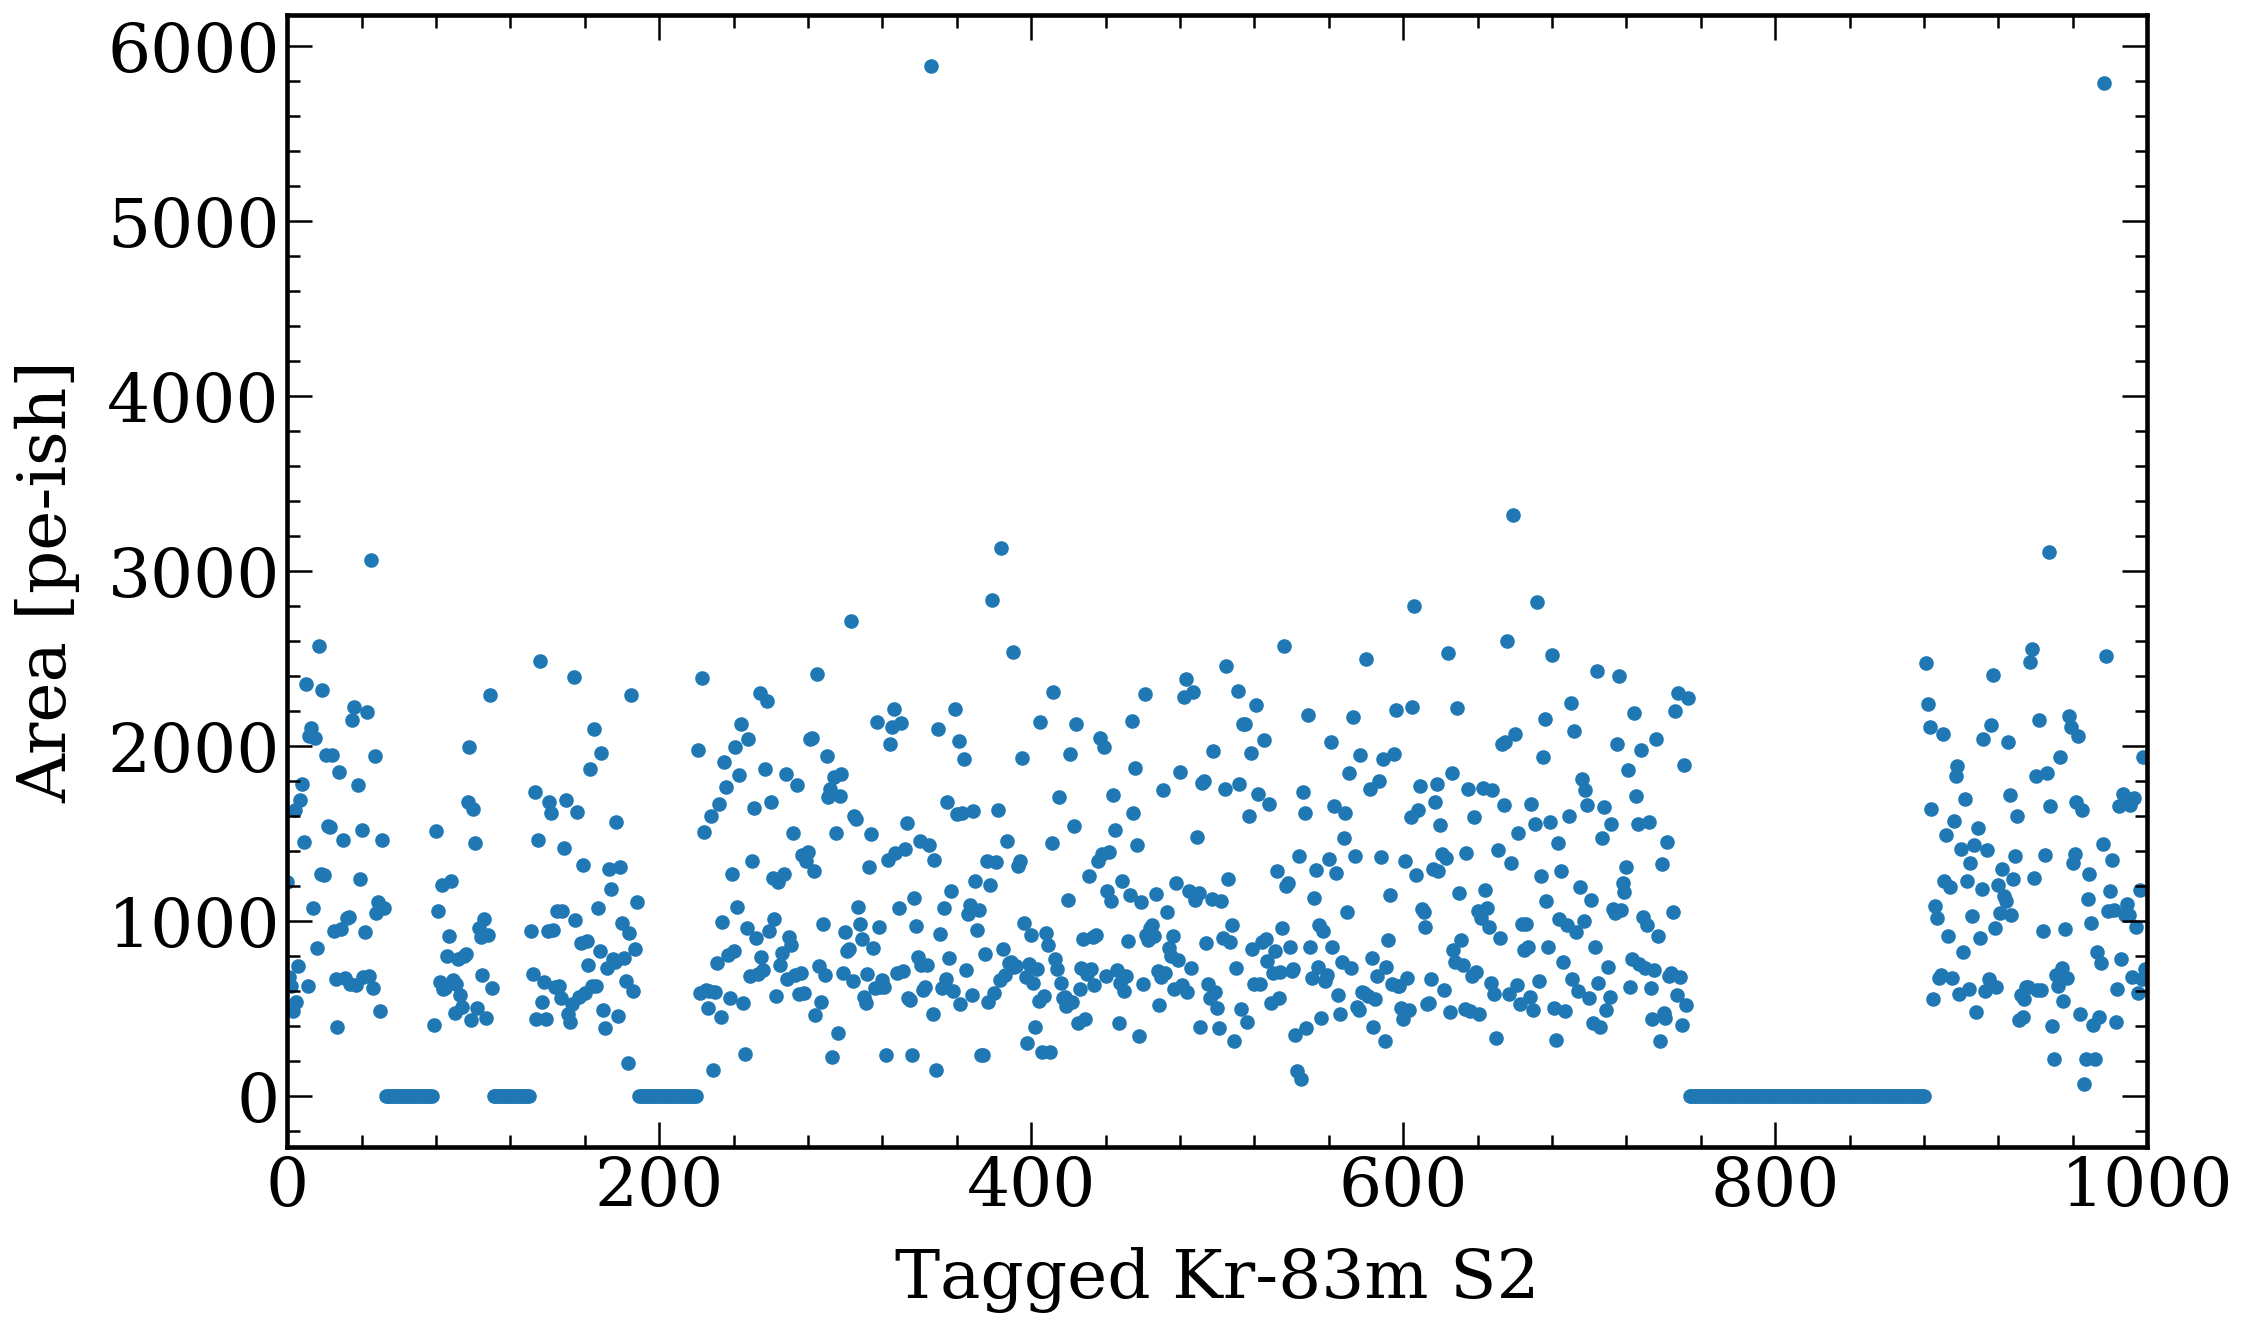

In [11]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot
plt.scatter([i for i in range(0, len(PMT7_area))][0:1000], PMT7_area[0:1000])

plt.xlabel('Tagged Kr-83m S2', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Area [pe-ish]', fontsize = label_size, labelpad = label_pad)
rng = 1000
plt.xlim(0,rng)

'''# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)'''

fig.savefig(filenameprefix+"_PMT7_area_scatter.png")

plt.show()

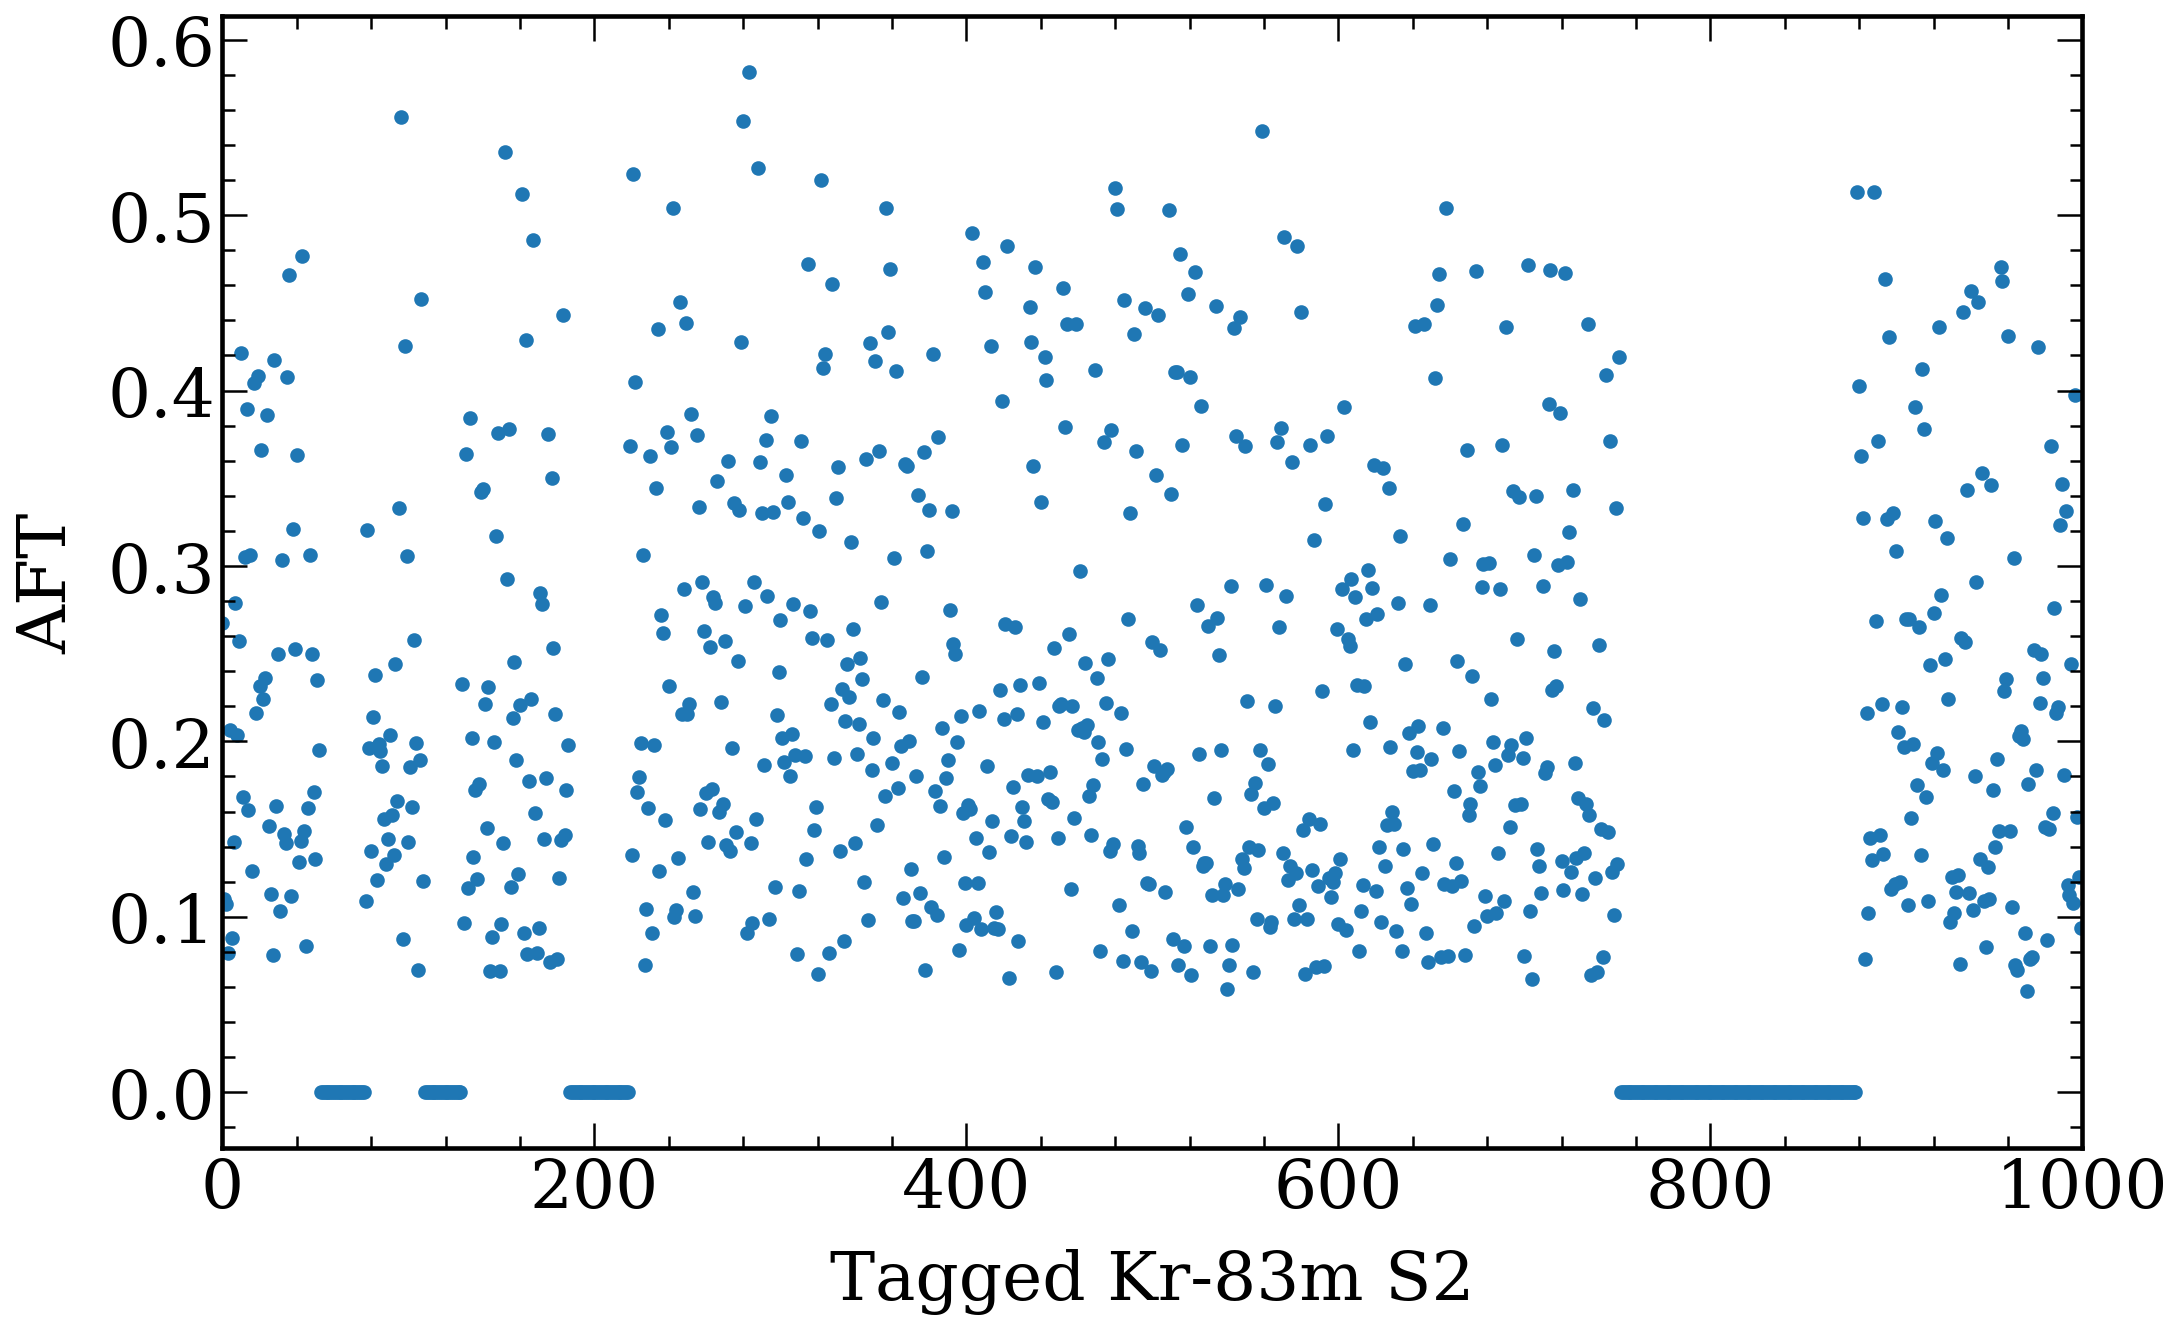

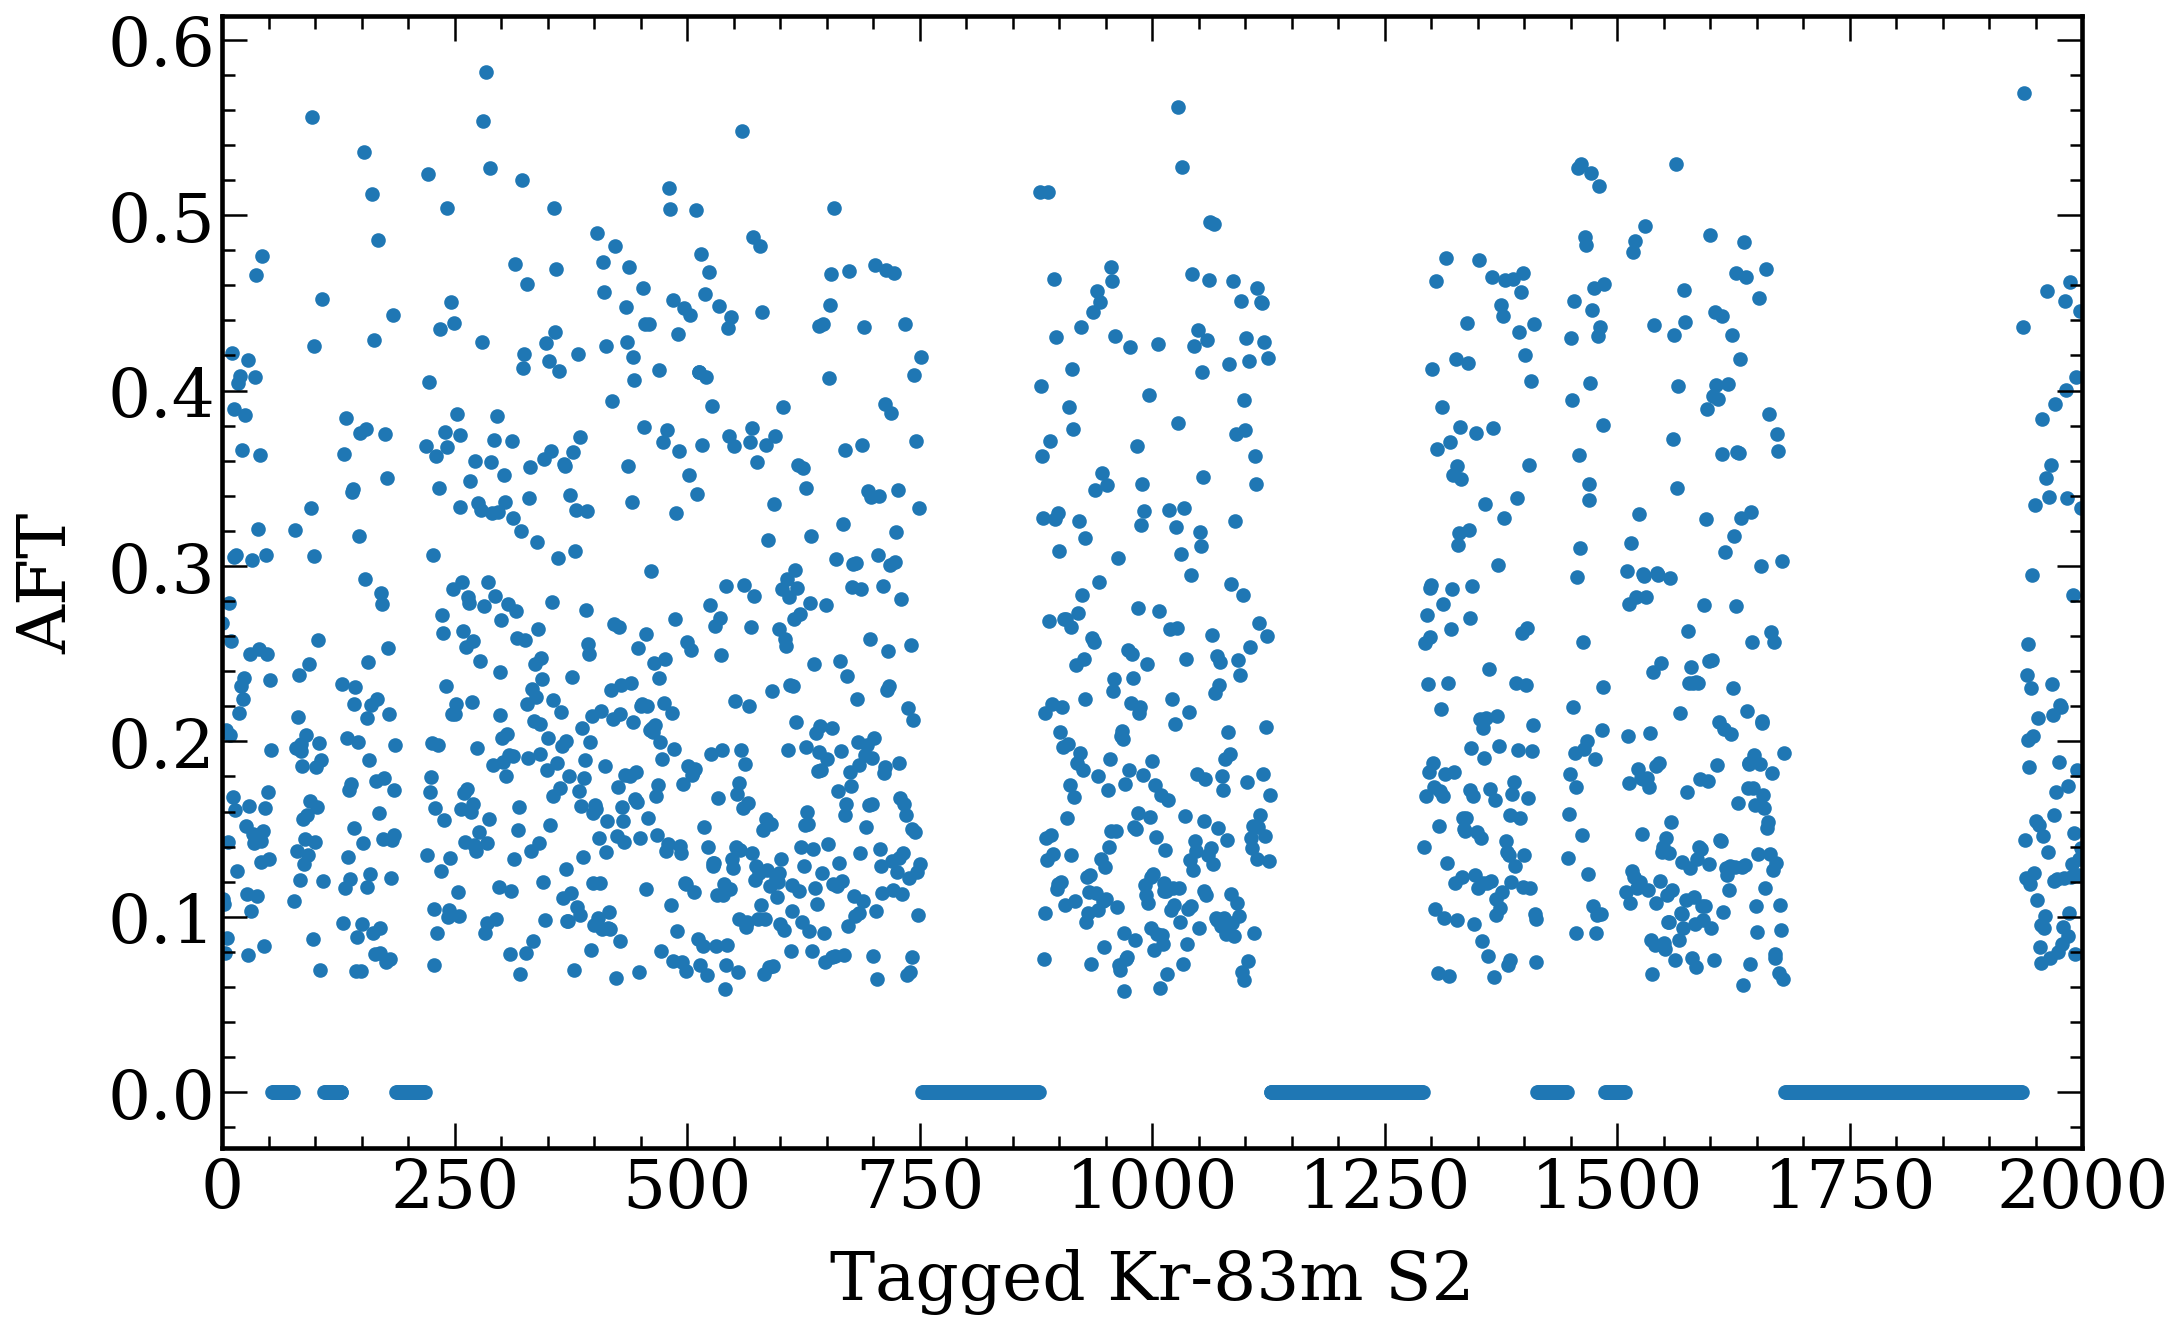

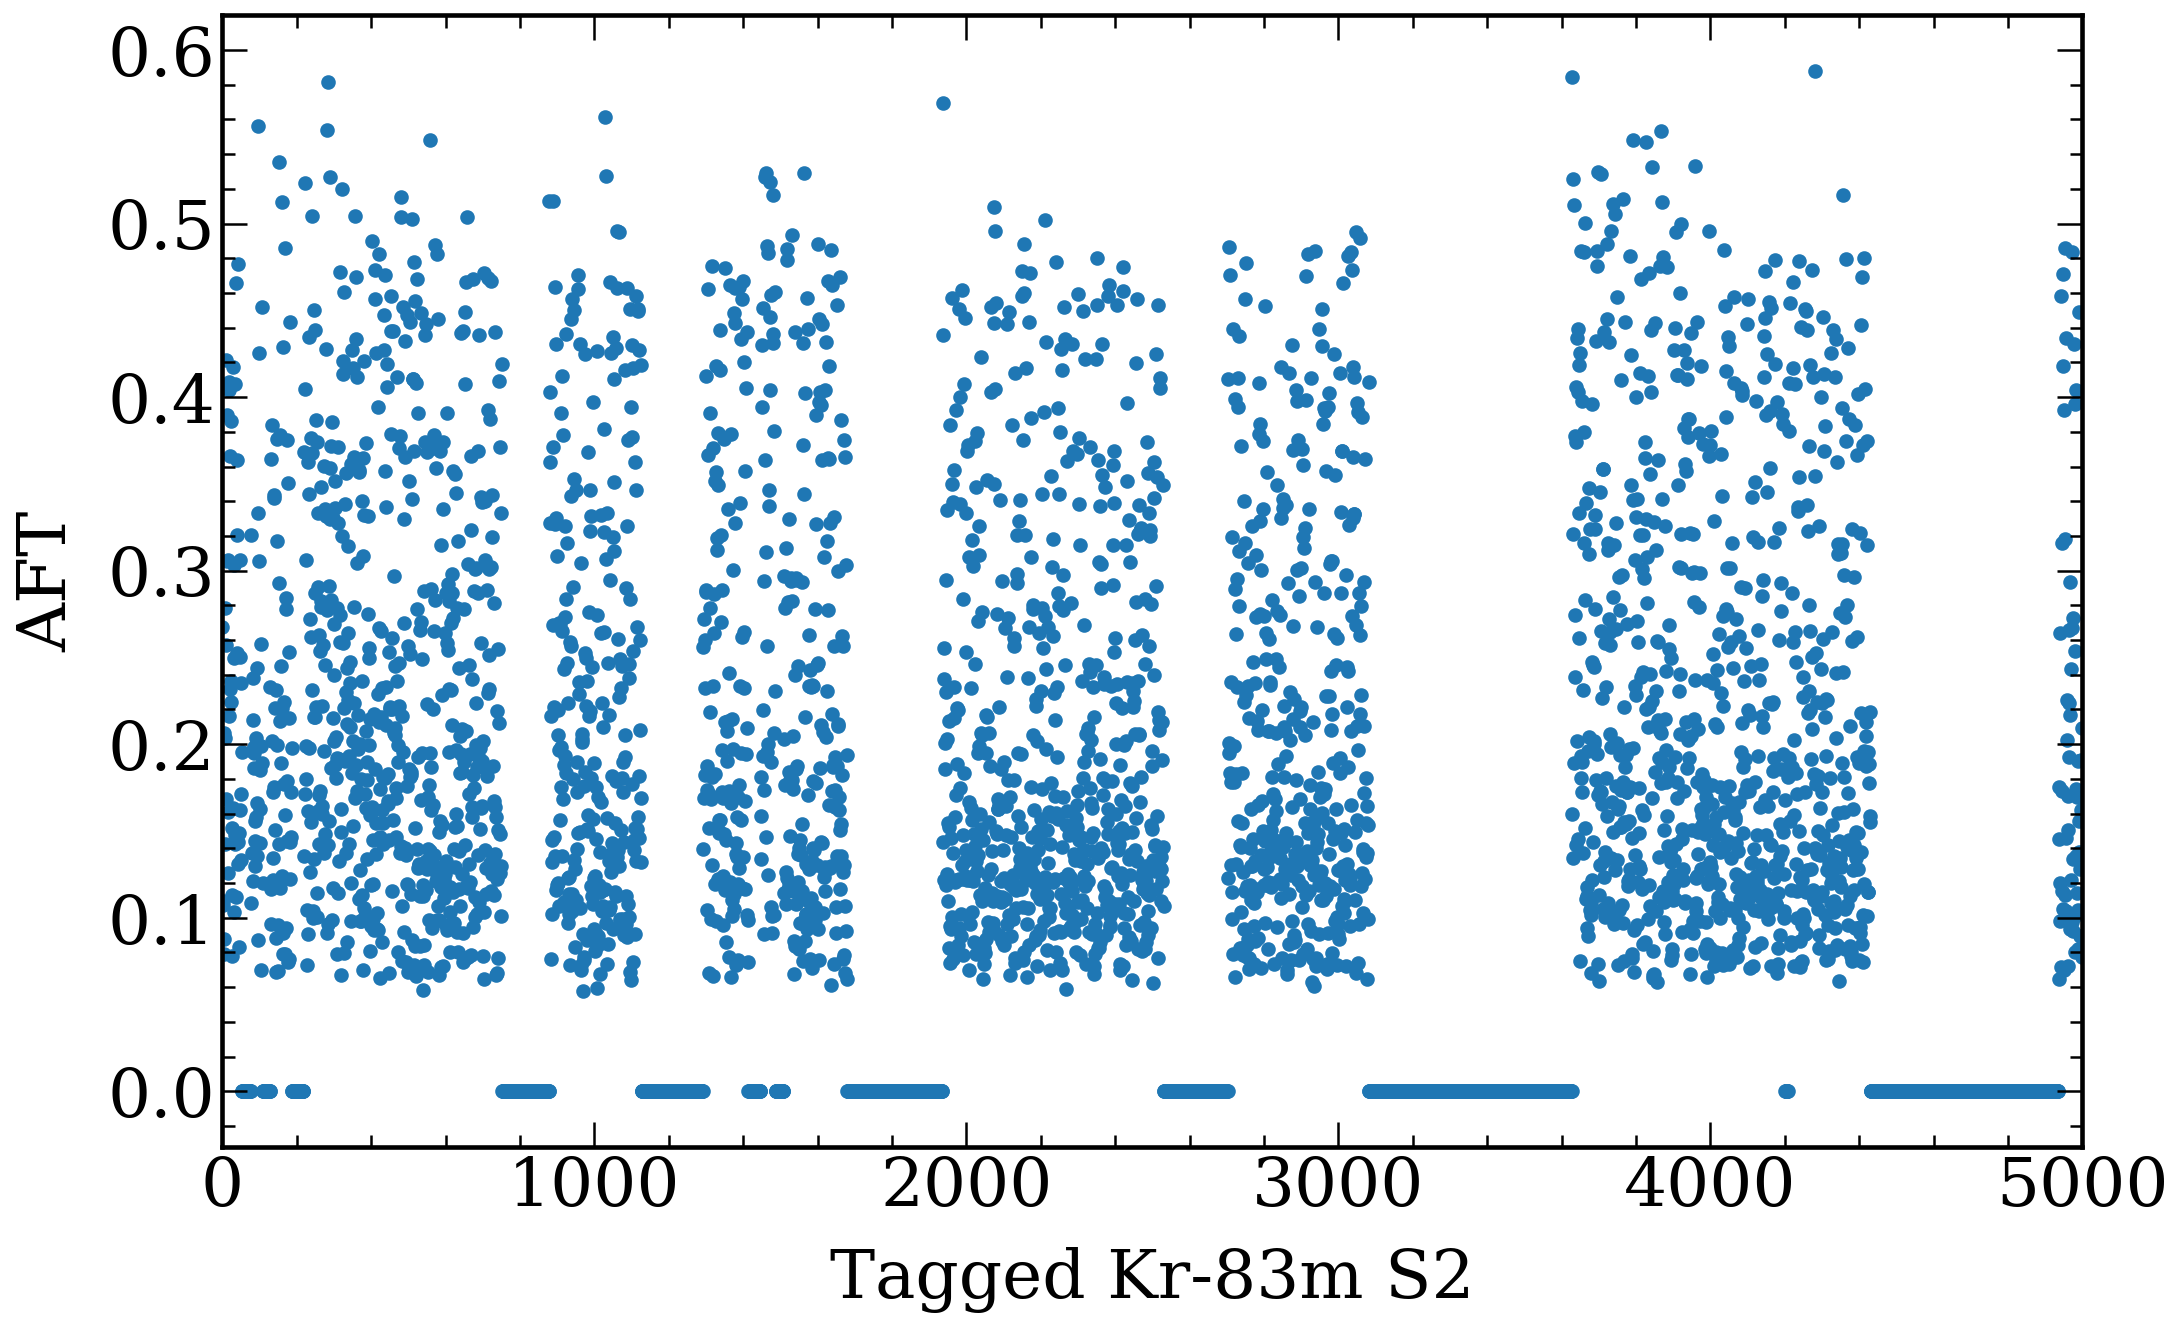

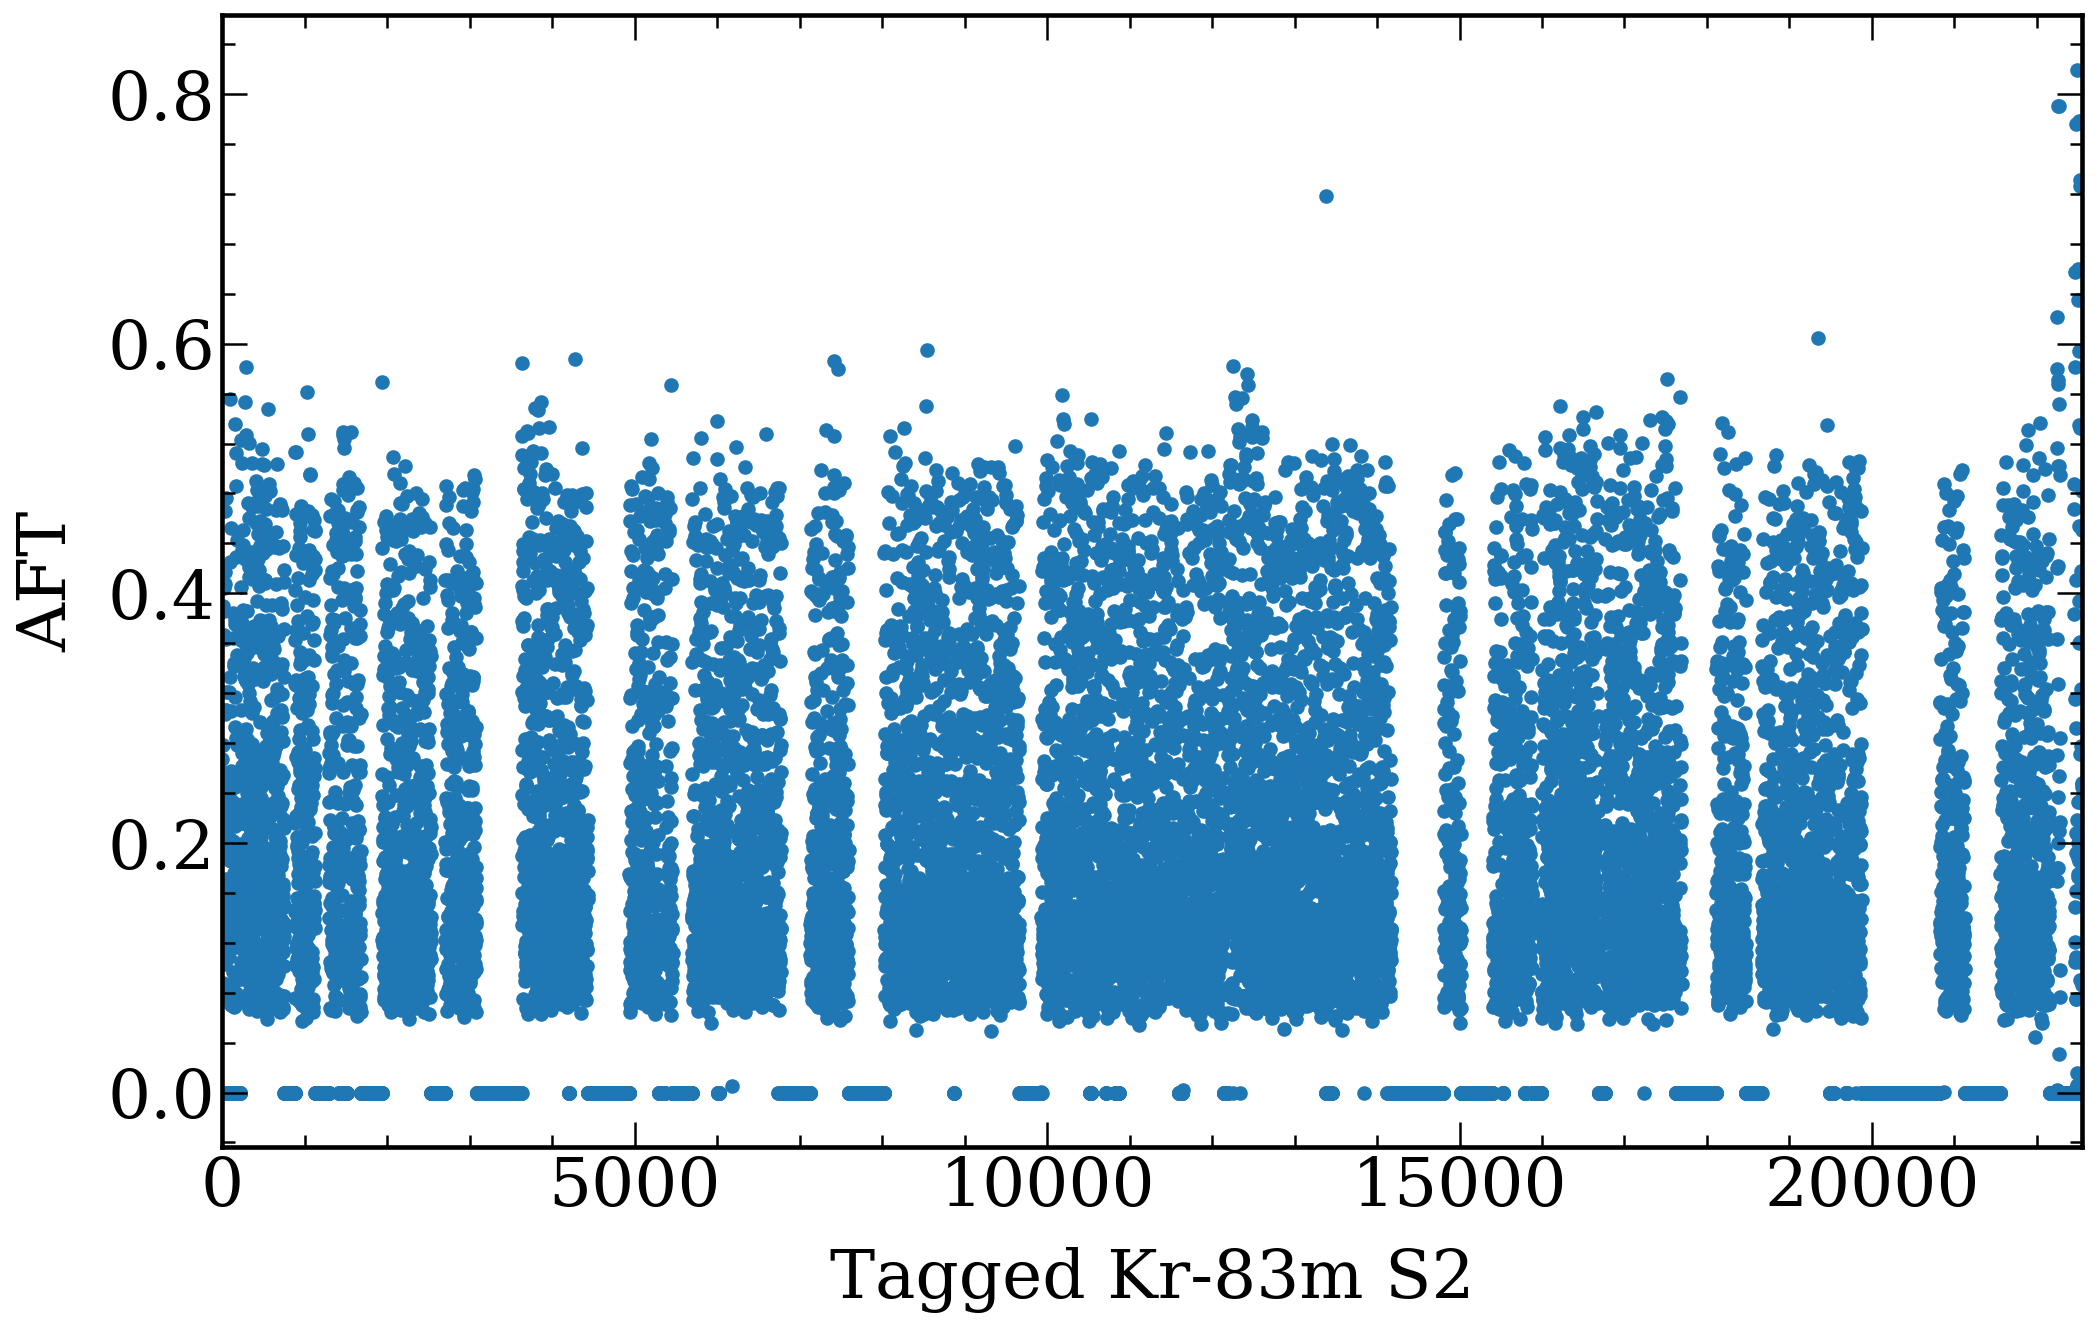

In [12]:
for rng in [1000, 2000, 5000, len(PMT1_HF)]:   
    
    #############################################
    ## Set plot styles:
    #############################################

    fig=plt.figure(figsize=(16, 10), dpi=150)

    # Text options
    #plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    # Labels
    label_size = 32.5 #25
    label_pad = 13 #10
    title_size = 39 #30
    title_pad = 26 #20

    # Axes Parameters
    axes = plt.gca()
    axes.tick_params(axis='both') 

    # Axes ---> Linewidth
    for axis in ['top','bottom','left','right']:
        axes.spines[axis].set_linewidth(2.2)

    # Axes ---> Ticks
    axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
    plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
    axes.yaxis.set_minor_locator(AutoMinorLocator(5))
    plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
    plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

    # Grid
    #plt.grid(True)

    #############################################
    ## Plot specific settings and plot data
    #############################################

    # Data plot
    rng = rng
    plt.scatter([i for i in range(0, len(PMT7_HF))][0:rng], PMT7_HF[0:rng])

    plt.xlabel('Tagged Kr-83m S2', fontsize = label_size, labelpad = label_pad)
    plt.ylabel('AFT', fontsize = label_size, labelpad = label_pad)
    plt.xlim(0,rng)

    '''# Legend
    leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
    #leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
    for line in leg.get_lines(): # enumerated
        line.set_linewidth(4)
    leg.get_frame().set_linewidth(2.5)'''

    fig.savefig(filenameprefix+"_PMT7_AFT_scatter_rng"+str(rng)+".png")

    plt.show()

In [13]:
print('Events total:             '+str(len(PMT1_HF)))
## Identifiy  dead channels
## dead_channel = False if channel is returning 0 i.e. is dead
dead_channel = (np.array(PMT1_HF) > 0)*(np.array(PMT2_HF) > 0)*(np.array(PMT3_HF) > 0)*(np.array(PMT4_HF) > 0)*(np.array(PMT5_HF) > 0)*(np.array(PMT6_HF) > 0)*(np.array(PMT7_HF) > 0)
print('Events with dead channel:  '+str(len(PMT1_HF)-(dead_channel*1).sum()) + ' = '+str(10*round(10*(len(PMT1_HF)-(dead_channel*1).sum())/(len(PMT1_HF)),2))+' % of total')
print('Events remaining:         '+str((dead_channel*1).sum()))

Events total:             22552
Events with dead channel:  9335 = 41.4 % of total
Events remaining:         13217


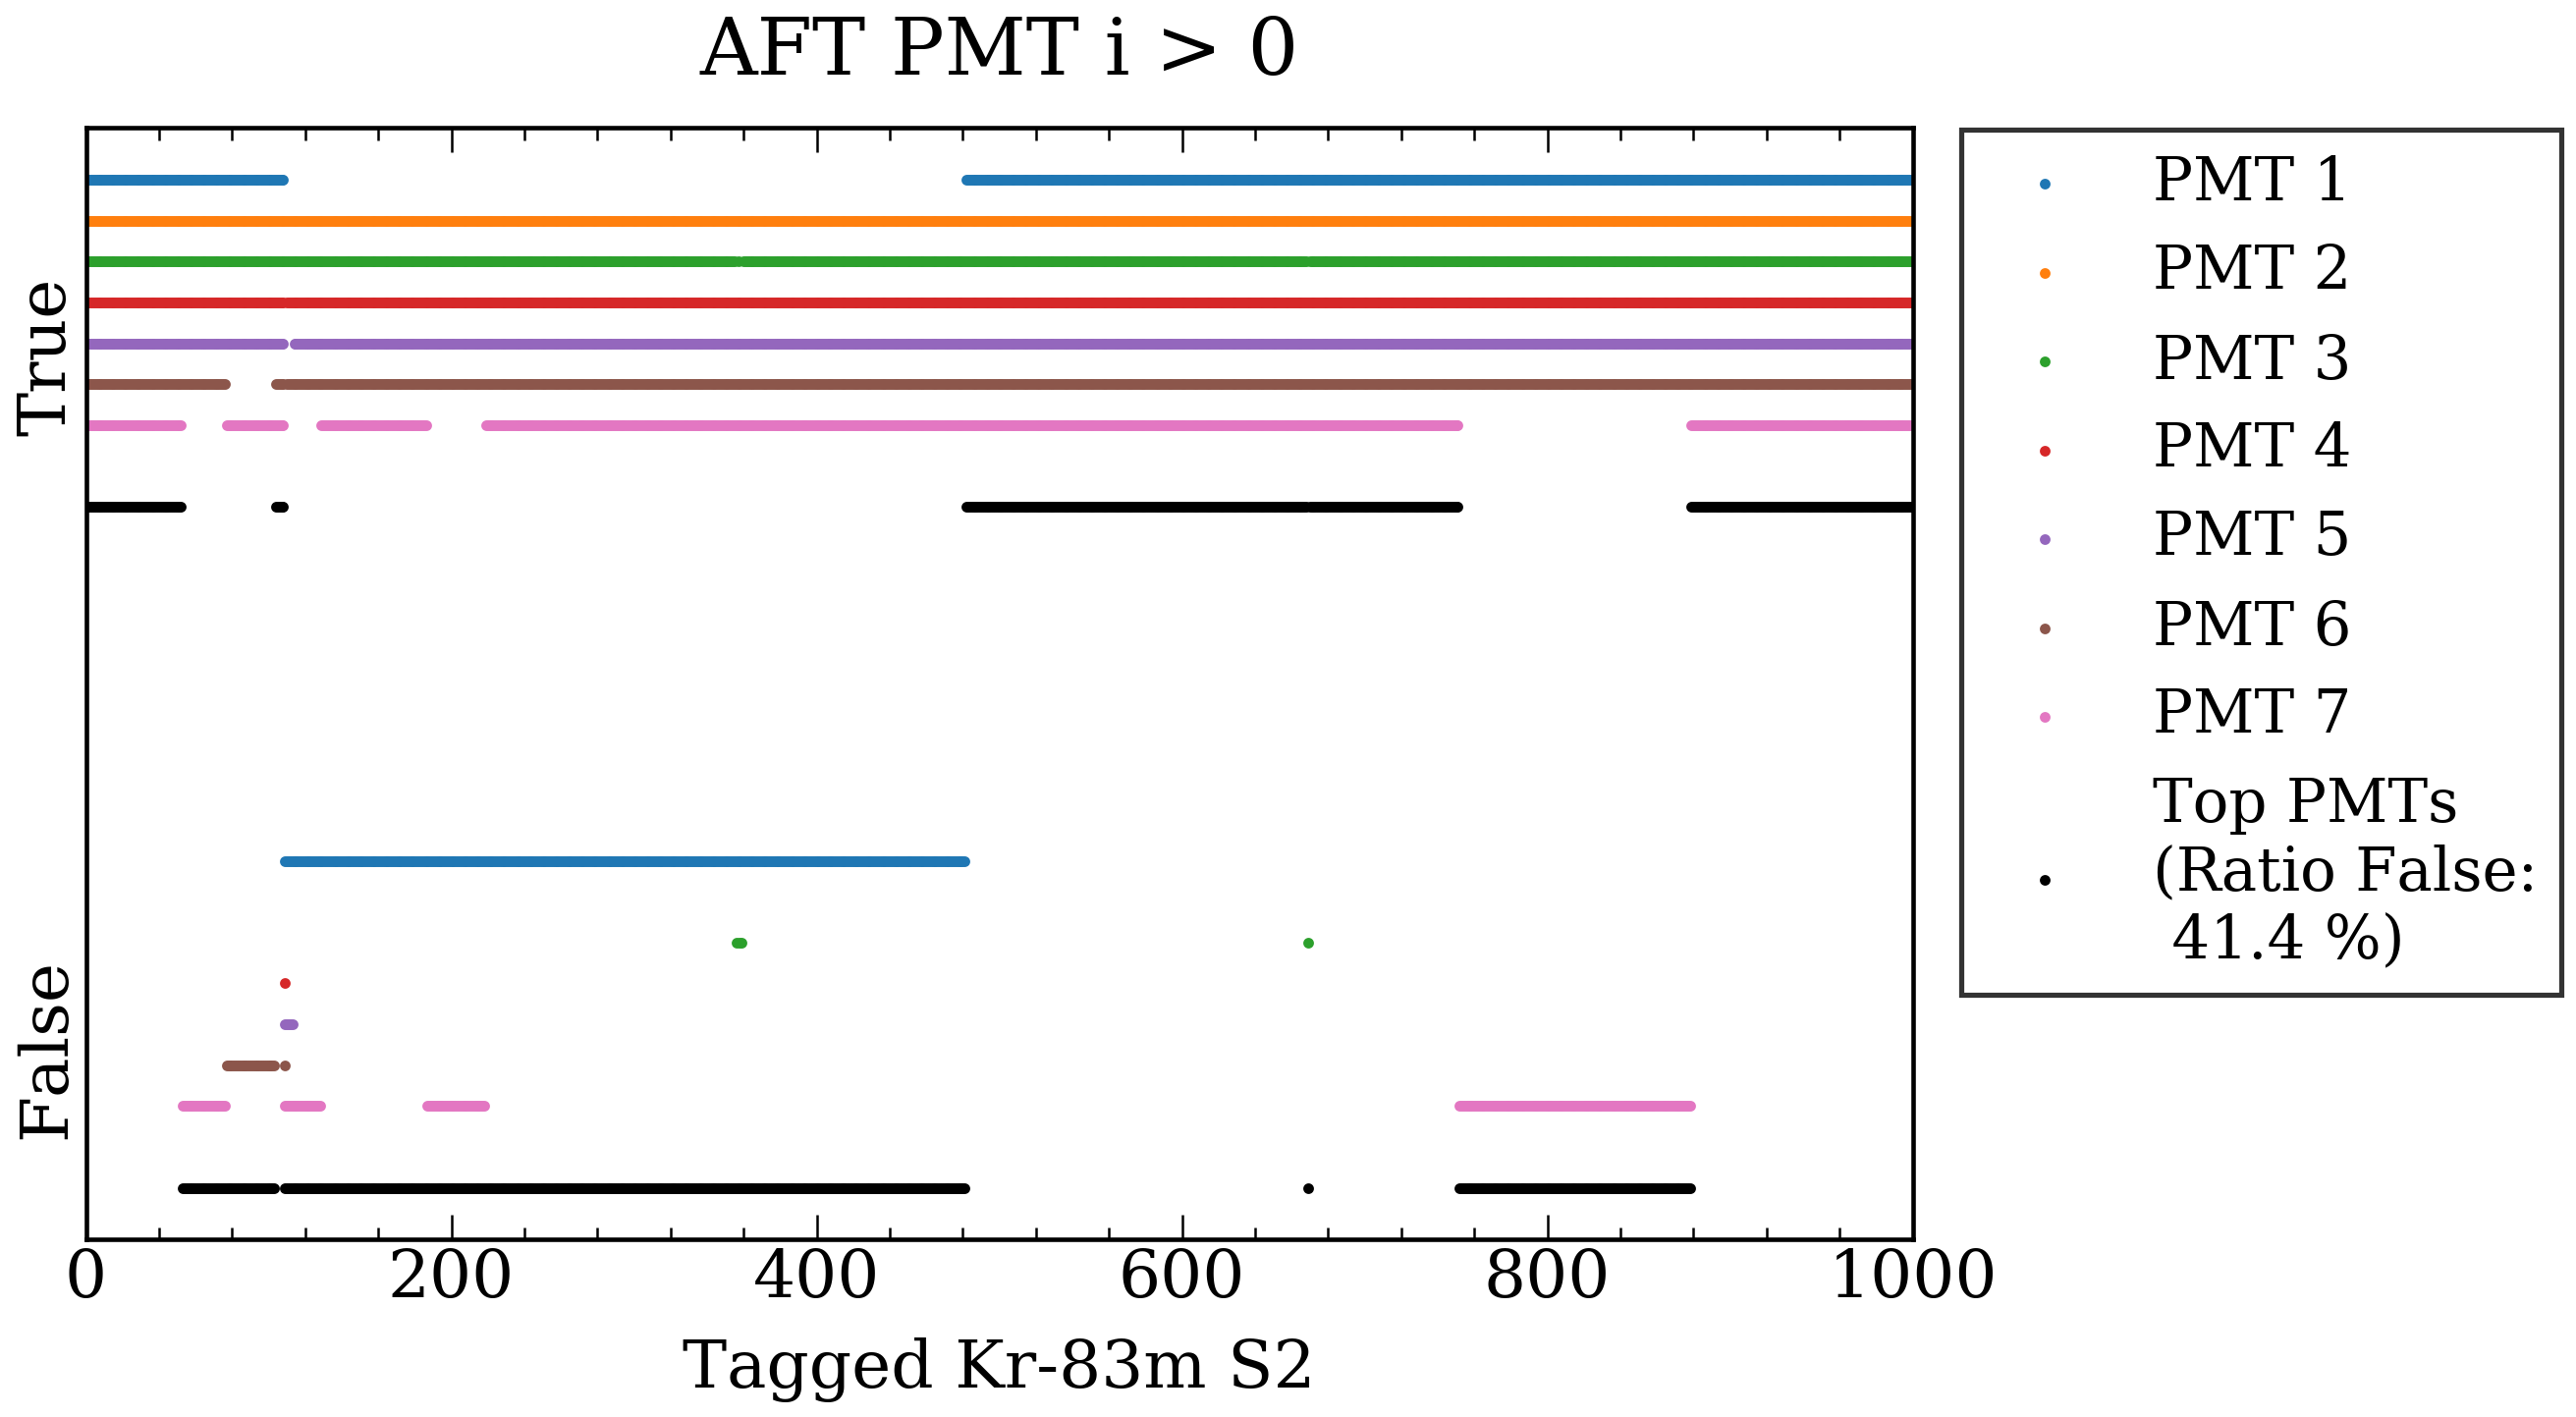

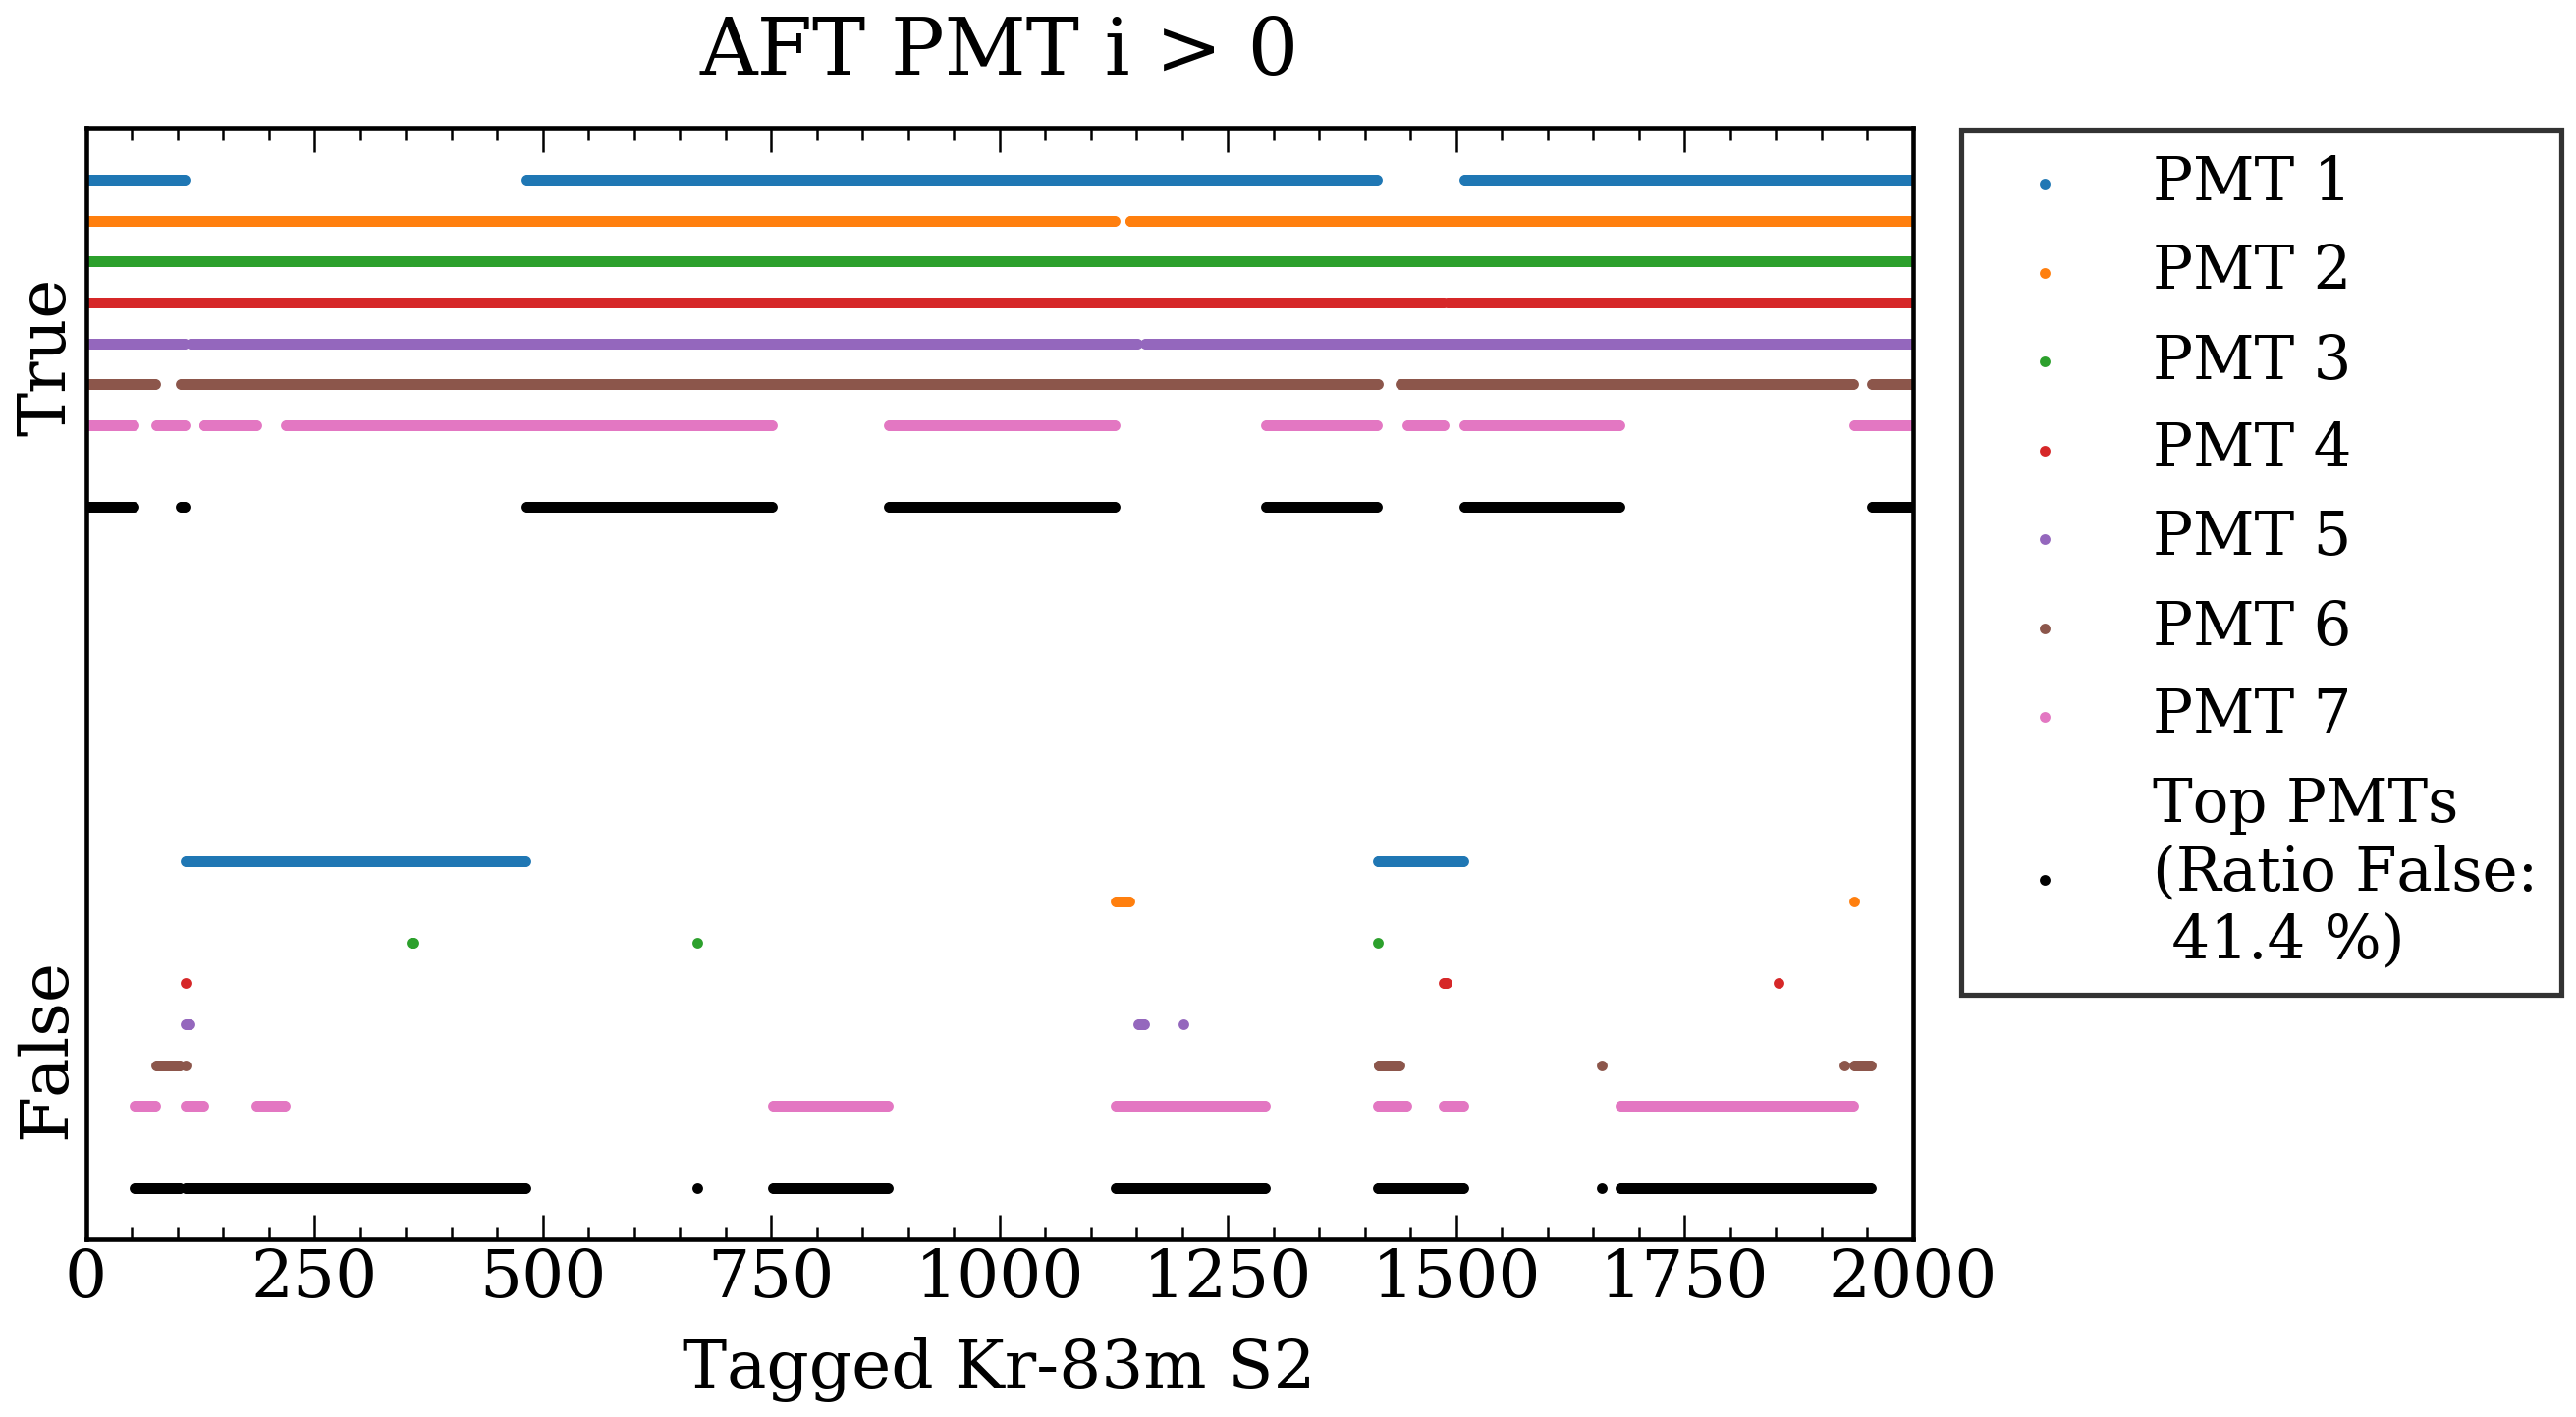

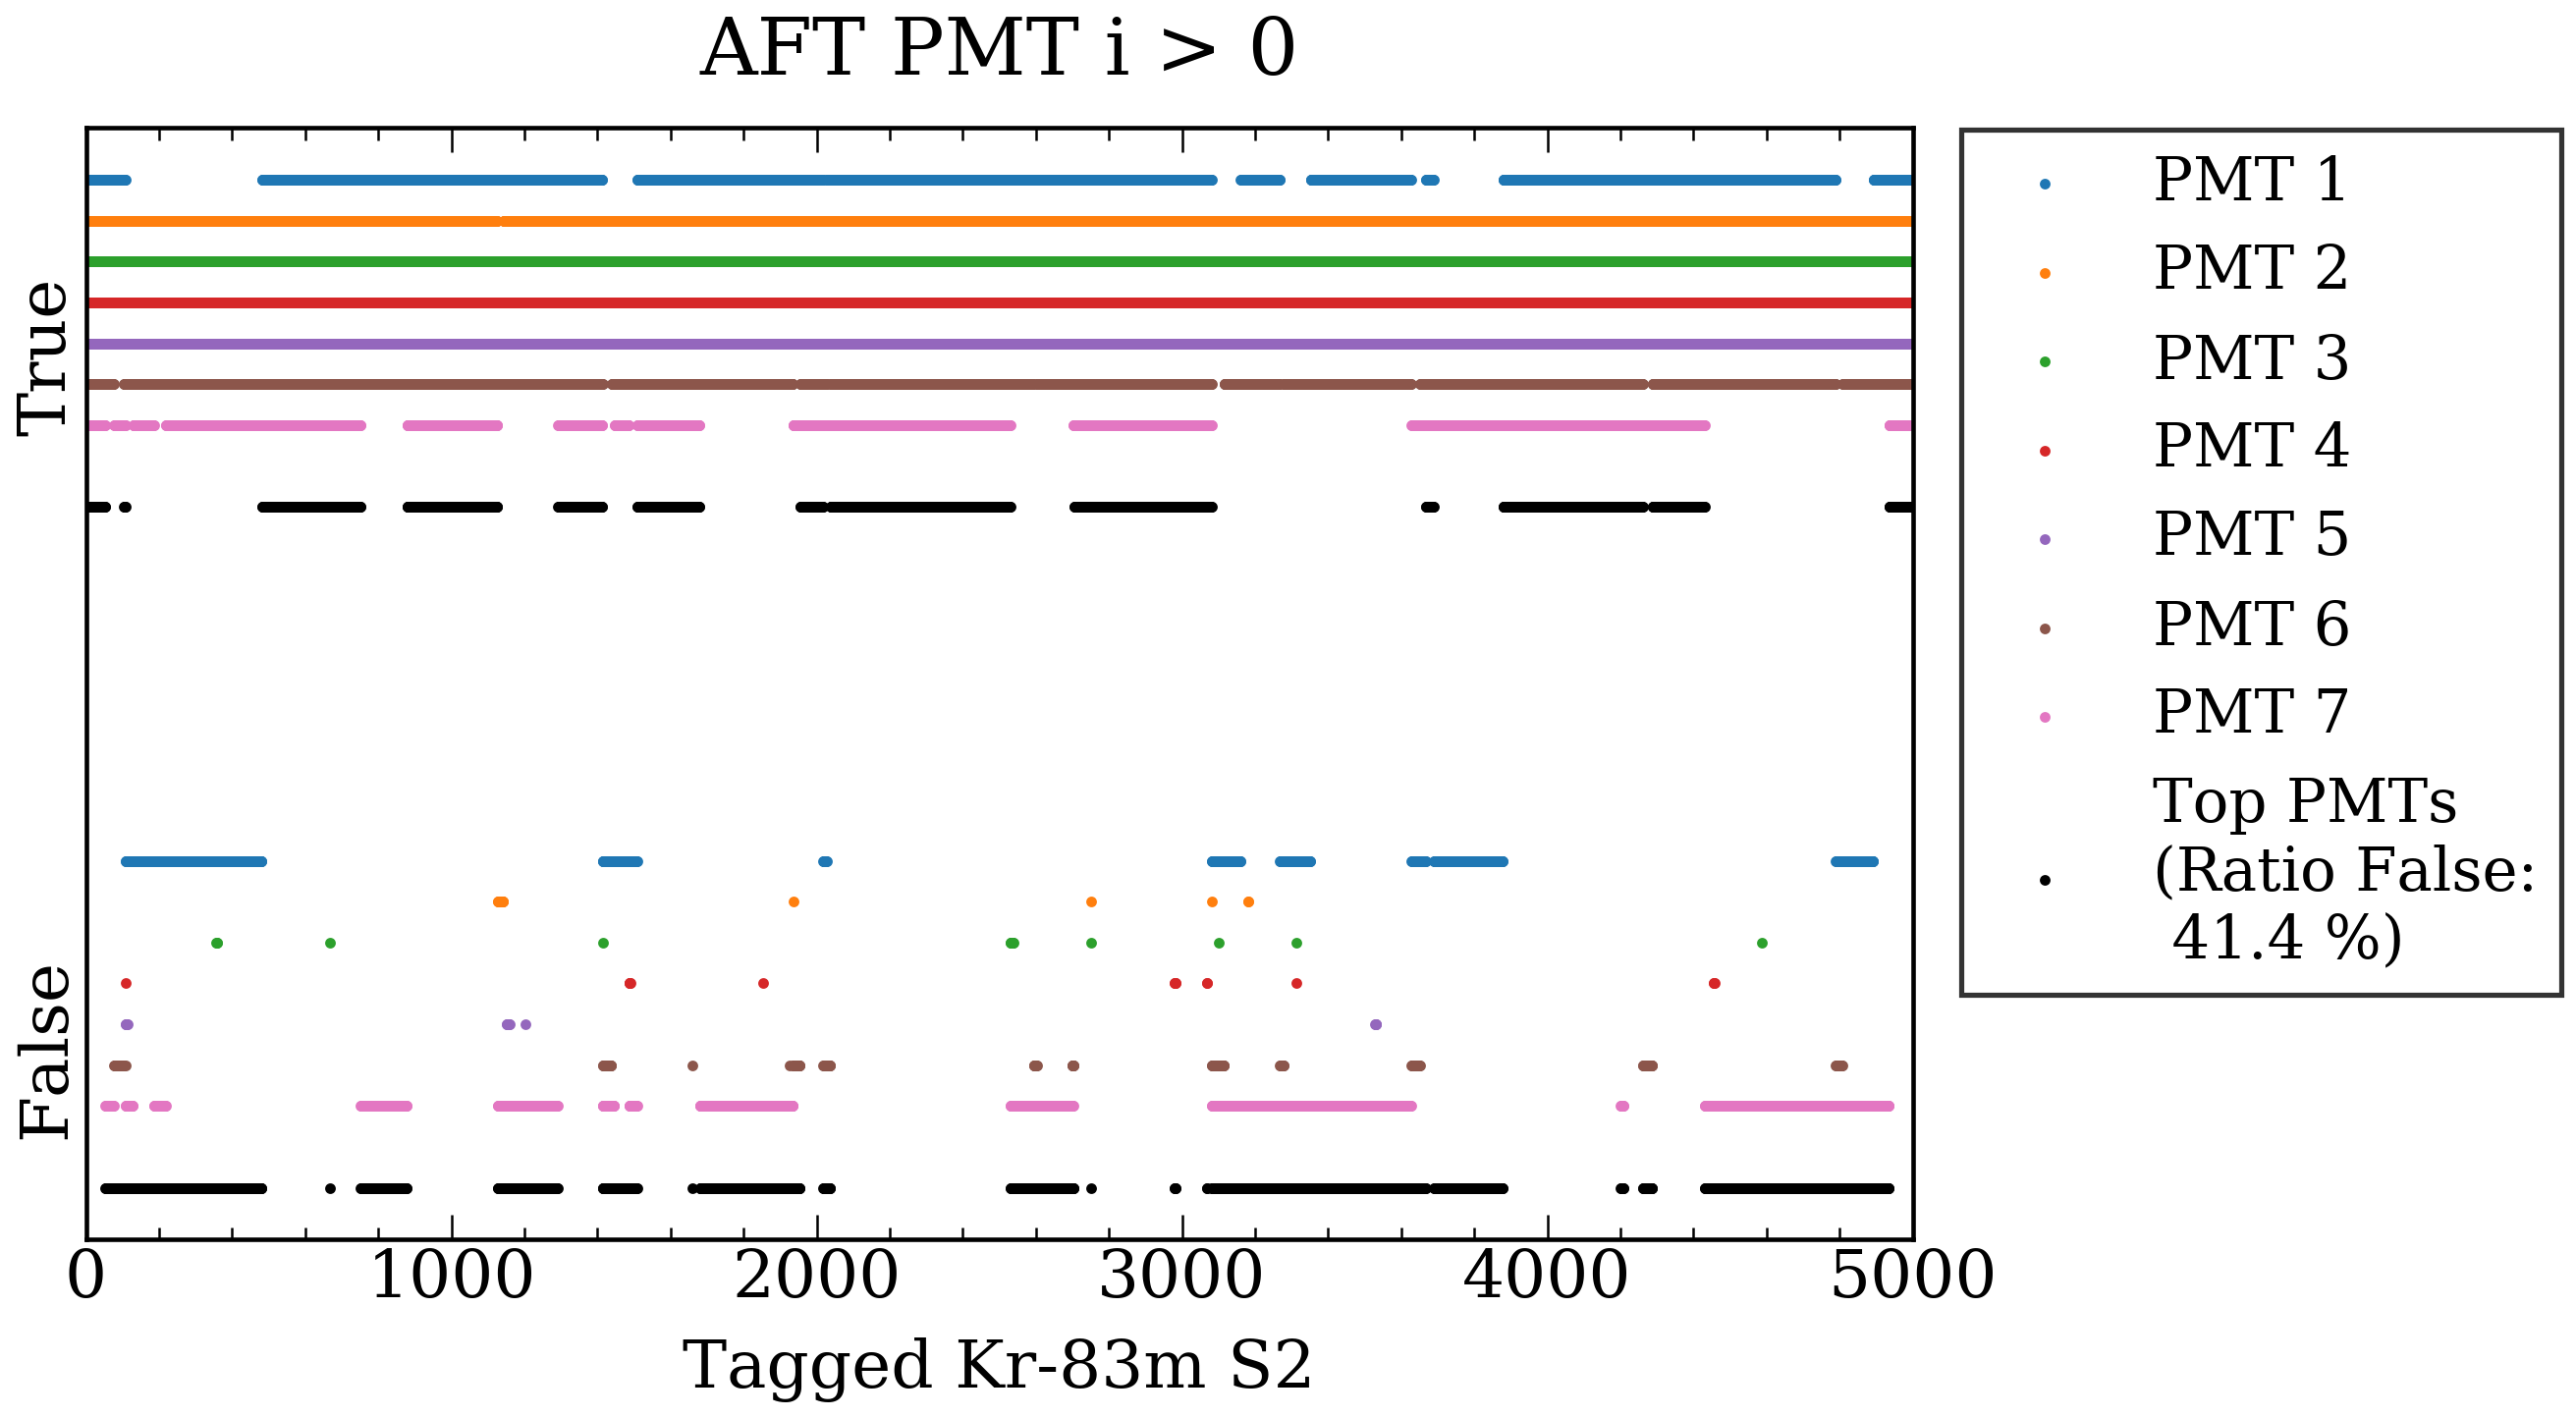

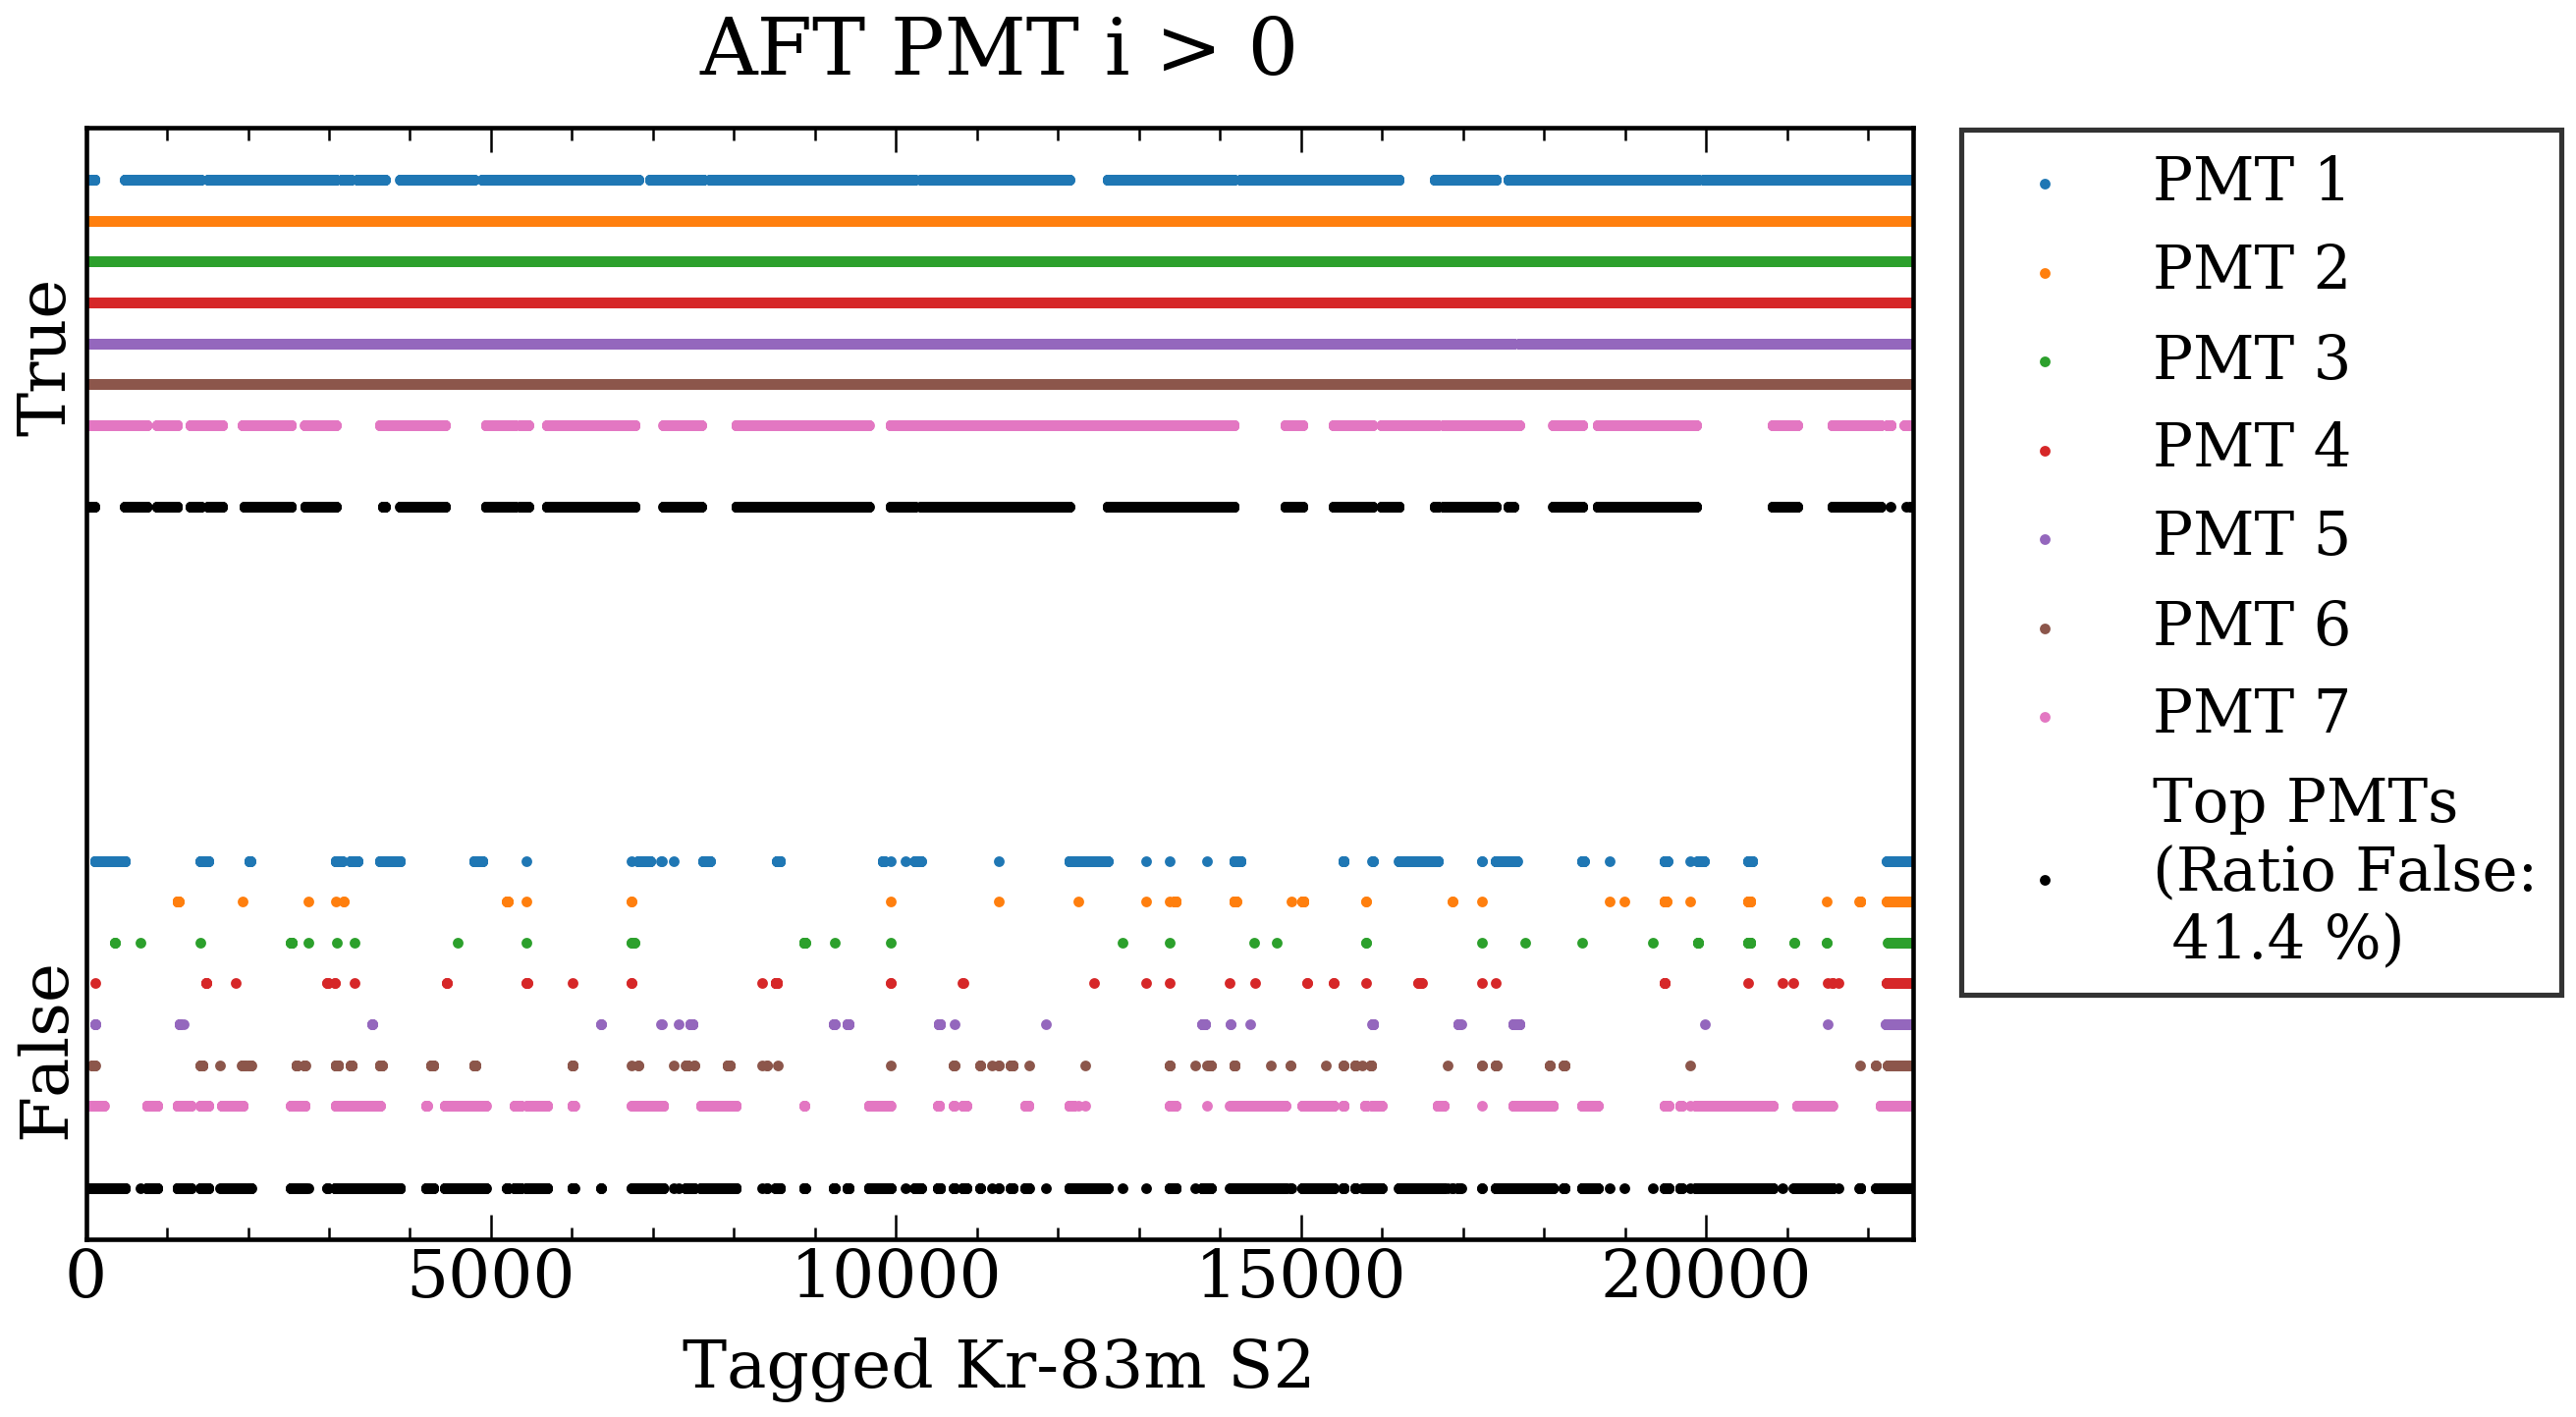

In [14]:
for rng in [1000, 2000, 5000, len(PMT1_HF)]:
    
    #############################################
    ## Set plot styles:
    #############################################

    fig=plt.figure(figsize=(16, 10), dpi=150)

    # Text options
    #plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    # Labels
    label_size = 32.5 #25
    label_pad = 13 #10
    title_size = 39 #30
    title_pad = 26 #20

    # Axes Parameters
    axes = plt.gca()
    axes.tick_params(axis='both') 

    # Axes ---> Linewidth
    for axis in ['top','bottom','left','right']:
        axes.spines[axis].set_linewidth(2.2)

    # Axes ---> Ticks
    axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
    plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
    axes.yaxis.set_minor_locator(AutoMinorLocator(5))
    plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=False, left=False, width=1.2, length=6)
    plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=False, left=False, width=1.2, length=12)

    # Grid
    #plt.grid(True)

    #############################################
    ## Plot specific settings and plot data
    #############################################

    # Data plot
    rng = rng
    plt.scatter([i for i in range(0, rng)], (0.5*(np.array(PMT1_HF) > 0)+0.09)[0:rng], marker = '.', linewidth = 2.2, 
                label='PMT 1')
    plt.scatter([i for i in range(0, rng)], (0.5*(np.array(PMT2_HF) > 0)+0.06)[0:rng], marker = '.', linewidth = 2.2, label='PMT 2')
    plt.scatter([i for i in range(0, rng)], (0.5*(np.array(PMT3_HF) > 0)+0.03)[0:rng], marker = '.', linewidth = 2.2, label='PMT 3')
    plt.scatter([i for i in range(0, rng)], (0.5*(np.array(PMT4_HF) > 0)+0.00)[0:rng], marker = '.', linewidth = 2.2, label='PMT 4')
    plt.scatter([i for i in range(0, rng)], (0.5*(np.array(PMT5_HF) > 0)-0.03)[0:rng], marker = '.', linewidth = 2.2, label='PMT 5')
    plt.scatter([i for i in range(0, rng)], (0.5*(np.array(PMT6_HF) > 0)-0.06)[0:rng], marker = '.', linewidth = 2.2, label='PMT 6')
    plt.scatter([i for i in range(0, rng)], (0.5*(np.array(PMT7_HF) > 0)-0.09)[0:rng], marker = '.', linewidth = 2.2, label='PMT 7')
    plt.scatter([i for i in range(0, rng)], (0.5*dead_channel-0.12-0.03)[0:rng], marker = '.', linewidth = 2.2, 
                label='Top PMTs\n(Ratio False:\n '+str(10*round(10*(len(PMT1_HF)-(dead_channel*1).sum())/(len(PMT1_HF)),2))+' %)', color='black')

    plt.xlabel('Tagged Kr-83m S2', fontsize = label_size, labelpad = label_pad)
    plt.yticks((0,0.5), ('False', 'True'), rotation='vertical')
    plt.xlim(0,rng)
    plt.title('AFT PMT i > 0', fontsize = title_size, pad = title_pad)

    # Legend
    leg = plt.legend(loc=2, bbox_to_anchor=(1.01,1.025), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
    for line in leg.get_lines(): # enumerated
        line.set_linewidth(4)
    leg.get_frame().set_linewidth(2.5)

    fig.savefig(filenameprefix+"_AFTlarger0_rng"+str(rng)+".png", bbox_inches='tight')

    plt.show()

In [15]:
## Remove dead channels and convert to np.arrays

try:
    PMT1_HF = np.array(PMT1_HF)[dead_channel]
    PMT2_HF = np.array(PMT2_HF)[dead_channel]
    PMT3_HF = np.array(PMT3_HF)[dead_channel]
    PMT4_HF = np.array(PMT4_HF)[dead_channel]
    PMT5_HF = np.array(PMT5_HF)[dead_channel]
    PMT6_HF = np.array(PMT6_HF)[dead_channel]
    PMT7_HF = np.array(PMT7_HF)[dead_channel]
    
    dead_channel_area = (np.array(PMT1_area) > 0)*(np.array(PMT2_area) > 0)*(np.array(PMT3_area) > 0)*(np.array(PMT4_area) > 0)*(np.array(PMT5_area) > 0)*(np.array(PMT6_area) > 0)*(np.array(PMT7_area) > 0)
    PMT1_area = np.array(PMT1_area)[dead_channel_area]
    PMT2_area = np.array(PMT2_area)[dead_channel_area]
    PMT3_area = np.array(PMT3_area)[dead_channel_area]
    PMT4_area = np.array(PMT4_area)[dead_channel_area]
    PMT5_area = np.array(PMT5_area)[dead_channel_area]
    PMT6_area = np.array(PMT6_area)[dead_channel_area]
    PMT7_area = np.array(PMT7_area)[dead_channel_area]    
    
except:
    print('Dead channels already removed.')
    
if len(PMT1_HF)==len(PMT2_HF)==len(PMT3_HF)==len(PMT4_HF)==len(PMT5_HF)==len(PMT6_HF)==len(PMT7_HF):
    if len(PMT1_HF)==len(PMT1_area):
        print('Remaining S2 Counts: '+str(len(PMT1_HF)))
    else:
        print('Remaining S2 Counts (HF):   '+str(len(PMT1_HF)))
        print('Remaining S2 Counts (area): '+str(len(PMT1_area)))
else:
    print('ERROR: PMTi_HF arrays have different lenghts.')

Remaining S2 Counts: 13217


In [16]:
## Create pandas dataframe and save it

d = {'PMT1': [PMT1_area, PMT1_HF], 'PMT2': [PMT2_area, PMT2_HF], 
    'PMT3': [PMT3_area, PMT3_HF], 'PMT4': [PMT4_area, PMT4_HF], 
    'PMT5': [PMT5_area, PMT5_HF], 'PMT6': [PMT6_area, PMT6_HF], 
    'PMT7': [PMT7_area, PMT7_HF]}
df = pd.DataFrame(data=d, index = ['area', 'HF'])
df.to_pickle(filenameprefix+"_Kr83m_S2_AFT.pkl")

df

PMT1  \
area  [426.16977, 190.64023, 172.95564, 144.08025, 4...   
HF    [0.09338497074456319, 0.030777857546780384, 0....   

                                                   PMT2  \
area  [1846.7761, 524.09015, 636.9843, 105.065254, 1...   
HF    [0.40467707155995775, 0.08461158534880628, 0.1...   

                                                   PMT3  \
area  [537.56274, 3202.876, 3091.1914, 149.54991, 20...   
HF    [0.11779409229076401, 0.5170874030126767, 0.52...   

                                                   PMT4  \
area  [156.90564, 1062.0885, 908.21893, 650.06433, 3...   
HF    [0.03438213975791153, 0.17146857660377493, 0.1...   

                                                   PMT5  \
area  [189.35686, 308.73694, 258.4374, 4162.3887, 29...   
HF    [0.04149305242557372, 0.049843947408250516, 0....   

                                                   PMT6  \
area  [186.81871, 224.73189, 149.86327, 439.07626, 2...   
HF    [0.04093687787292209, 0.036281775846452, 0.025...   

                                                   PMT7  
area  [1219.99, 680.9071, 628.42194, 485.72406, 1632...  
HF    [0.2673317953483077, 0.10992885423325913, 0.10...

## Evaluation

In [17]:
from math import log10, floor
def round_to_1(x):
    return round(x, -int(floor(log10(abs(x)))))
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)

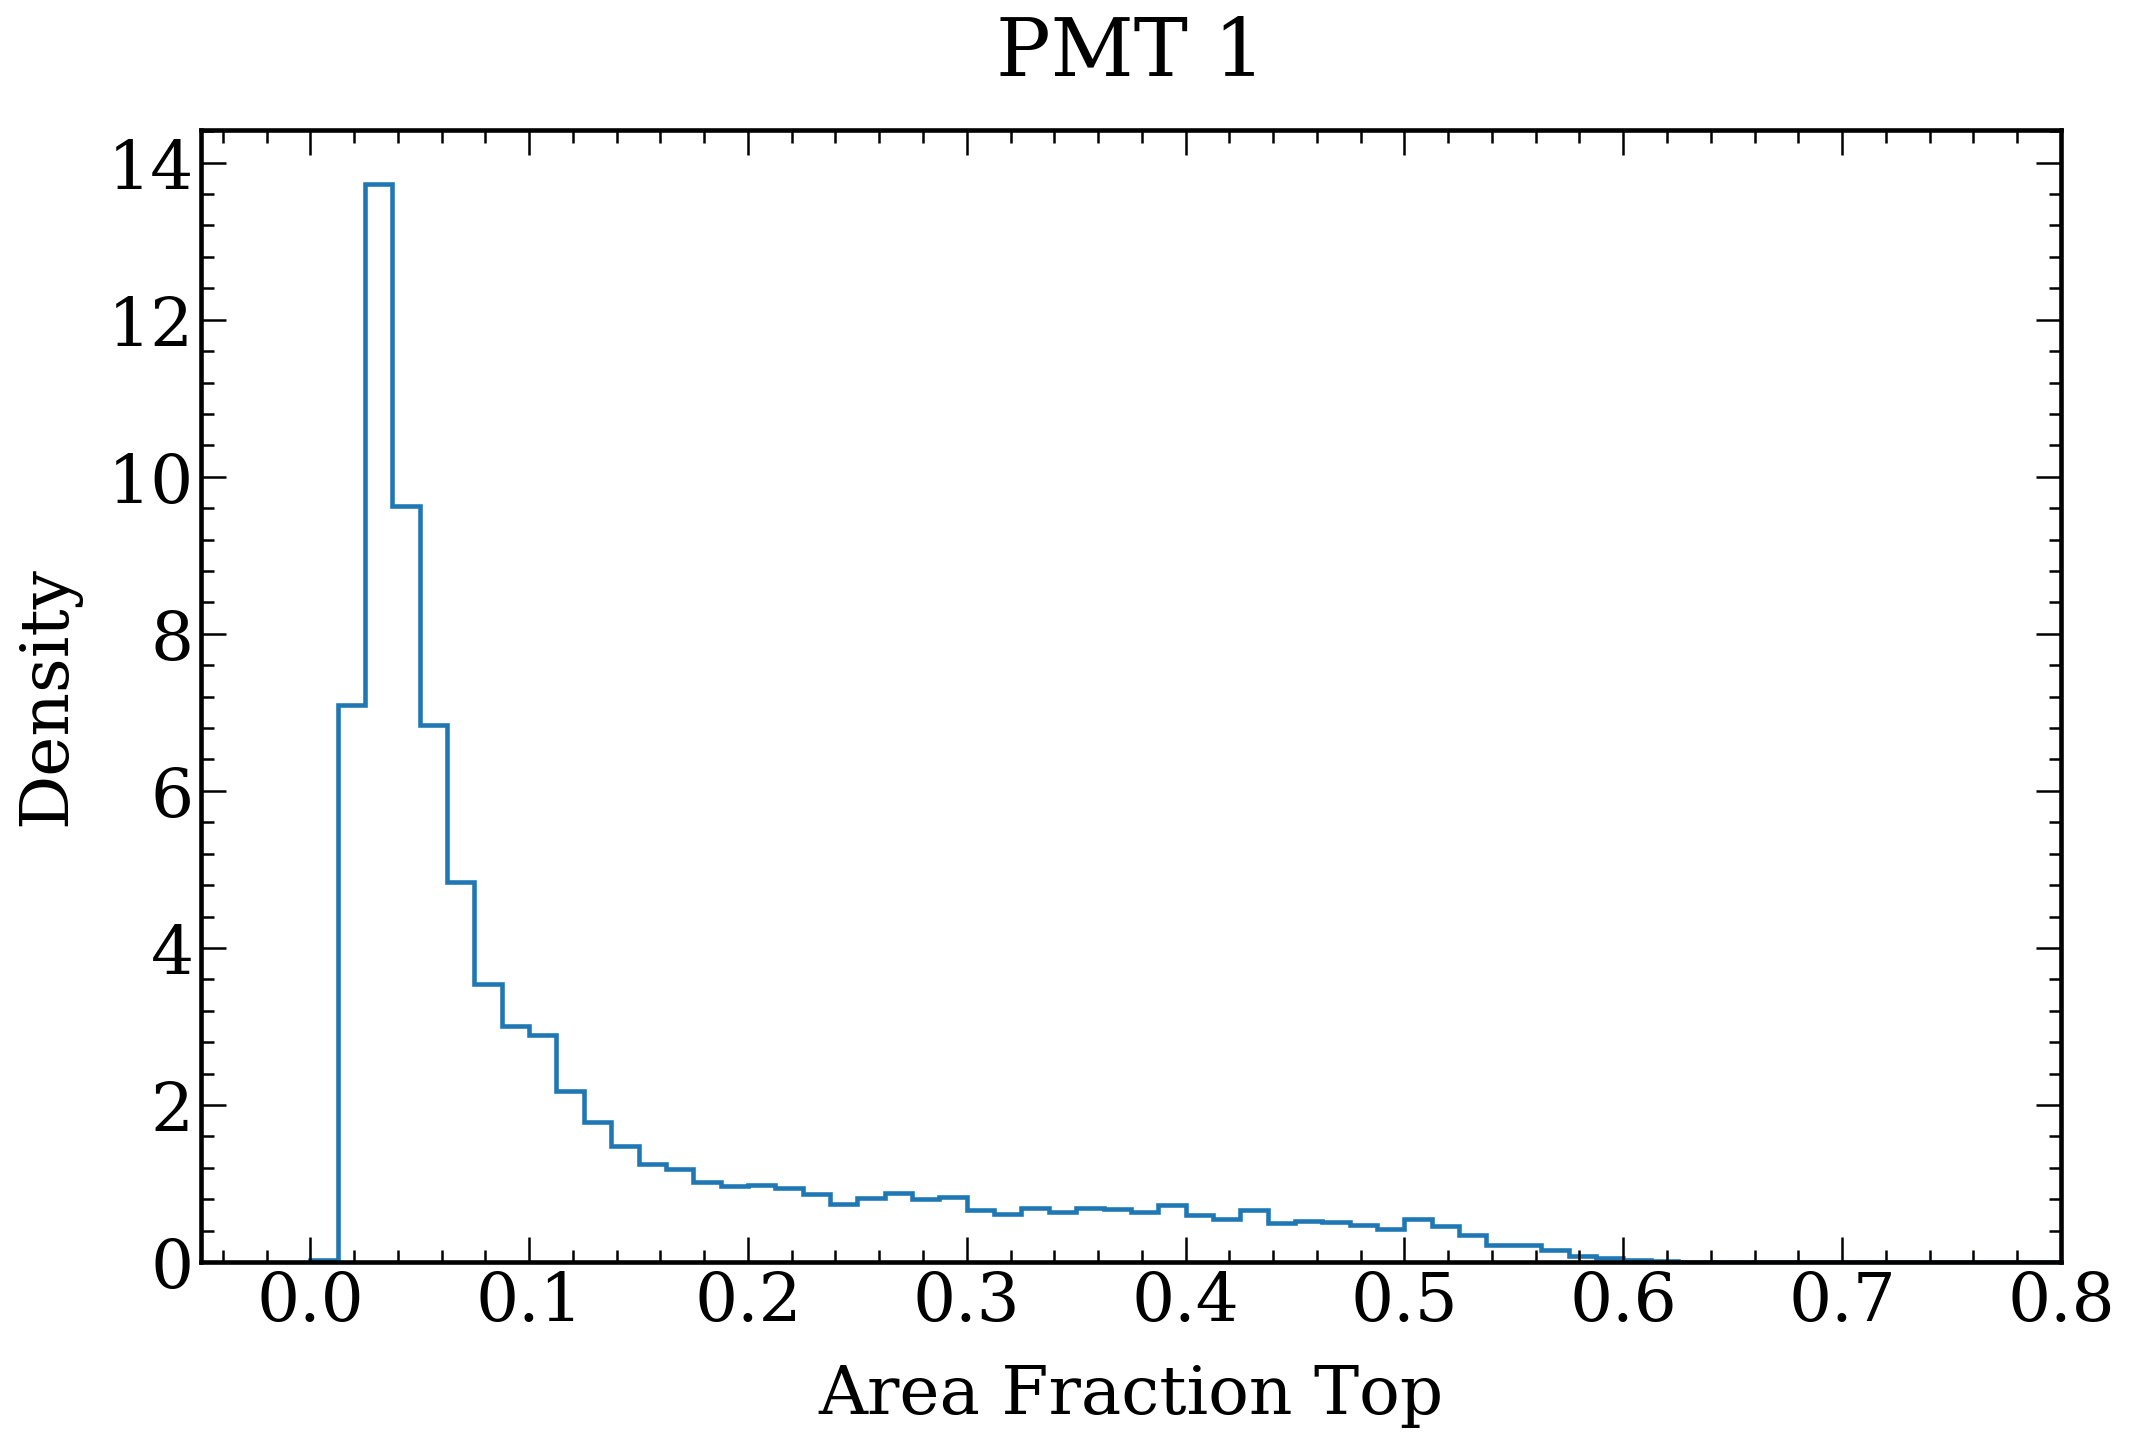

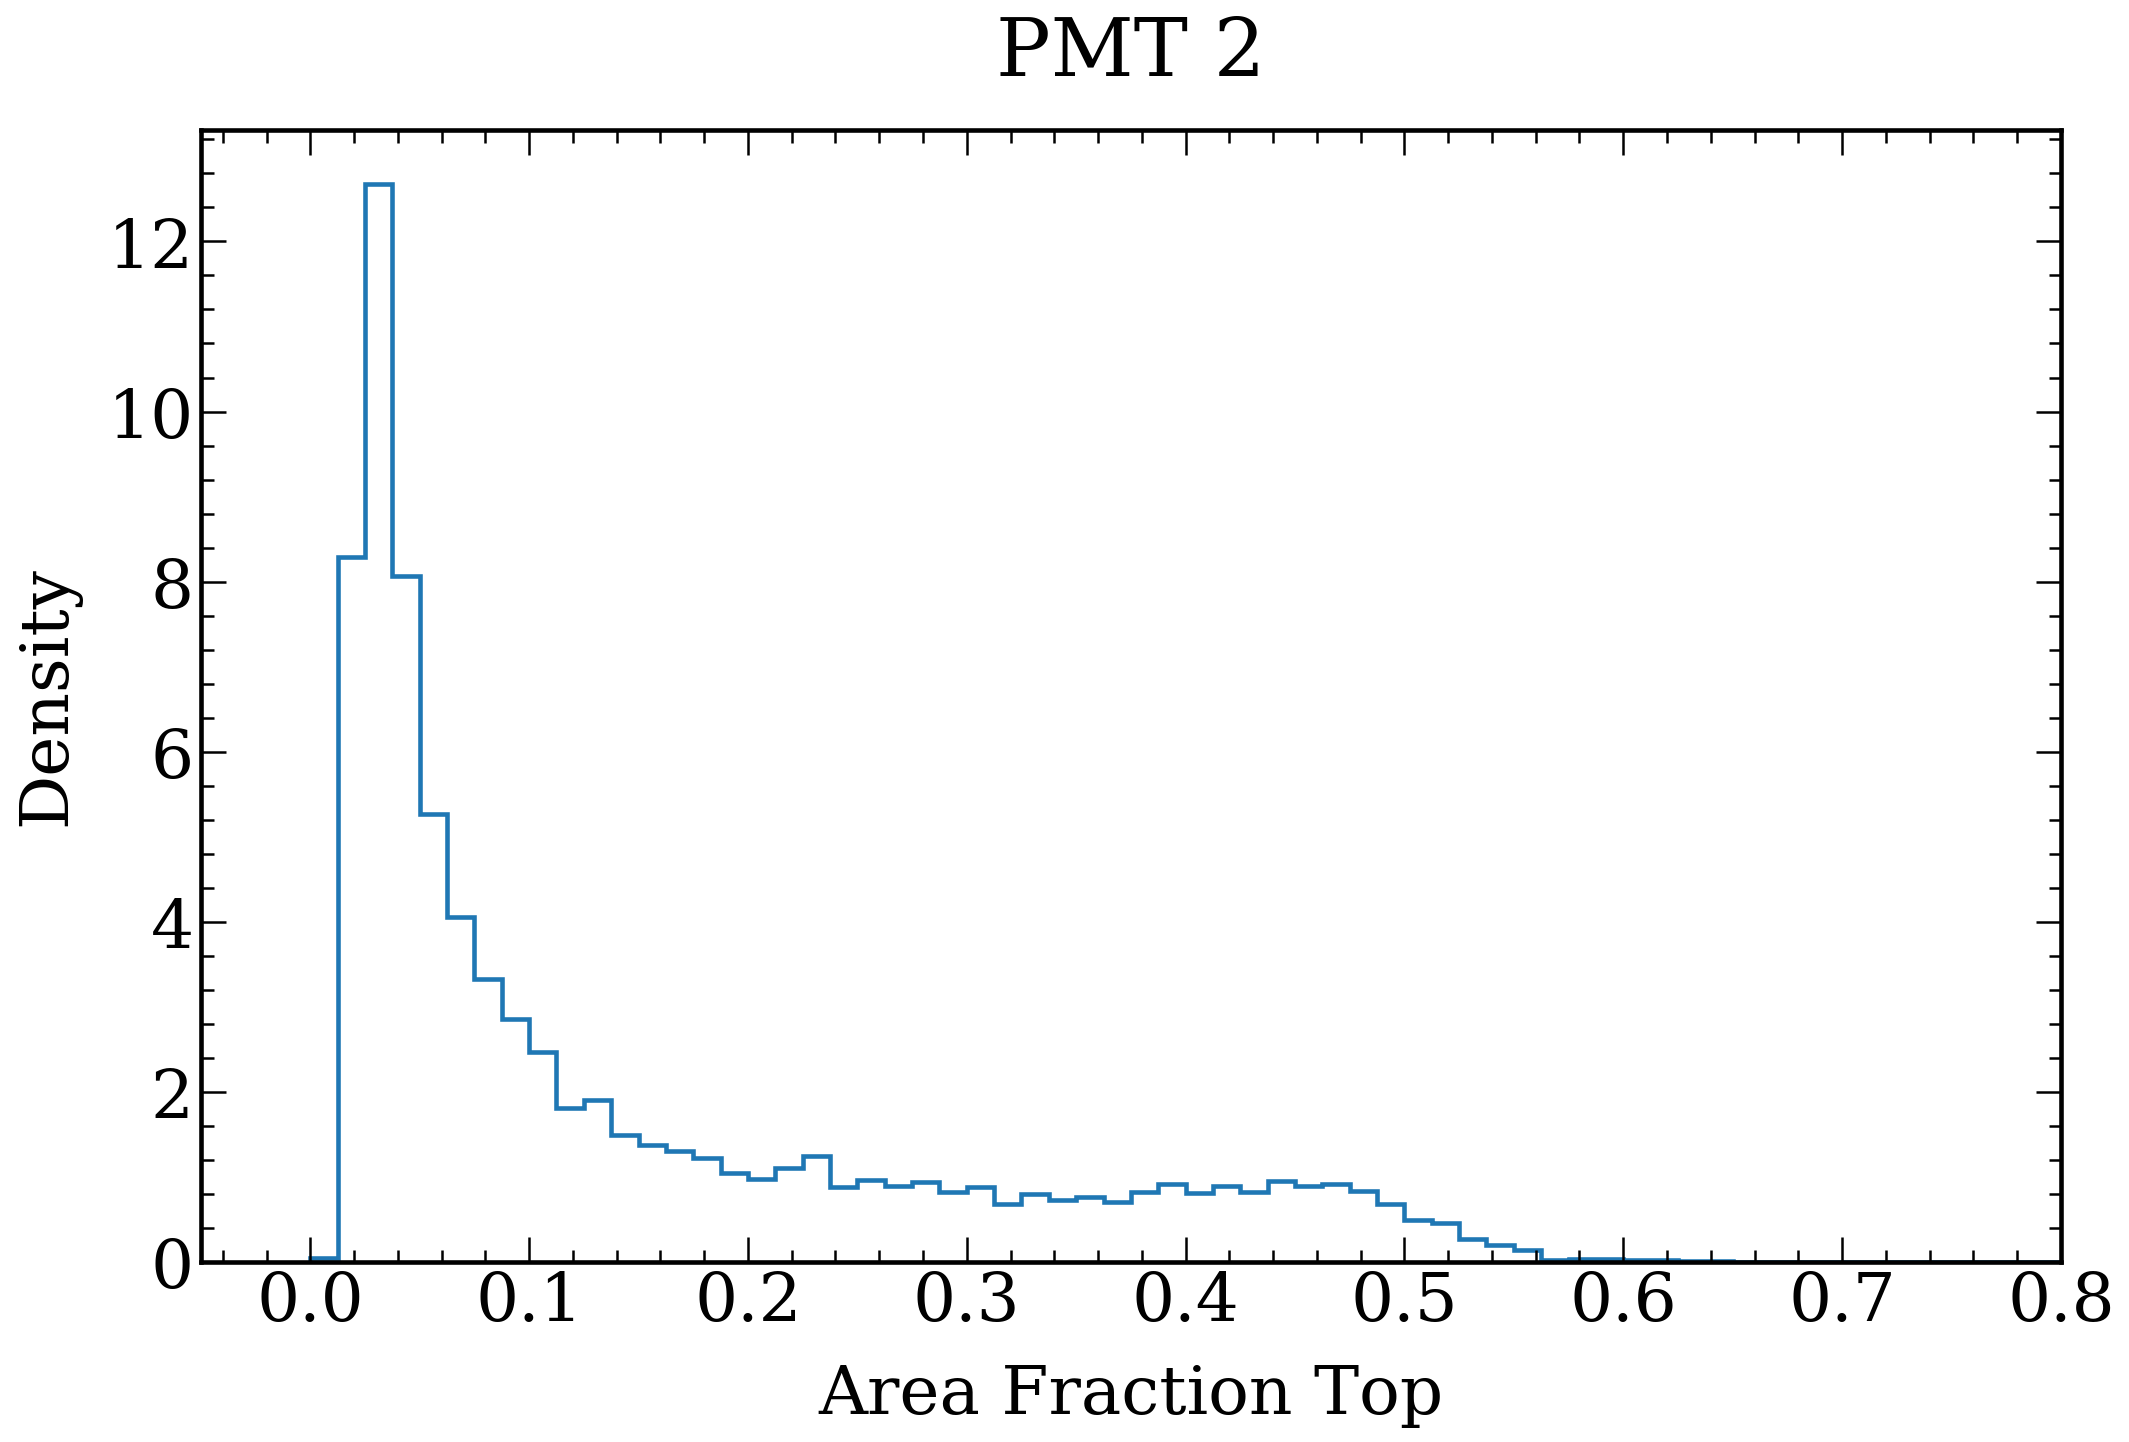

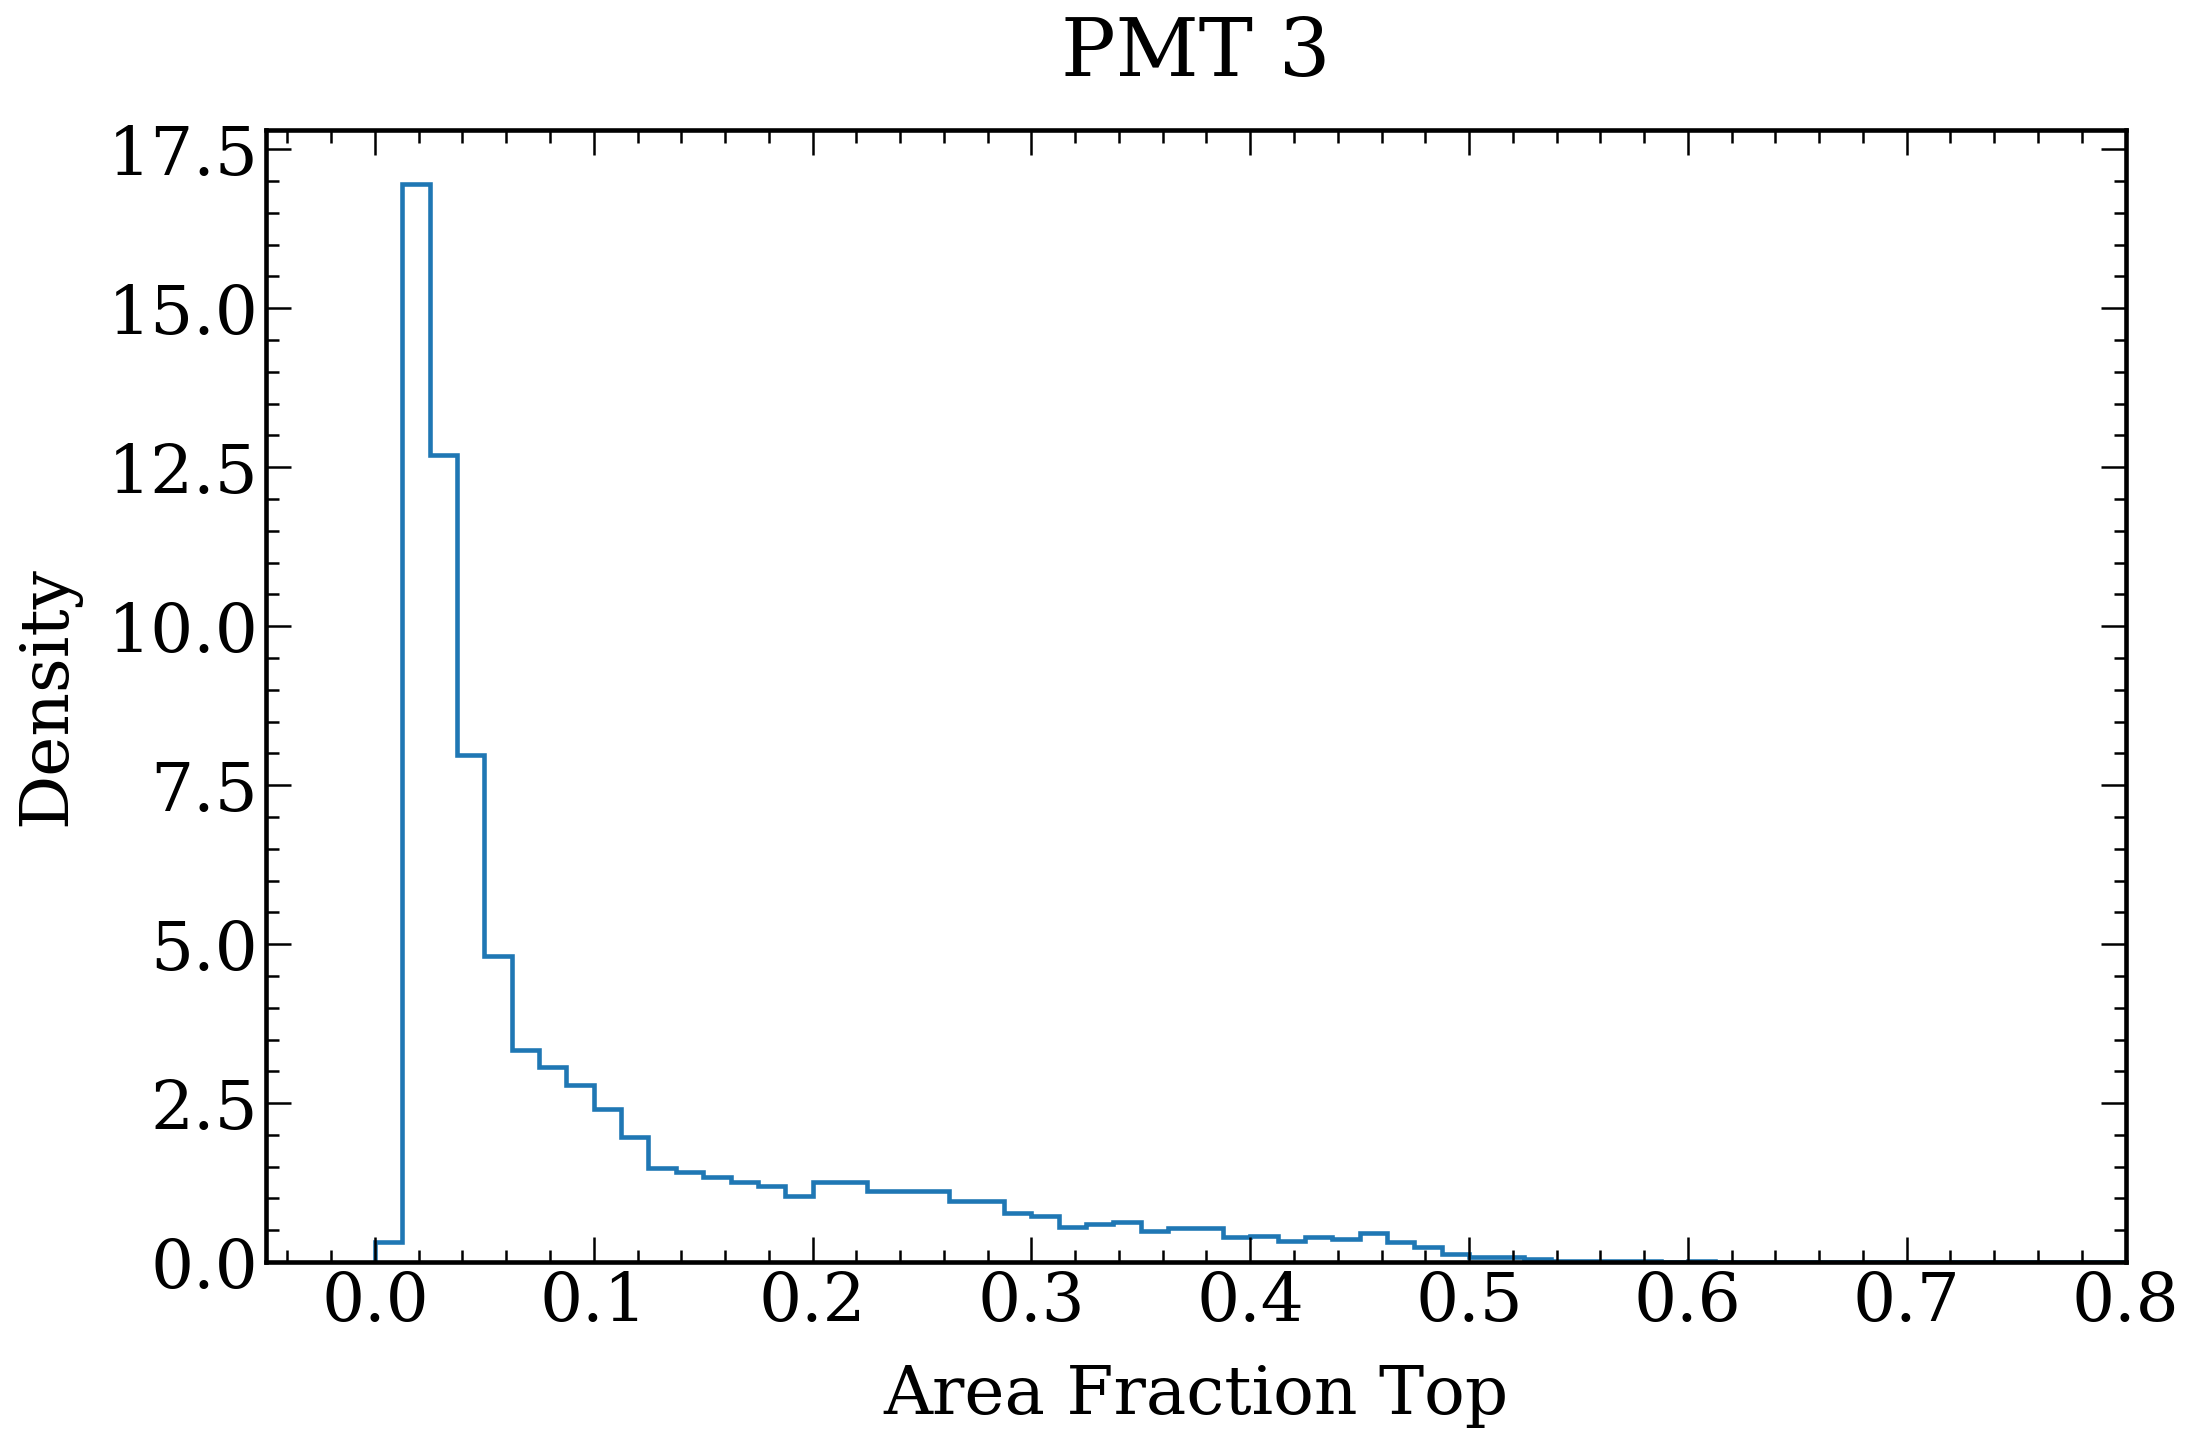

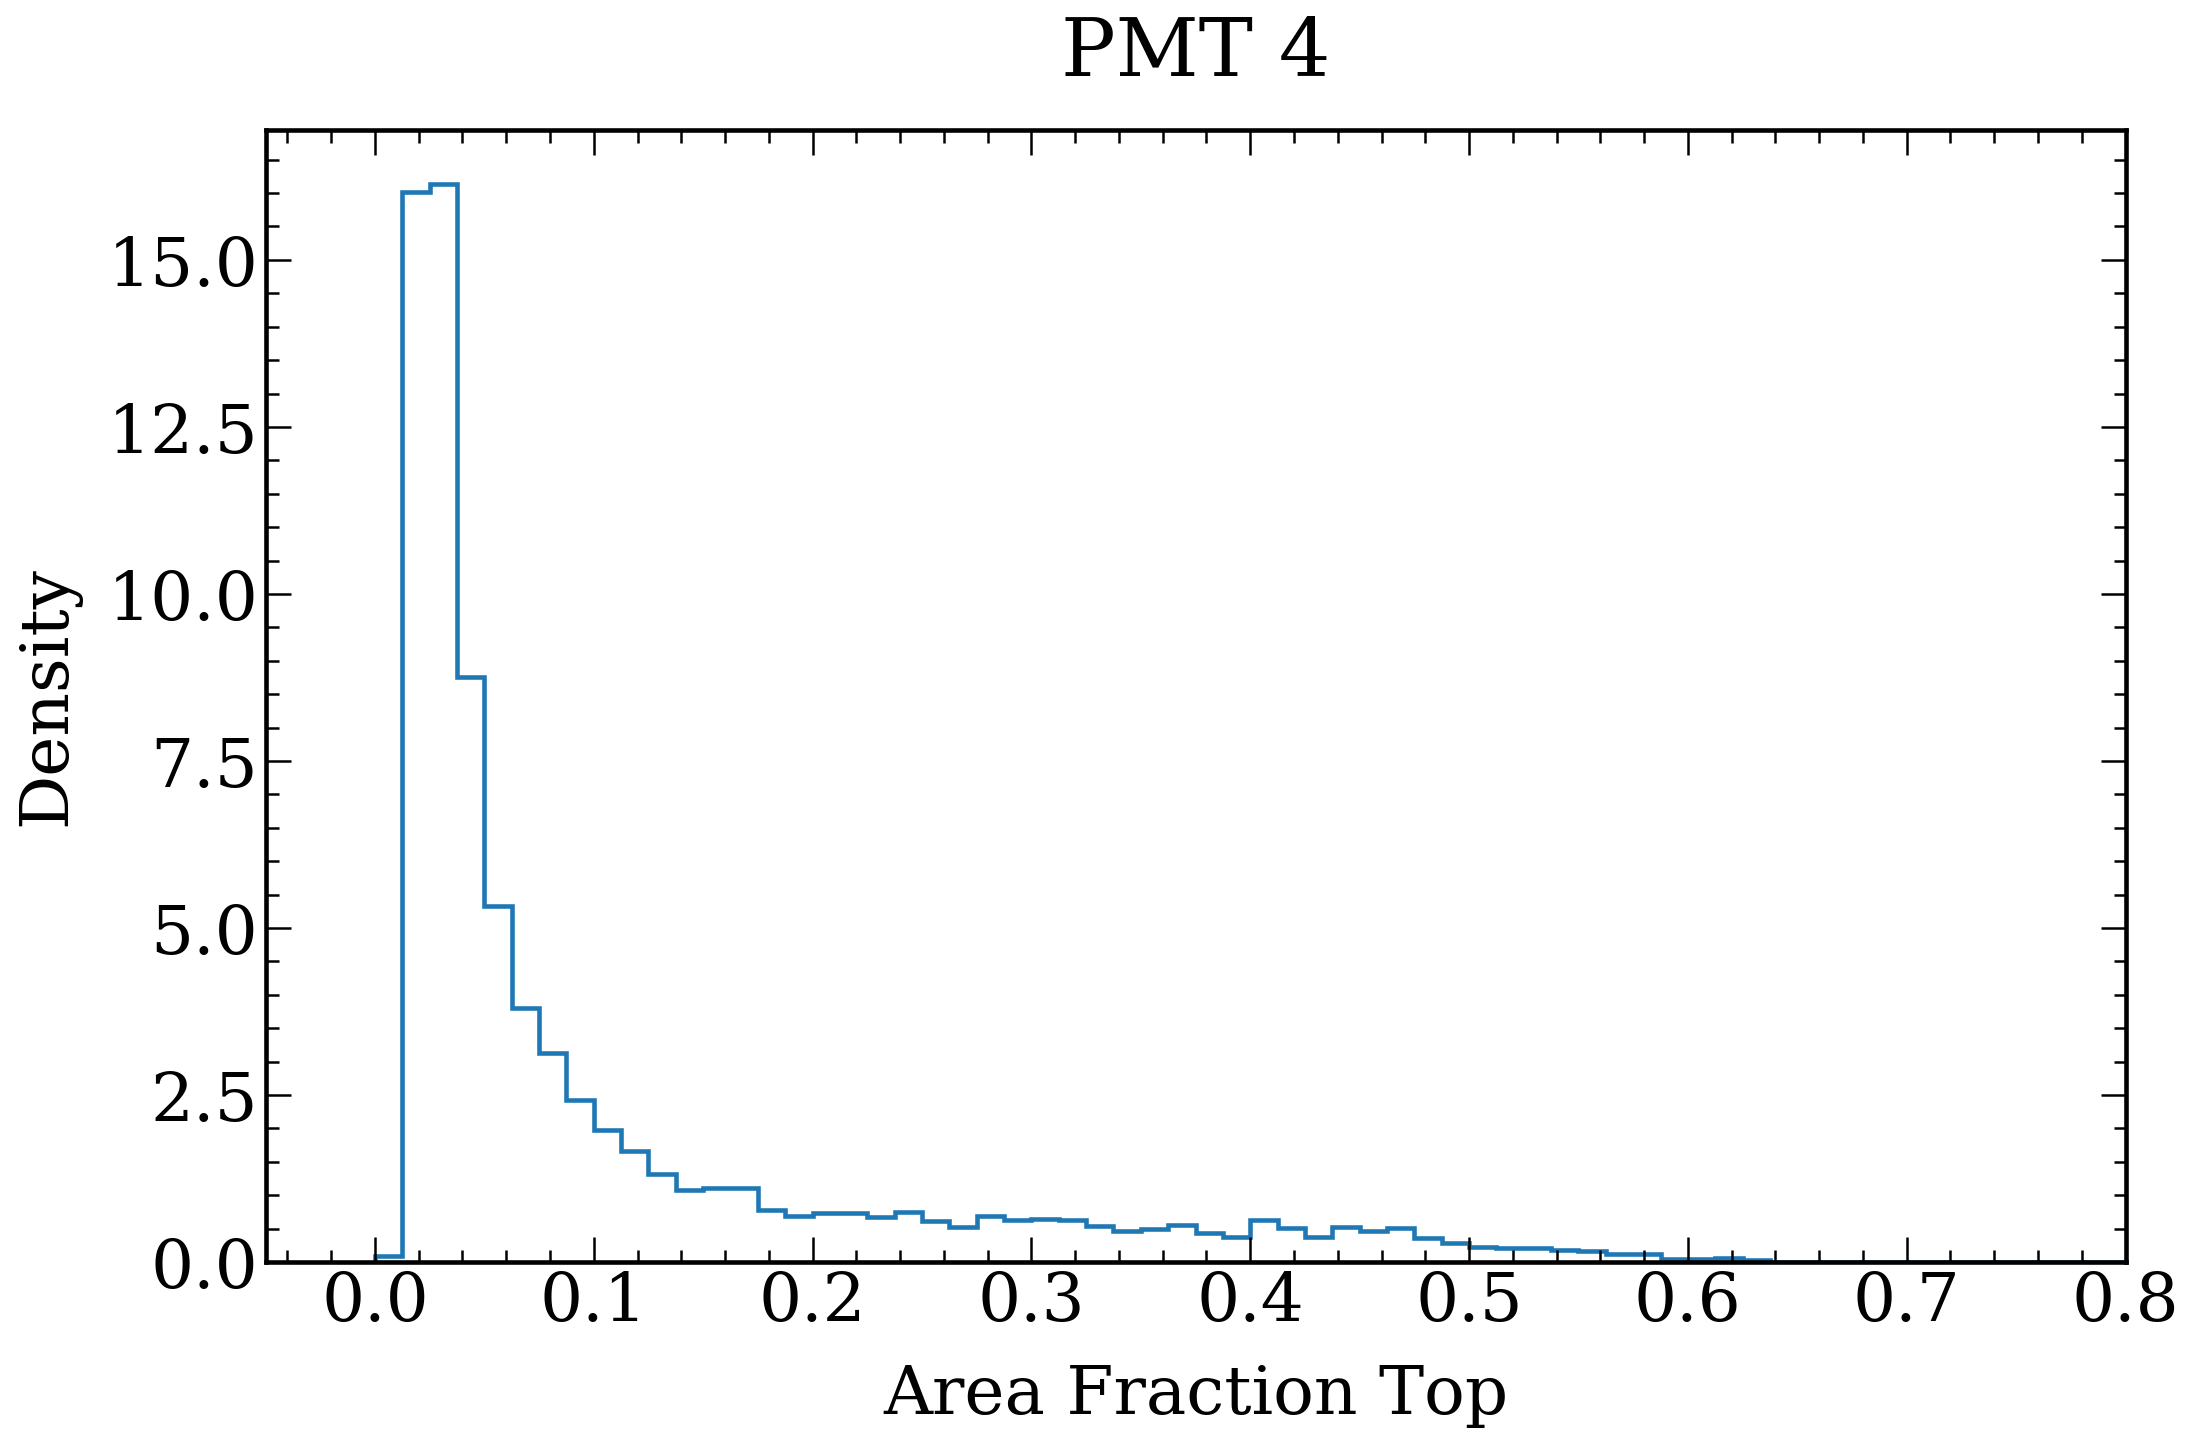

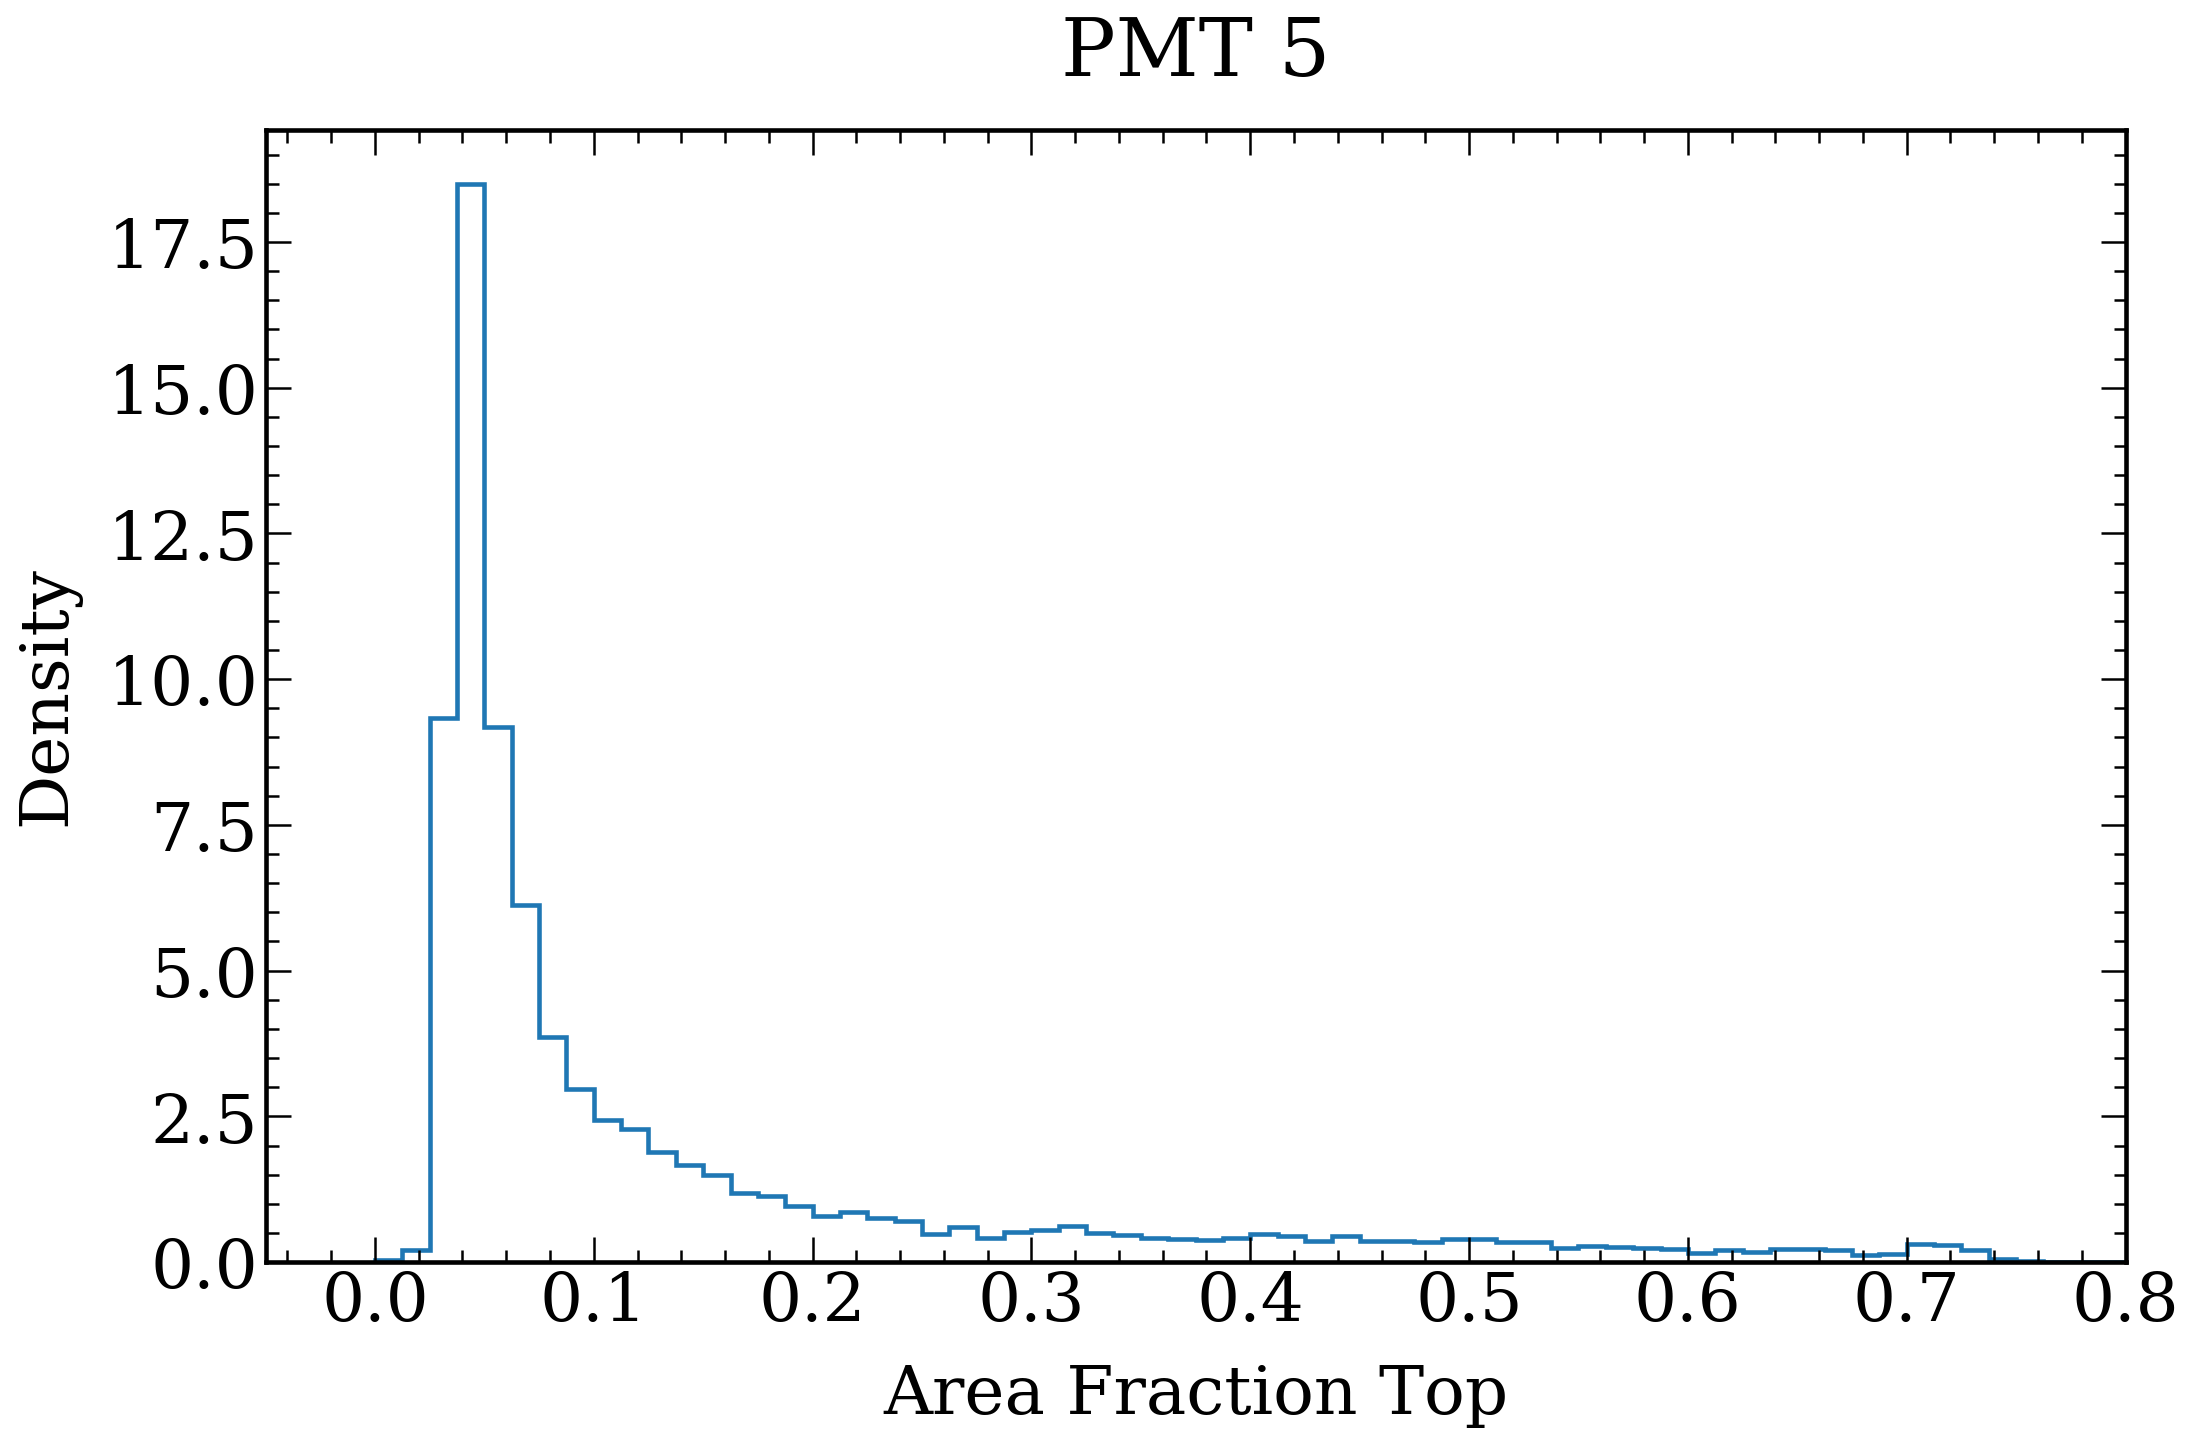

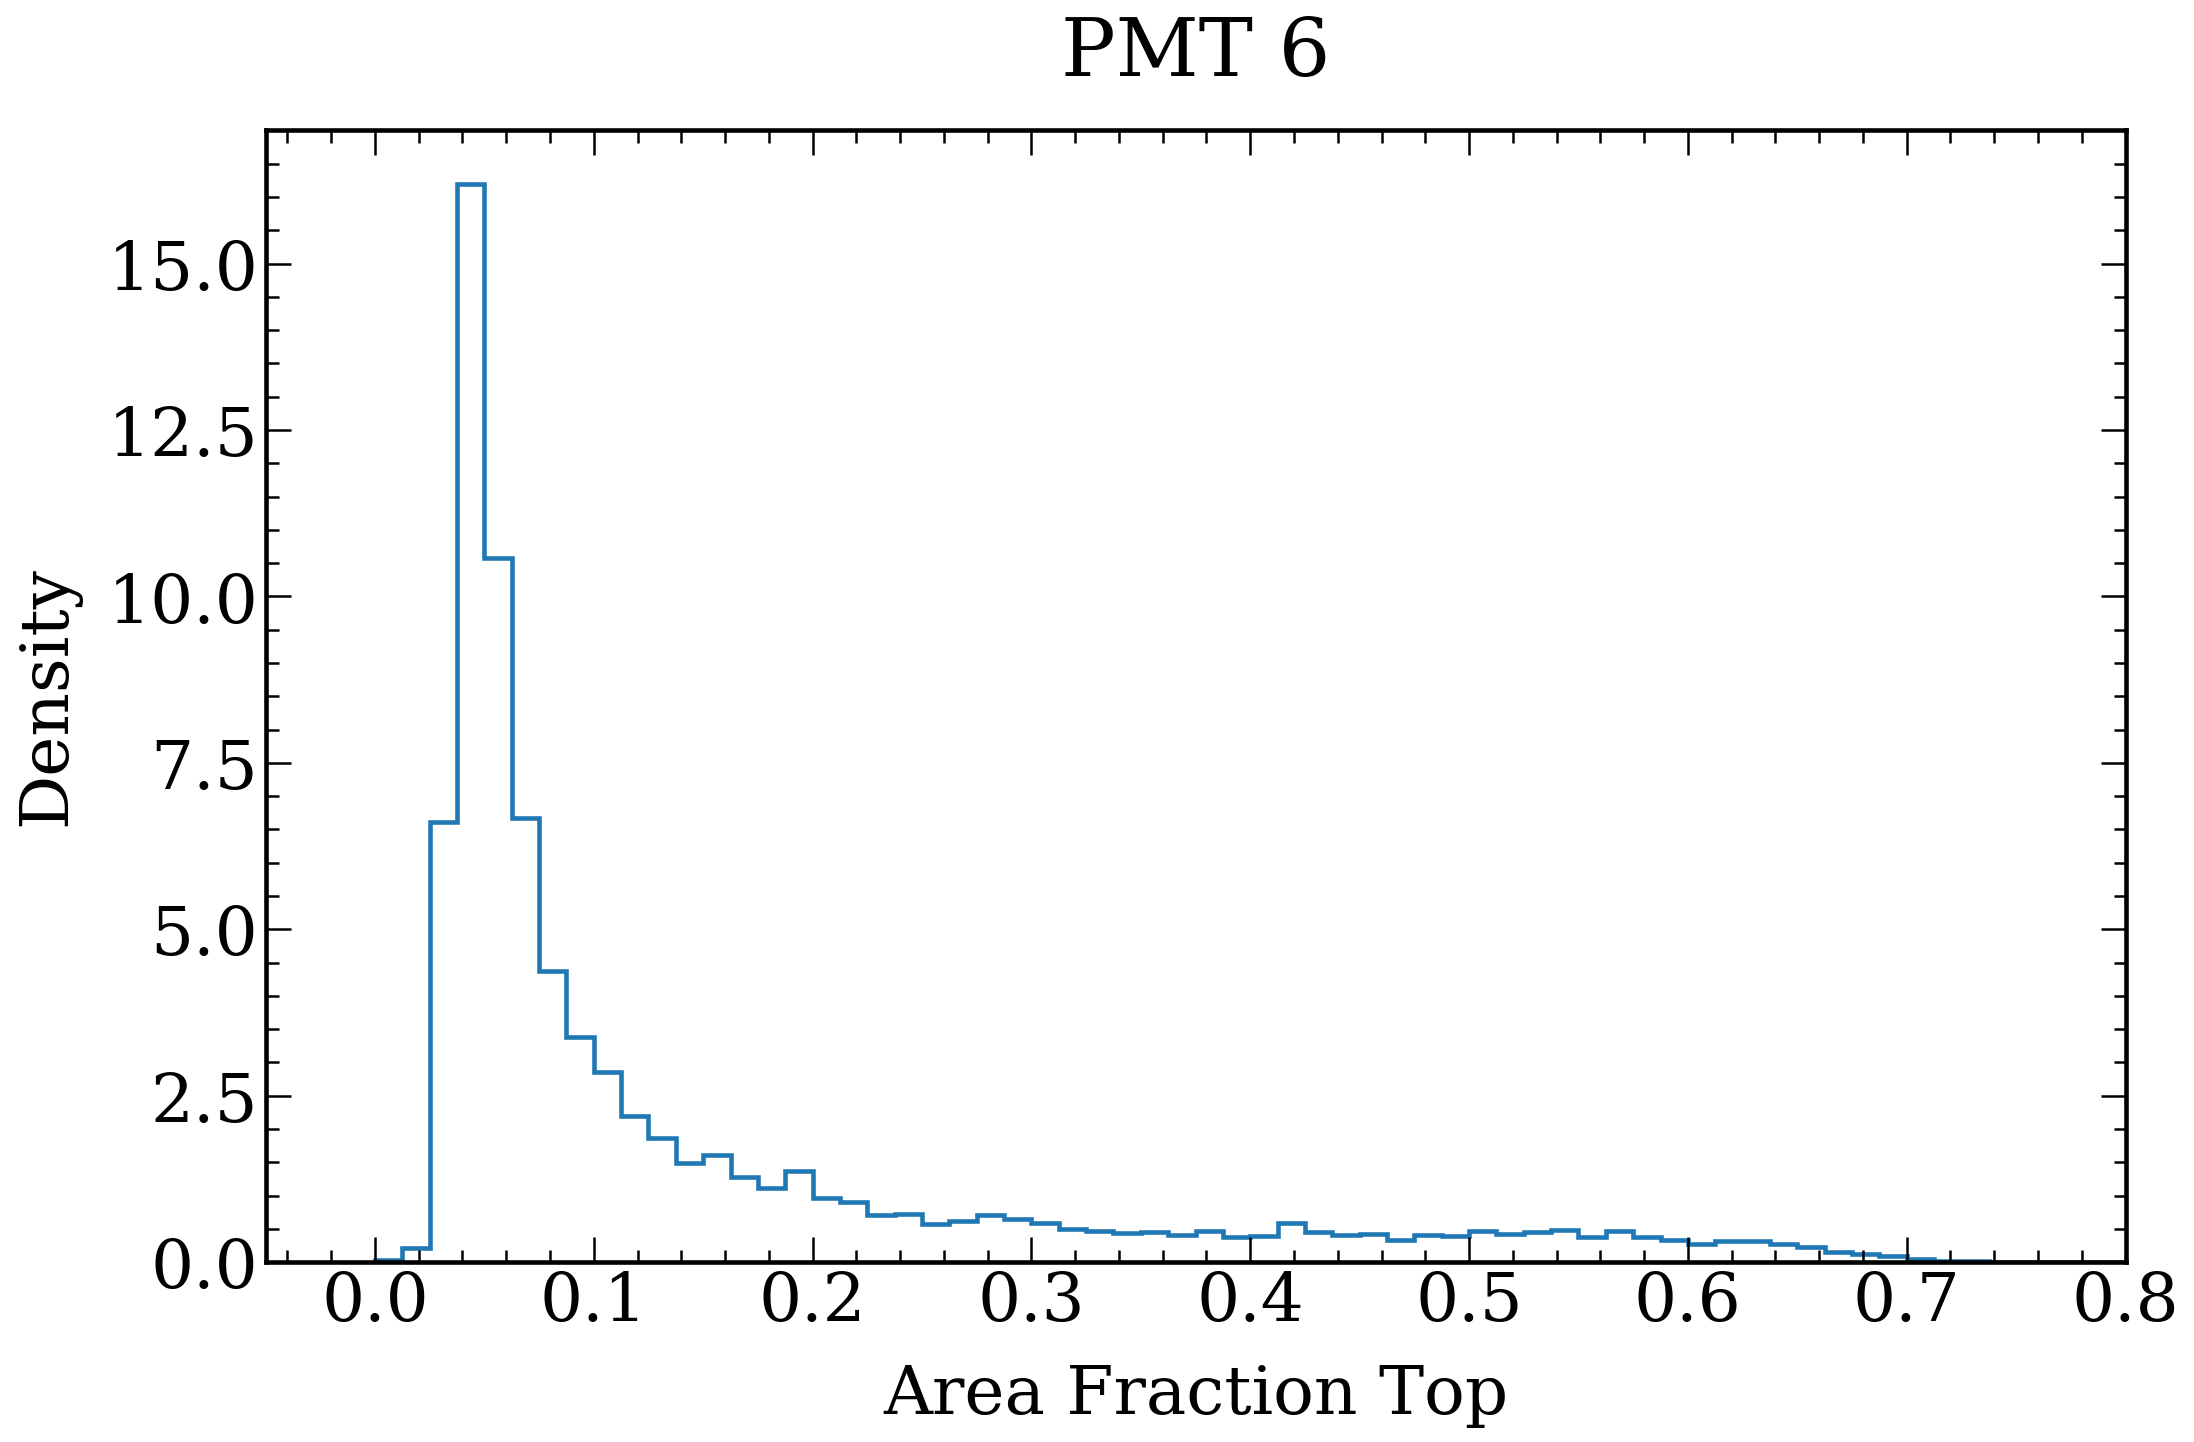

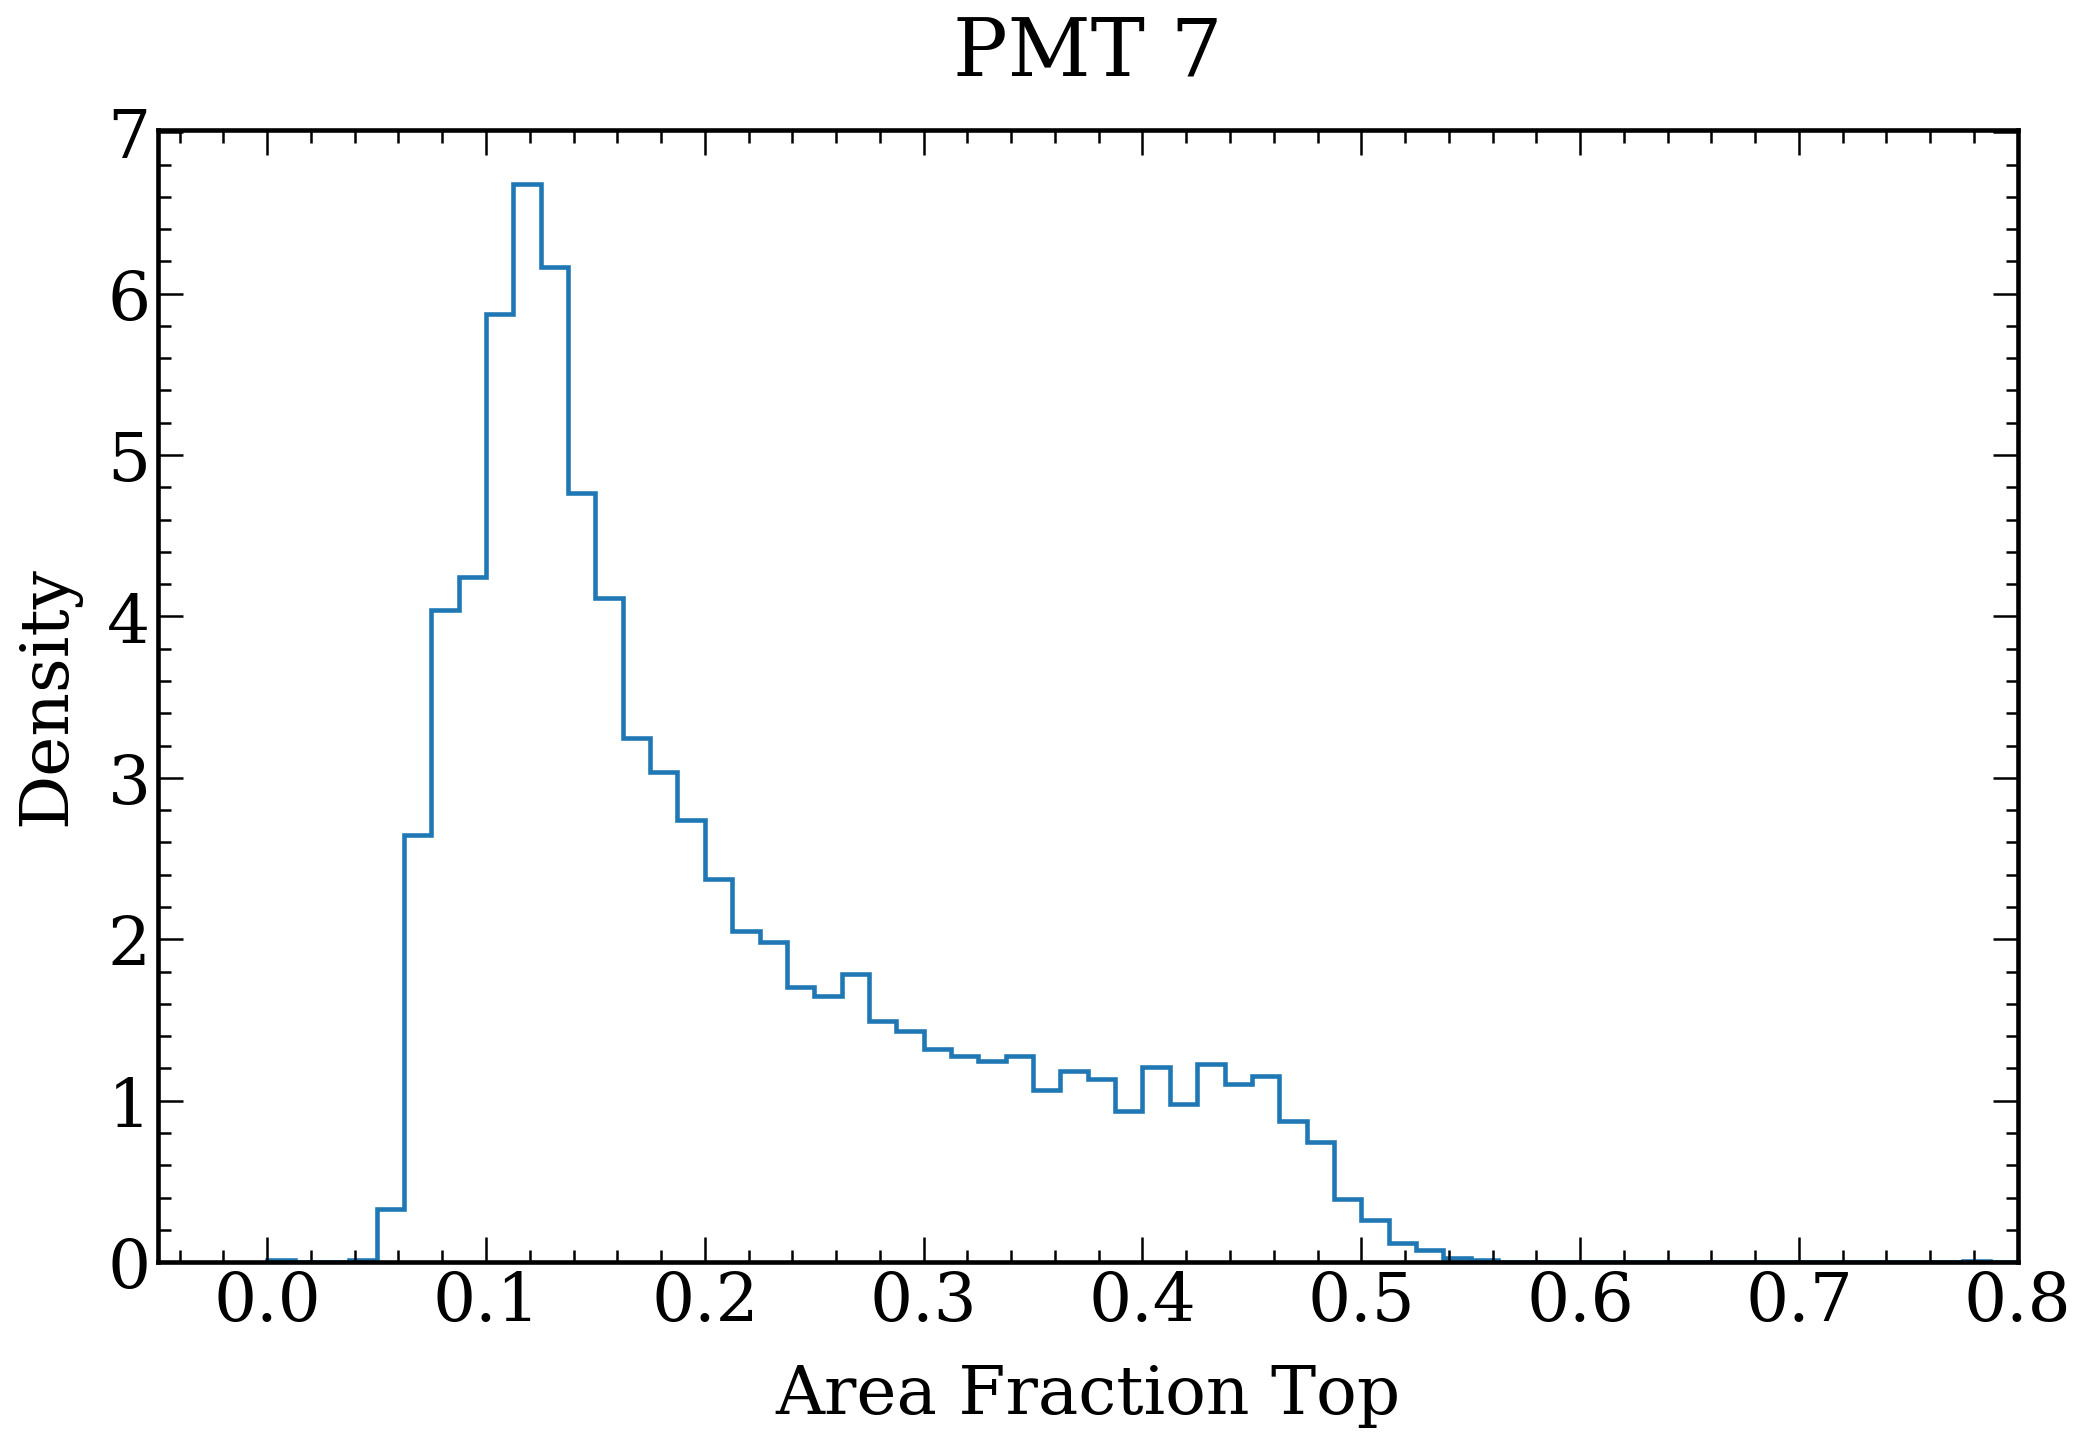

In [18]:
for i in range(1,8):
    
    #############################################
    ## Set plot styles:
    #############################################

    fig=plt.figure(figsize=(16, 10), dpi=150)

    # Text options
    #plt.rc('text', usetex=True)
    #plt.rc('font', family='serif')

    # Labels
    label_size = 32.5 #25
    label_pad = 13 #10
    title_size = 39 #30
    title_pad = 26 #20

    # Axes Parameters
    axes = plt.gca()
    axes.tick_params(axis='both') 

    # Axes ---> Linewidth
    for axis in ['top','bottom','left','right']:
        axes.spines[axis].set_linewidth(2.2)

    # Axes ---> Ticks
    axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
    plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
    axes.yaxis.set_minor_locator(AutoMinorLocator(5))
    plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
    plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

    # Grid
    #plt.grid(True)

    #############################################
    ## Plot specific settings and plot data
    #############################################

    # Data plot

    plt.hist(eval('PMT'+str(i)+'_HF'), bins = 80, histtype='step', linewidth = 2.2, 
             density = True, color = 'C0', range = (0,1))

    plt.xlabel('Area Fraction Top', fontsize = label_size, labelpad = label_pad)
    plt.ylabel('Density', fontsize = label_size, labelpad = label_pad)
    #plt.title('Tagged Kr-83m S2s', fontsize = title_size, pad = title_pad)
    plt.title('PMT '+str(i), fontsize = title_size, pad = title_pad)

    plt.xlim(-0.05,0.8)

    fig.savefig(filenameprefix+"_AFT_PMT'+str(i)+'_hist_scaled_fixedbinning.png")
    plt.show()

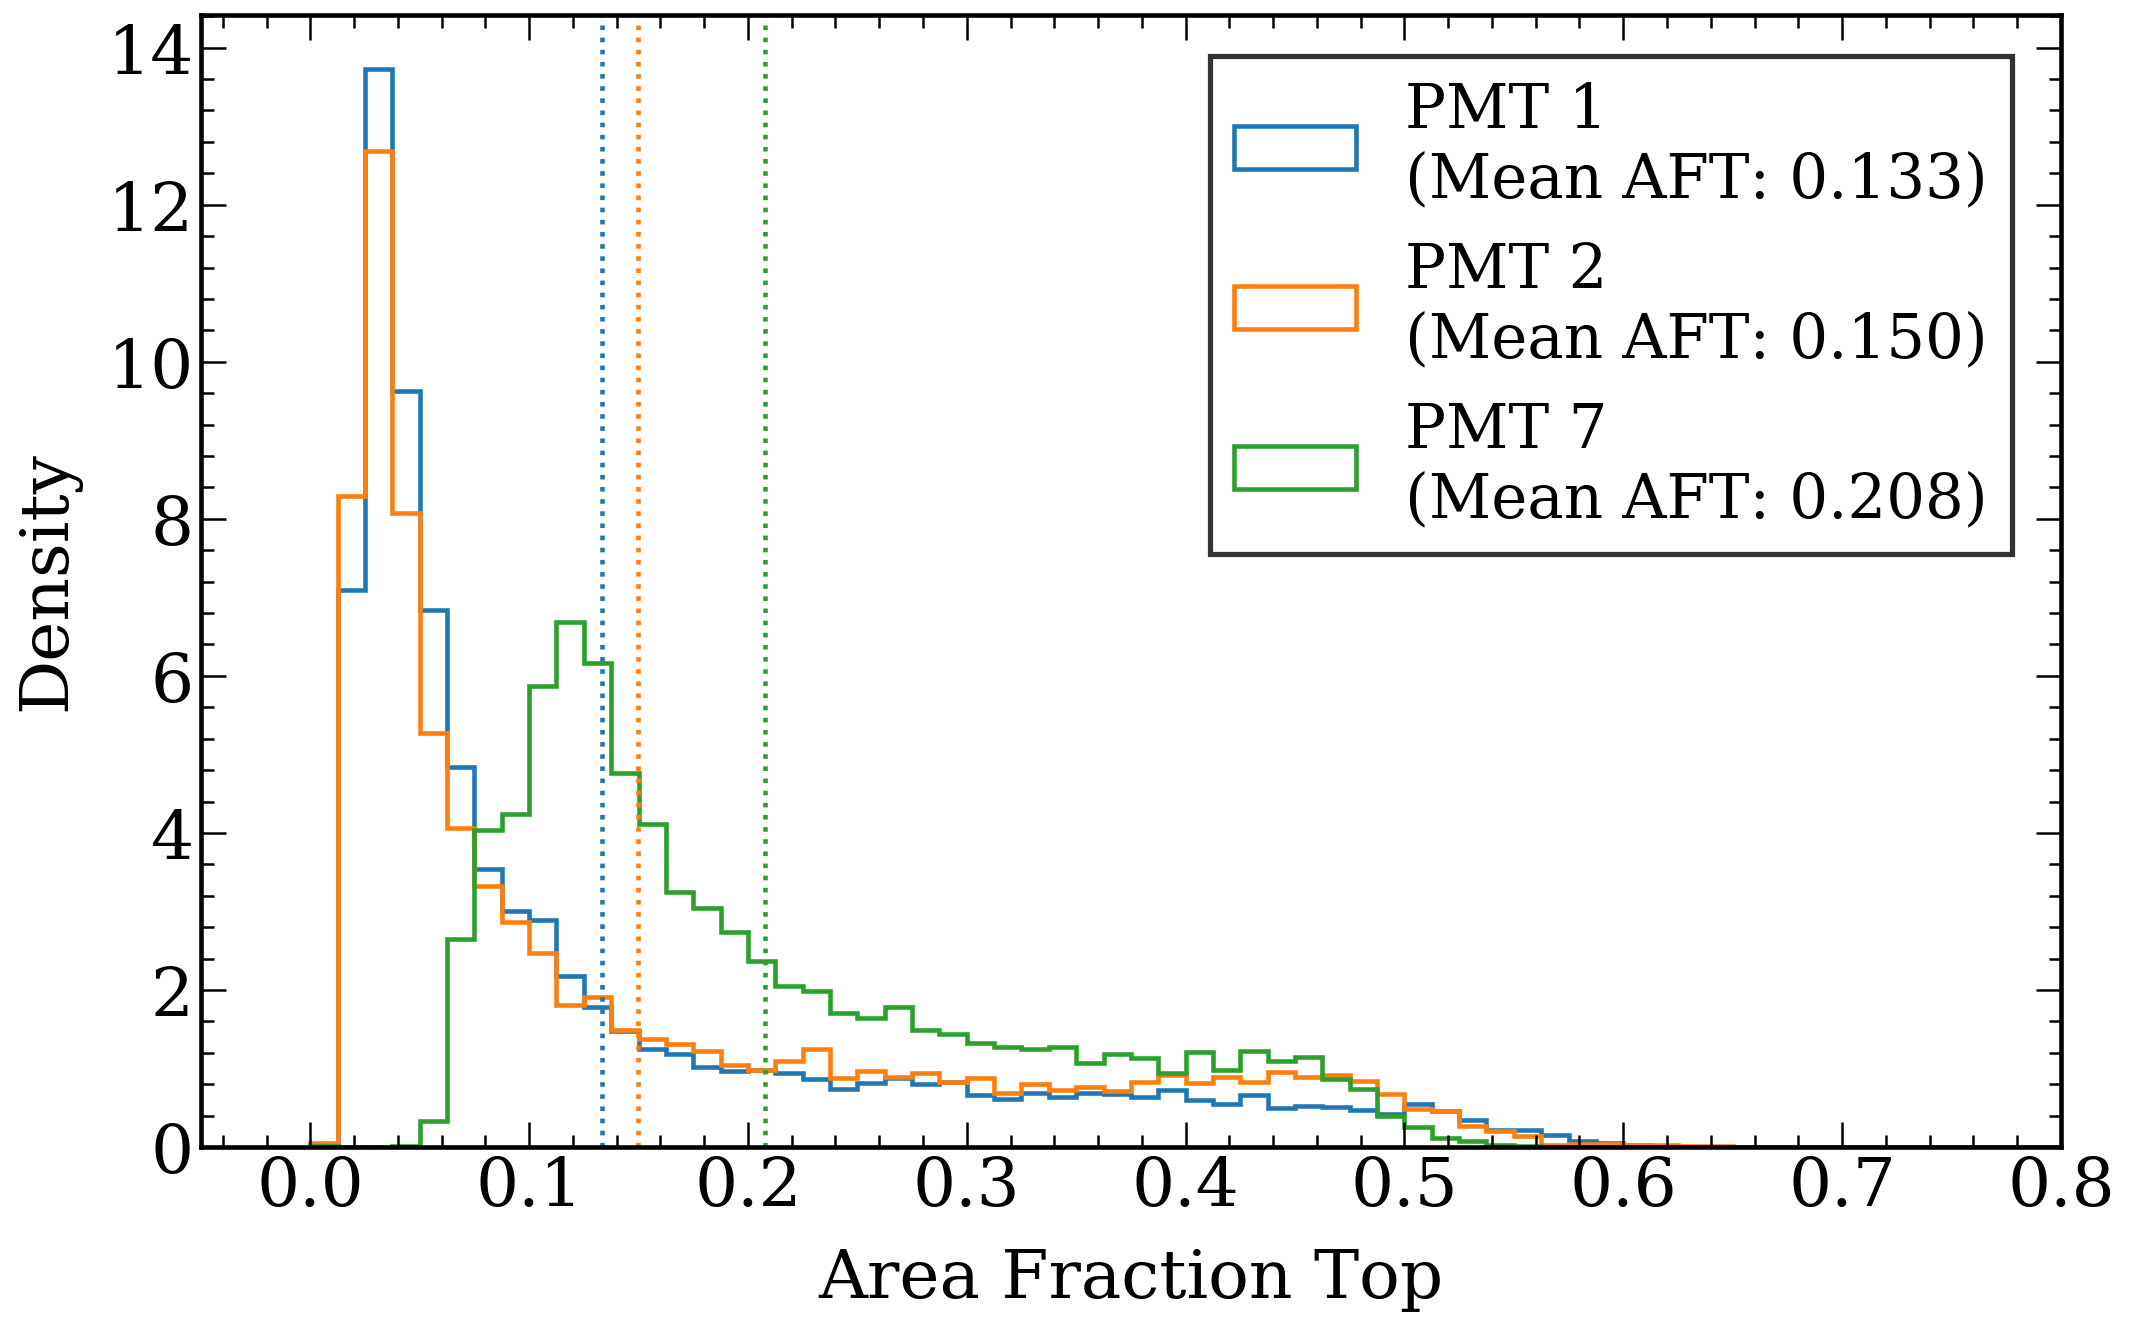

In [19]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.hist(PMT1_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C0', range = (0,1), 
         label = 'PMT 1'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT1_HF)).mean(), 3))+")")
plt.hist(PMT2_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C1', range = (0,1), 
         label = 'PMT 2'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT2_HF)).mean(), 3))+")")
plt.hist(PMT7_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C2', range = (0,1), 
         label = 'PMT 7'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT7_HF)).mean(), 3))+")")


plt.axvline(x=(np.array(PMT1_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C0')
plt.axvline(x=(np.array(PMT2_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C1')
plt.axvline(x=(np.array(PMT7_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C2')

plt.xlabel('Area Fraction Top', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Density', fontsize = label_size, labelpad = label_pad)
#plt.title('Tagged Kr-83m S2s', fontsize = title_size, pad = title_pad)

plt.xlim(-0.05,0.8)

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_AFT_PMT127_hist_scaled_fixedbinning.png")
plt.show()

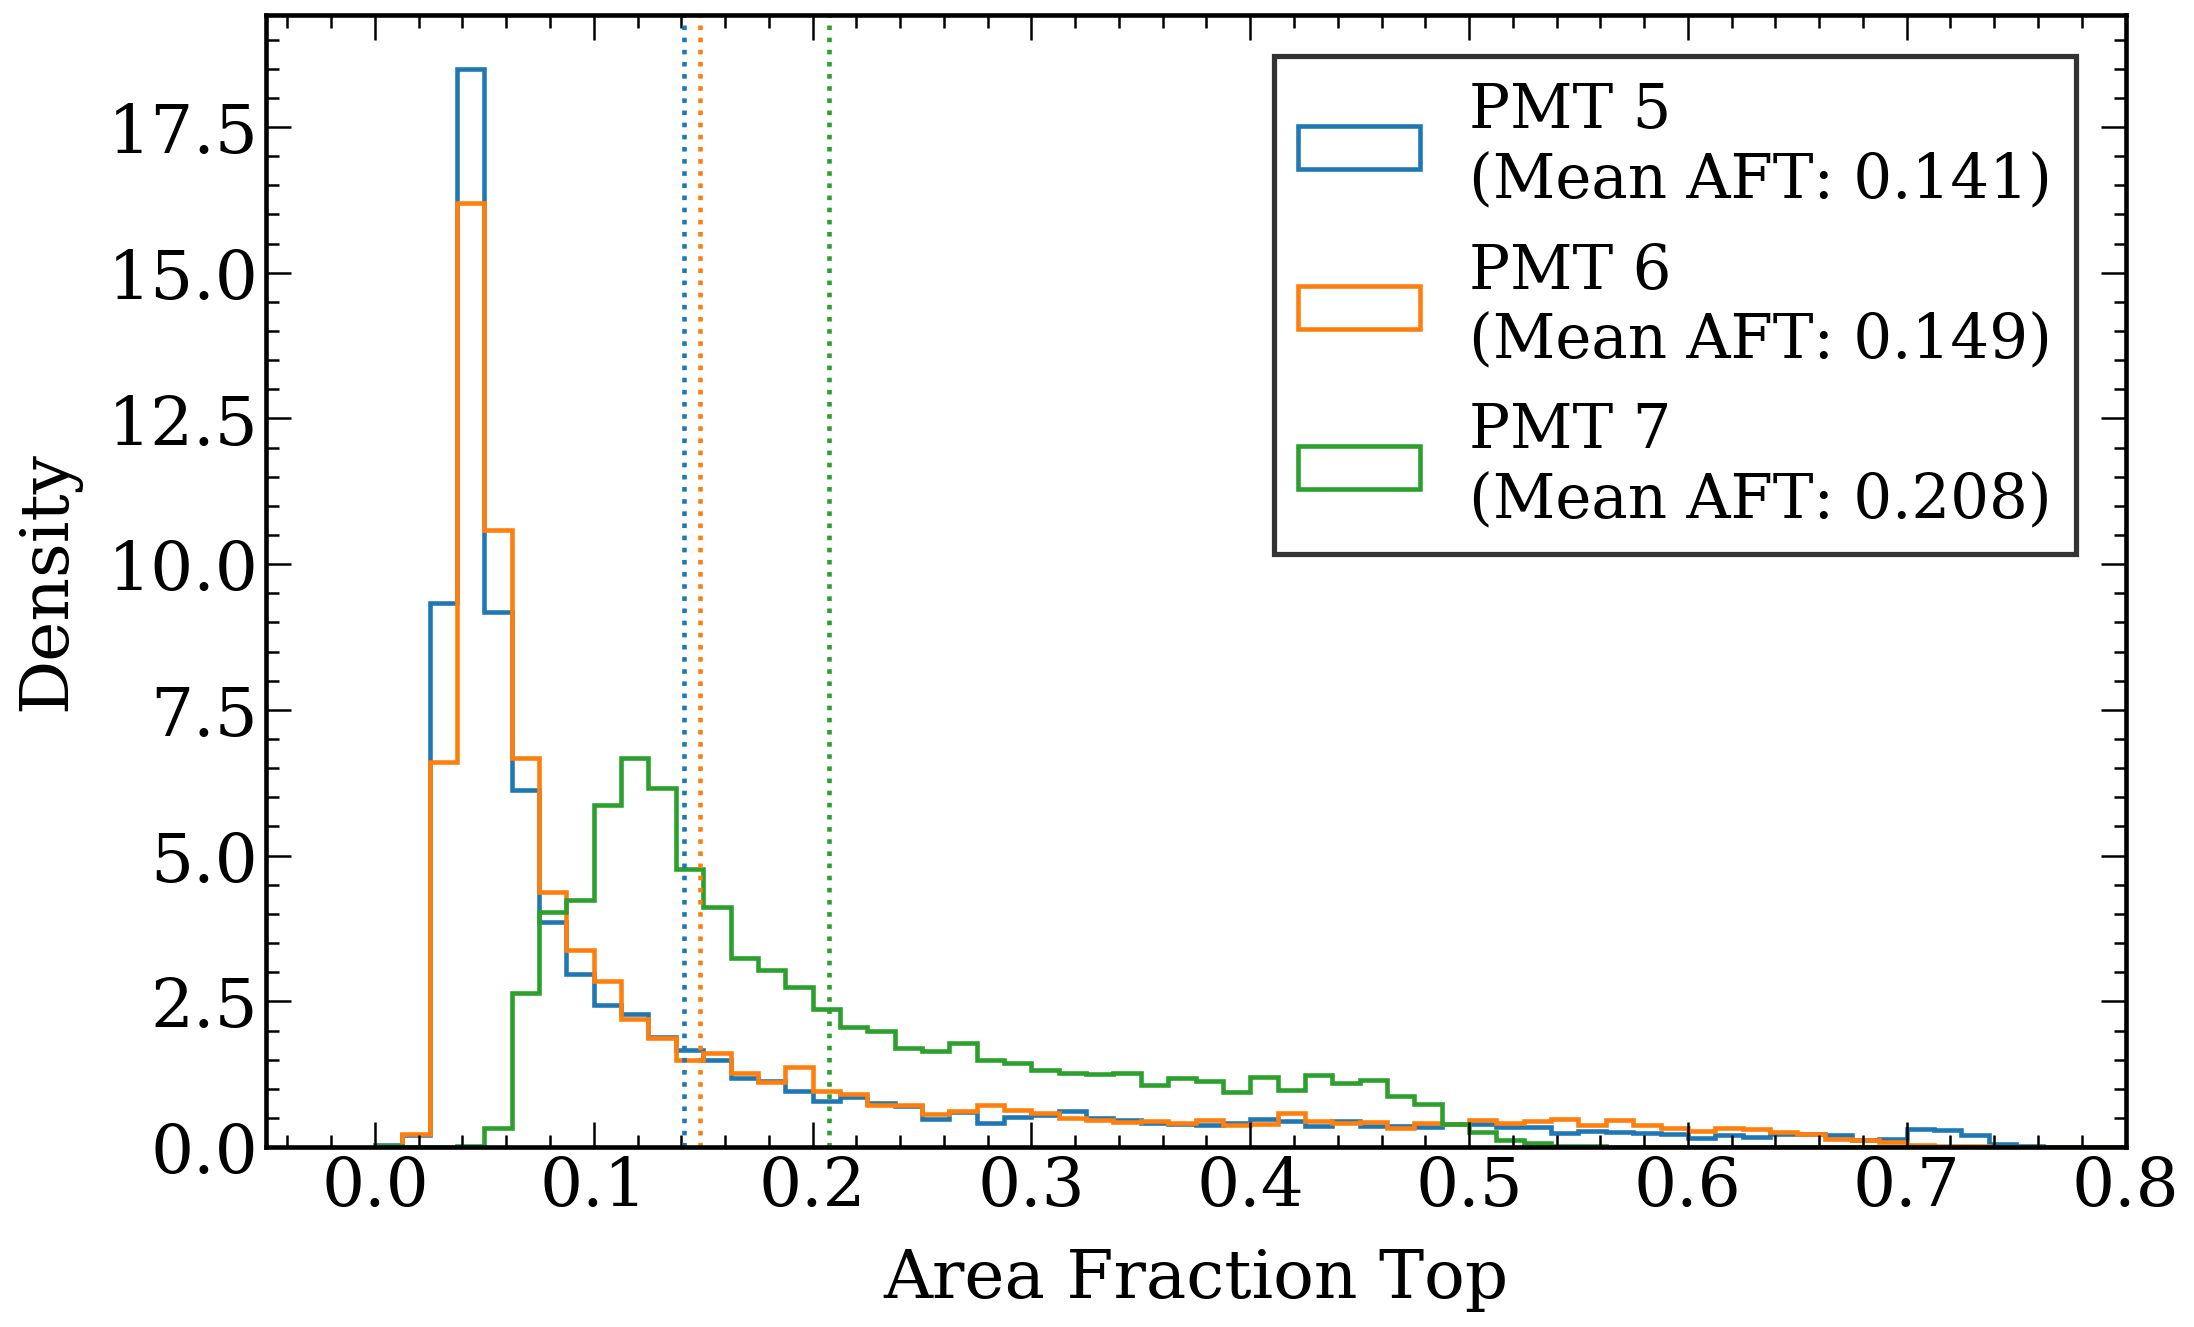

In [20]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.hist(PMT5_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C0', range = (0,1), 
         label = 'PMT 5'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT5_HF)).mean(), 3))+")")
plt.hist(PMT6_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C1', range = (0,1), 
         label = 'PMT 6'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT6_HF)).mean(), 3))+")")
plt.hist(PMT7_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C2', range = (0,1), 
         label = 'PMT 7'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT7_HF)).mean(), 3))+")")


plt.axvline(x=(np.array(PMT5_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C0')
plt.axvline(x=(np.array(PMT6_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C1')
plt.axvline(x=(np.array(PMT7_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C2')

plt.xlabel('Area Fraction Top', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Density', fontsize = label_size, labelpad = label_pad)
#plt.title('Tagged Kr-83m S2s', fontsize = title_size, pad = title_pad)

plt.xlim(-0.05,0.8)

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_AFT_PMT567_hist_scaled_fixedbinning.png")
plt.show()

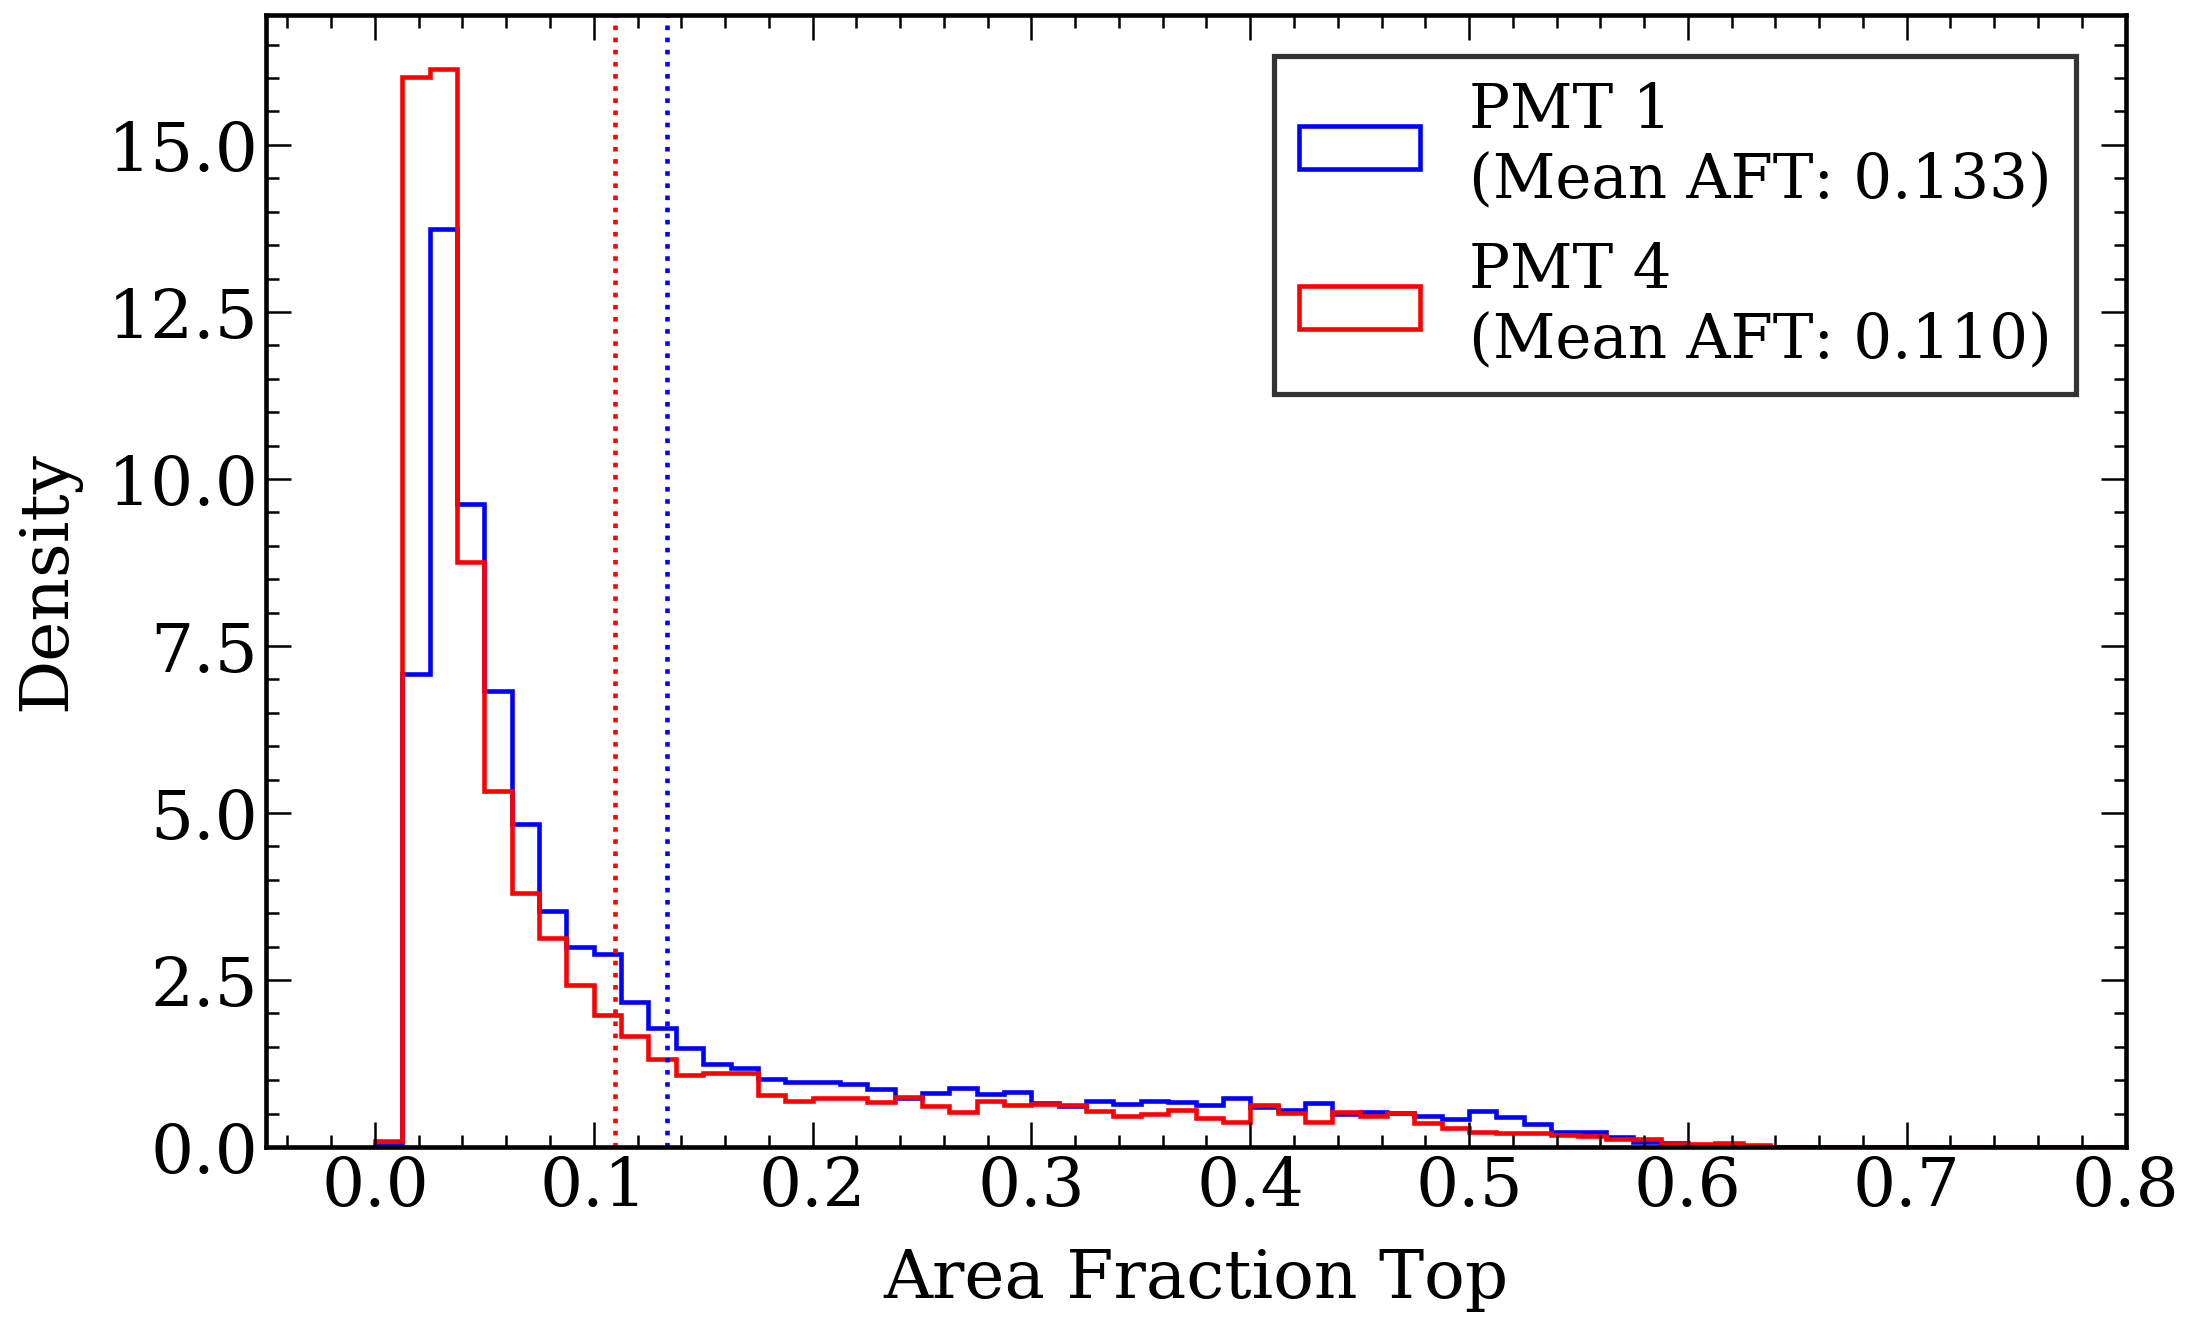

In [21]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.hist(PMT1_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'blue', range = (0,1), 
         label = 'PMT 1'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT1_HF)).mean(), 3))+")")
plt.hist(PMT4_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'red', range = (0,1), 
         label = 'PMT 4'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT4_HF)).mean(), 3))+")")

plt.axvline(x=(np.array(PMT1_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'blue')
plt.axvline(x=(np.array(PMT4_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'red')

plt.xlabel('Area Fraction Top', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Density', fontsize = label_size, labelpad = label_pad)
#plt.title('Tagged Kr-83m S2s', fontsize = title_size, pad = title_pad)

plt.xlim(-0.05,0.8)

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_AFT_PMT14_hist_scaled_fixedbinning.png")
plt.show()

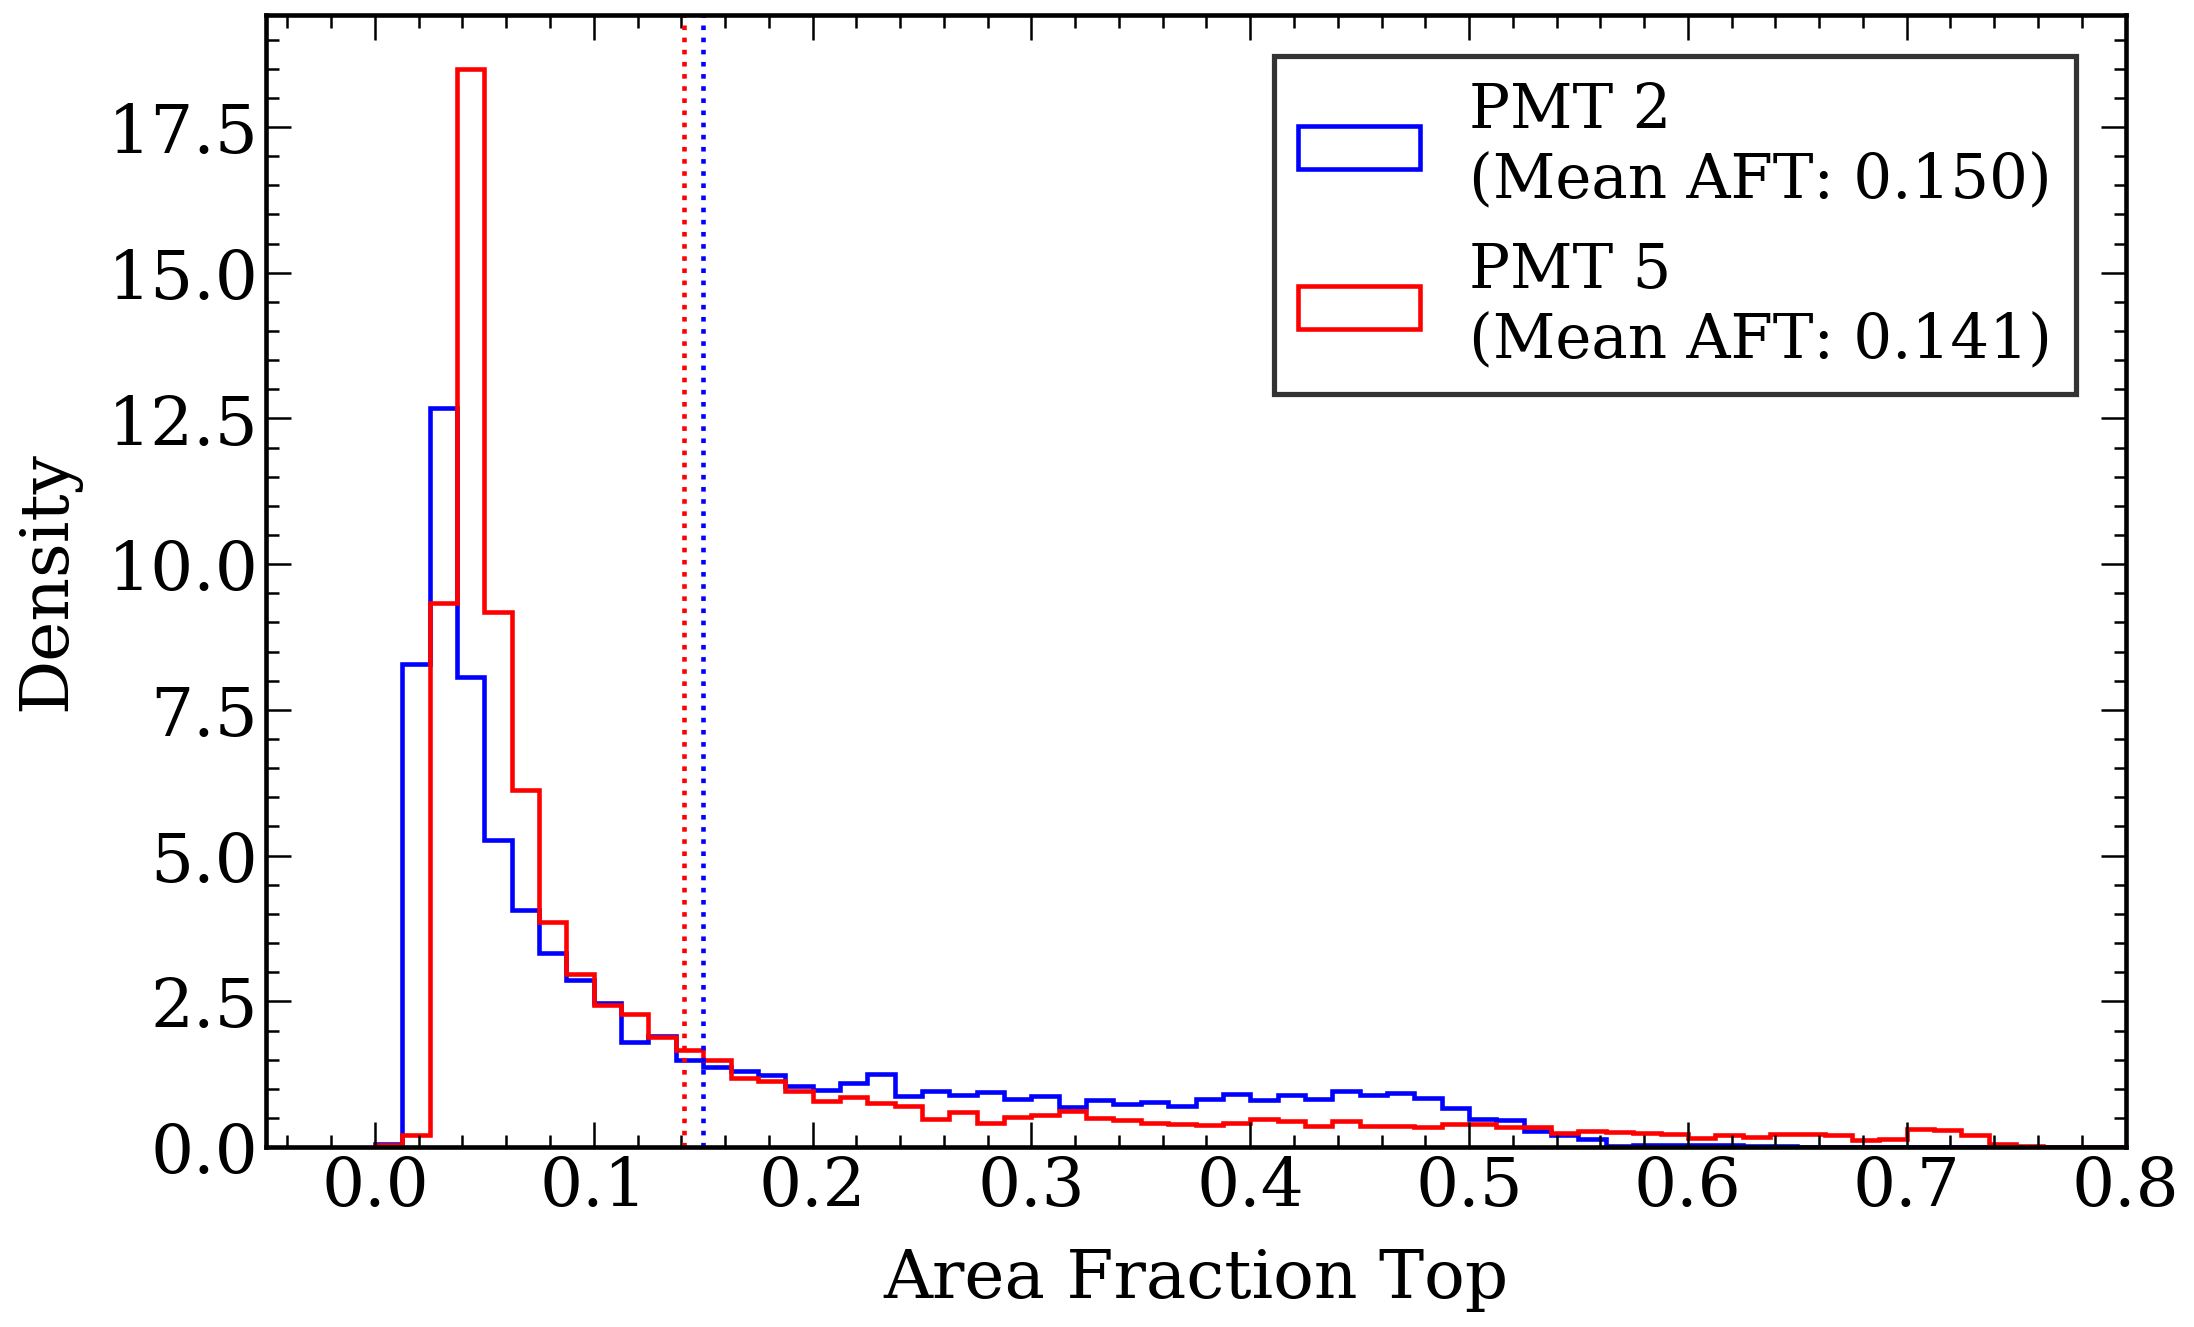

In [22]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.hist(PMT2_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'blue', range = (0,1), 
         label = 'PMT 2'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT2_HF)).mean(), 3))+")")
plt.hist(PMT5_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'red', range = (0,1), 
         label = 'PMT 5'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT5_HF)).mean(), 3))+")")

plt.axvline(x=(np.array(PMT2_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'blue')
plt.axvline(x=(np.array(PMT5_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'red')

plt.xlabel('Area Fraction Top', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Density', fontsize = label_size, labelpad = label_pad)
#plt.title('Tagged Kr-83m S2s', fontsize = title_size, pad = title_pad)

plt.xlim(-0.05,0.8)

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_AFT_PMT25_hist_scaled_fixedbinning.png")
plt.show()

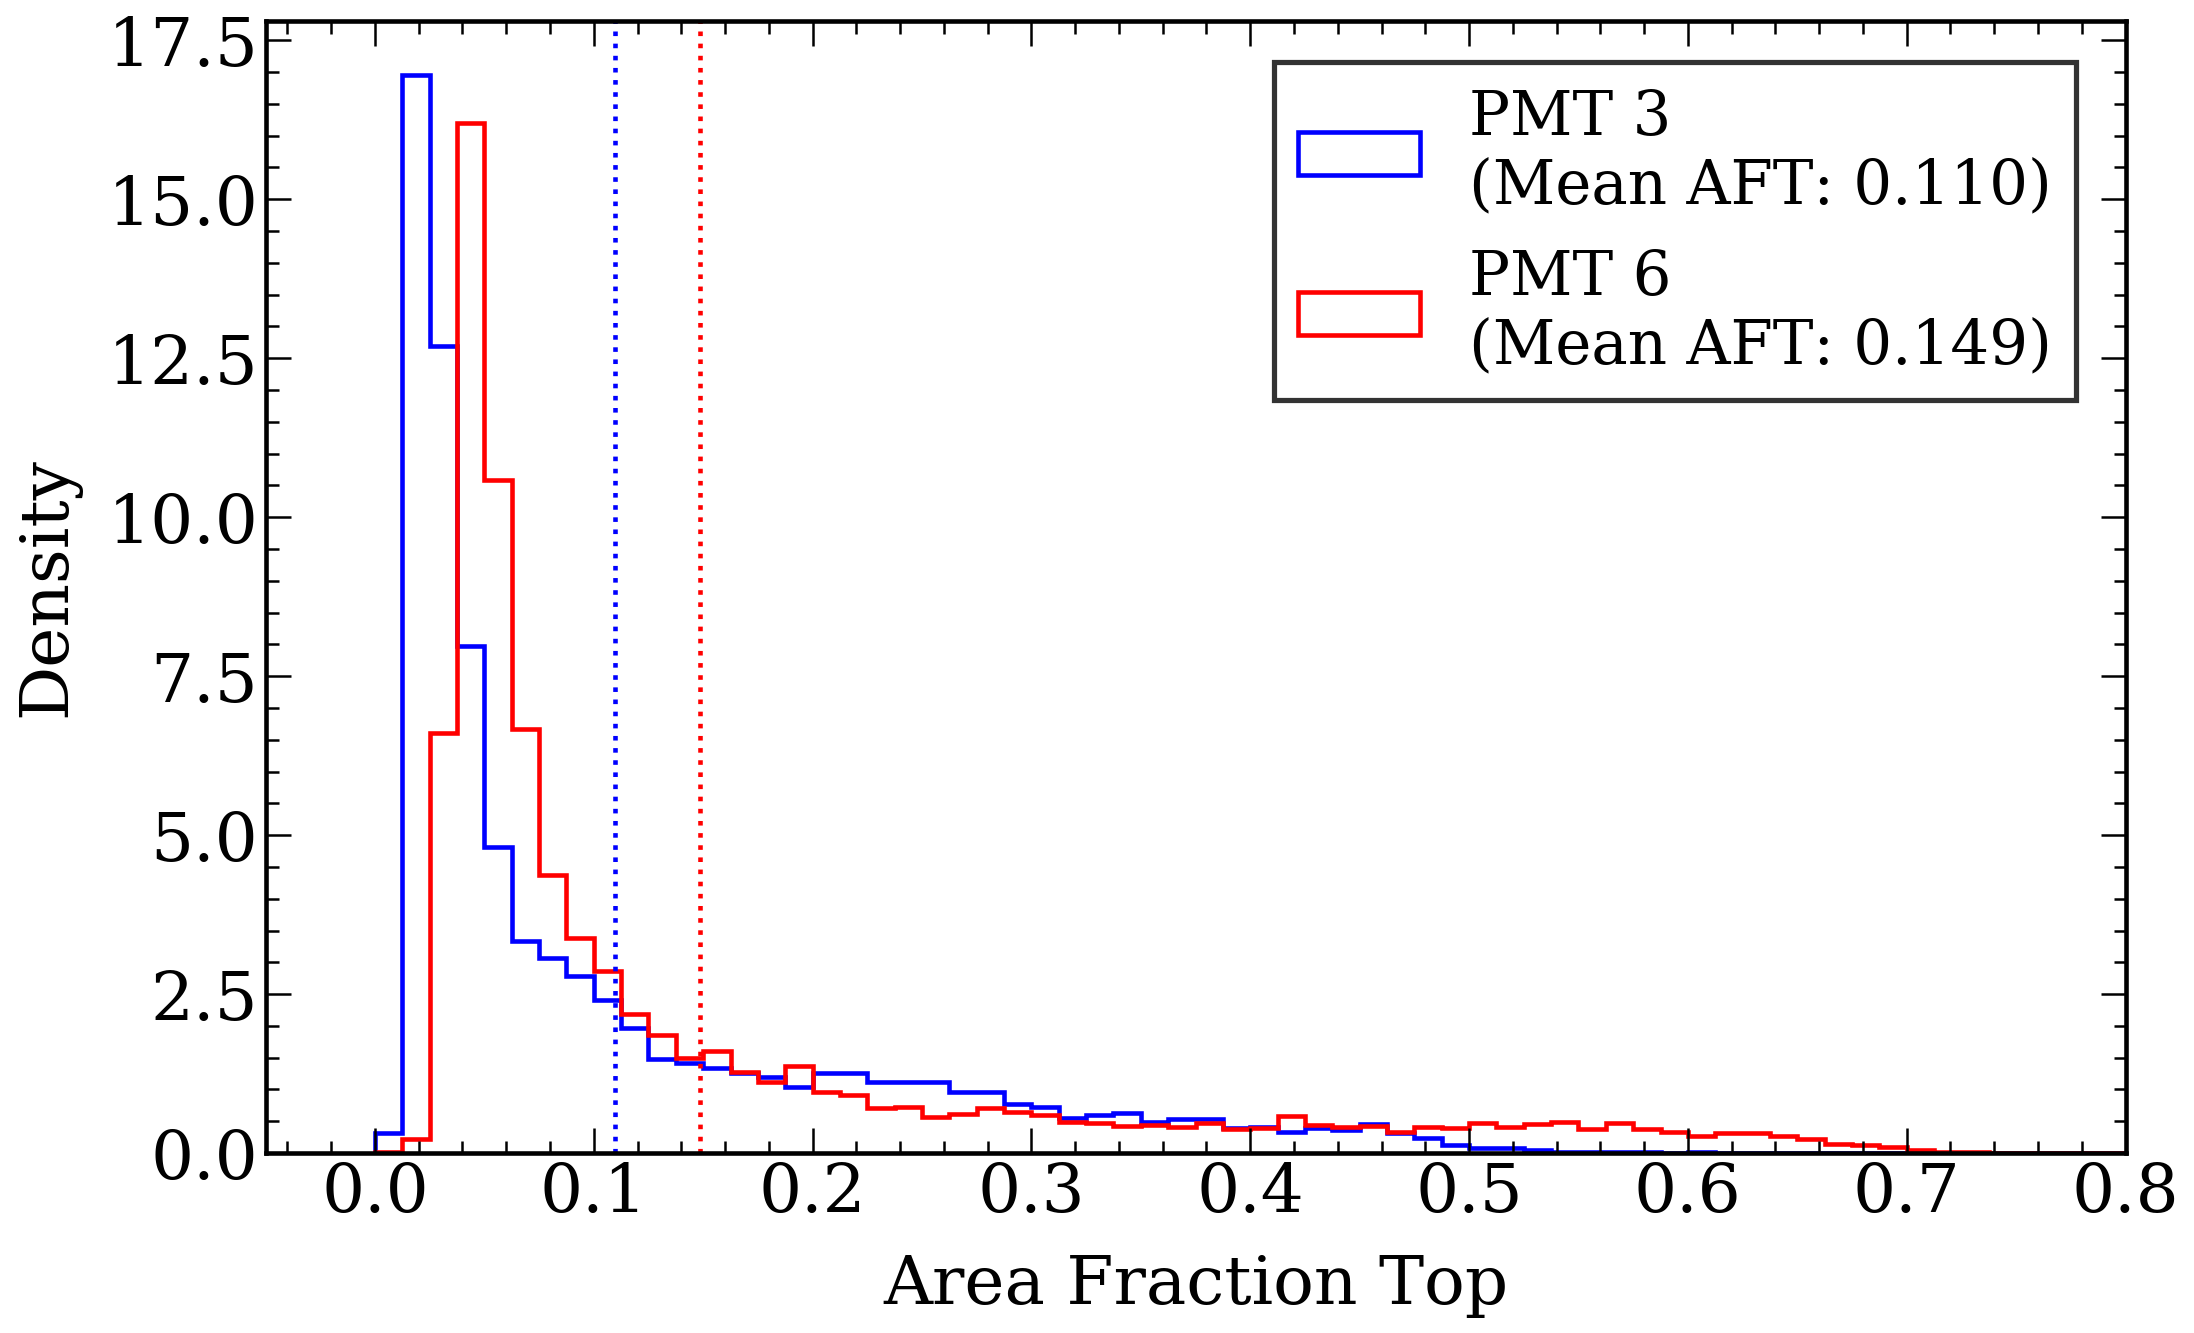

In [23]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.hist(PMT3_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'blue', range = (0,1), 
         label = 'PMT 3'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT3_HF)).mean(), 3))+")")
plt.hist(PMT6_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'red', range = (0,1), 
         label = 'PMT 6'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT6_HF)).mean(), 3))+")")

plt.axvline(x=(np.array(PMT3_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'blue')
plt.axvline(x=(np.array(PMT6_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'red')

plt.xlabel('Area Fraction Top', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Density', fontsize = label_size, labelpad = label_pad)
#plt.title('Tagged Kr-83m S2s', fontsize = title_size, pad = title_pad)

plt.xlim(-0.05,0.8)

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_AFT_PMT36_hist_scaled_fixedbinning.png")
plt.show()

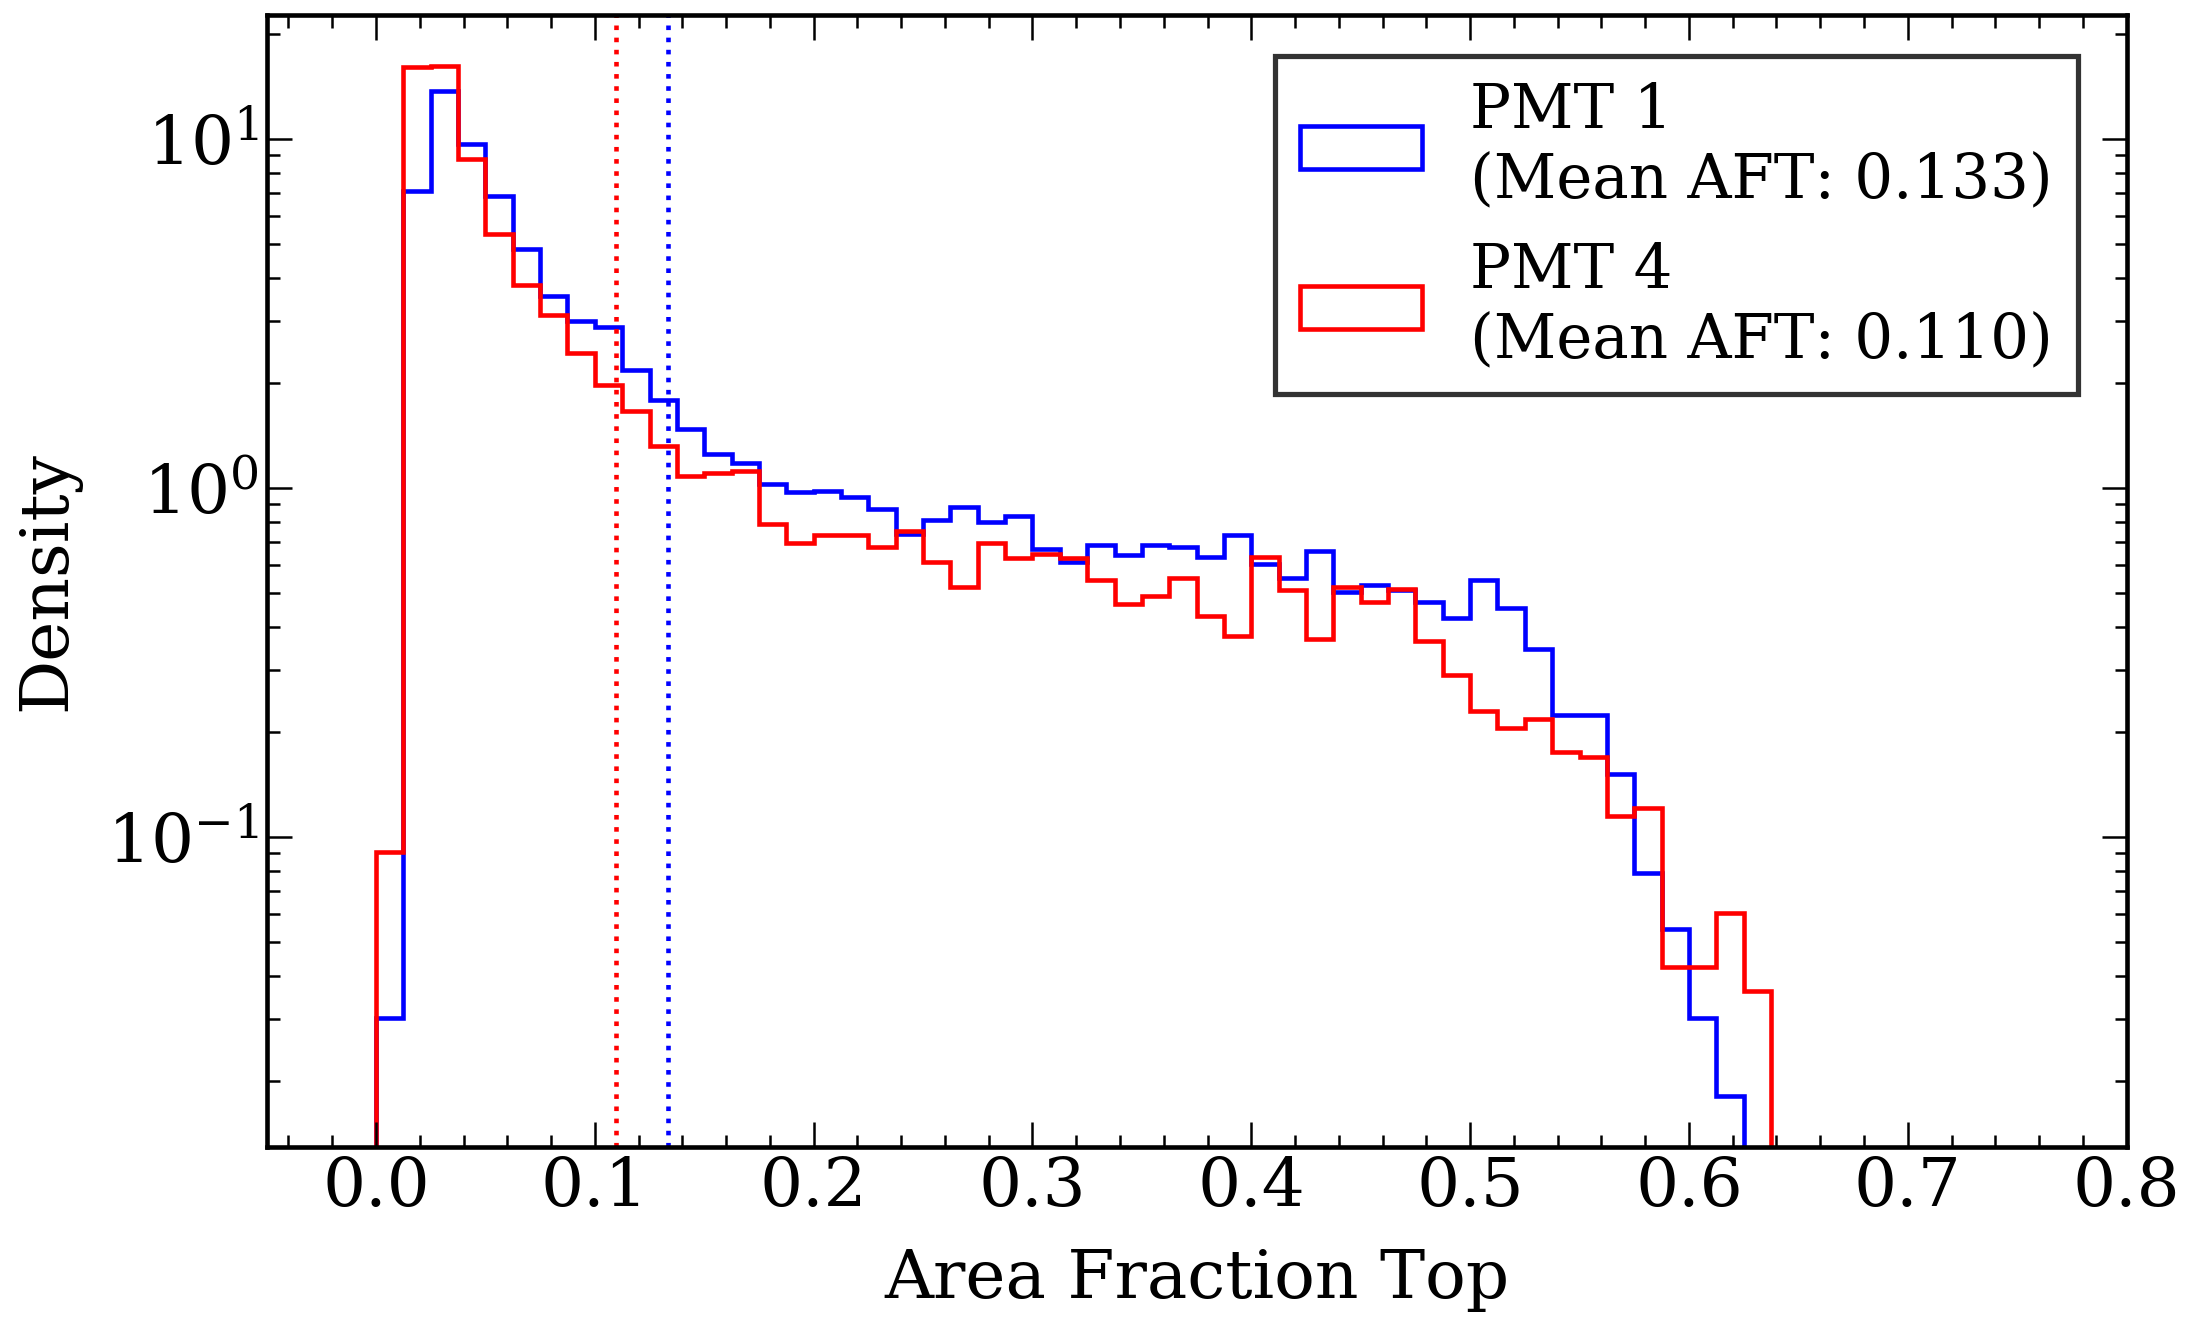

In [24]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.hist(PMT1_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'blue', range = (0,1), 
         label = 'PMT 1'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT1_HF)).mean(), 3))+")")
plt.hist(PMT4_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'red', range = (0,1), 
         label = 'PMT 4'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT4_HF)).mean(), 3))+")")

plt.axvline(x=(np.array(PMT1_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'blue')
plt.axvline(x=(np.array(PMT4_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'red')

plt.xlabel('Area Fraction Top', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Density', fontsize = label_size, labelpad = label_pad)
#plt.title('Tagged Kr-83m S2s', fontsize = title_size, pad = title_pad)

plt.xlim(-0.05,0.8)
plt.yscale('log')

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_AFT_PMT14_hist_scaled_fixedbinning_log.png", bbox_inches='tight')
plt.show()

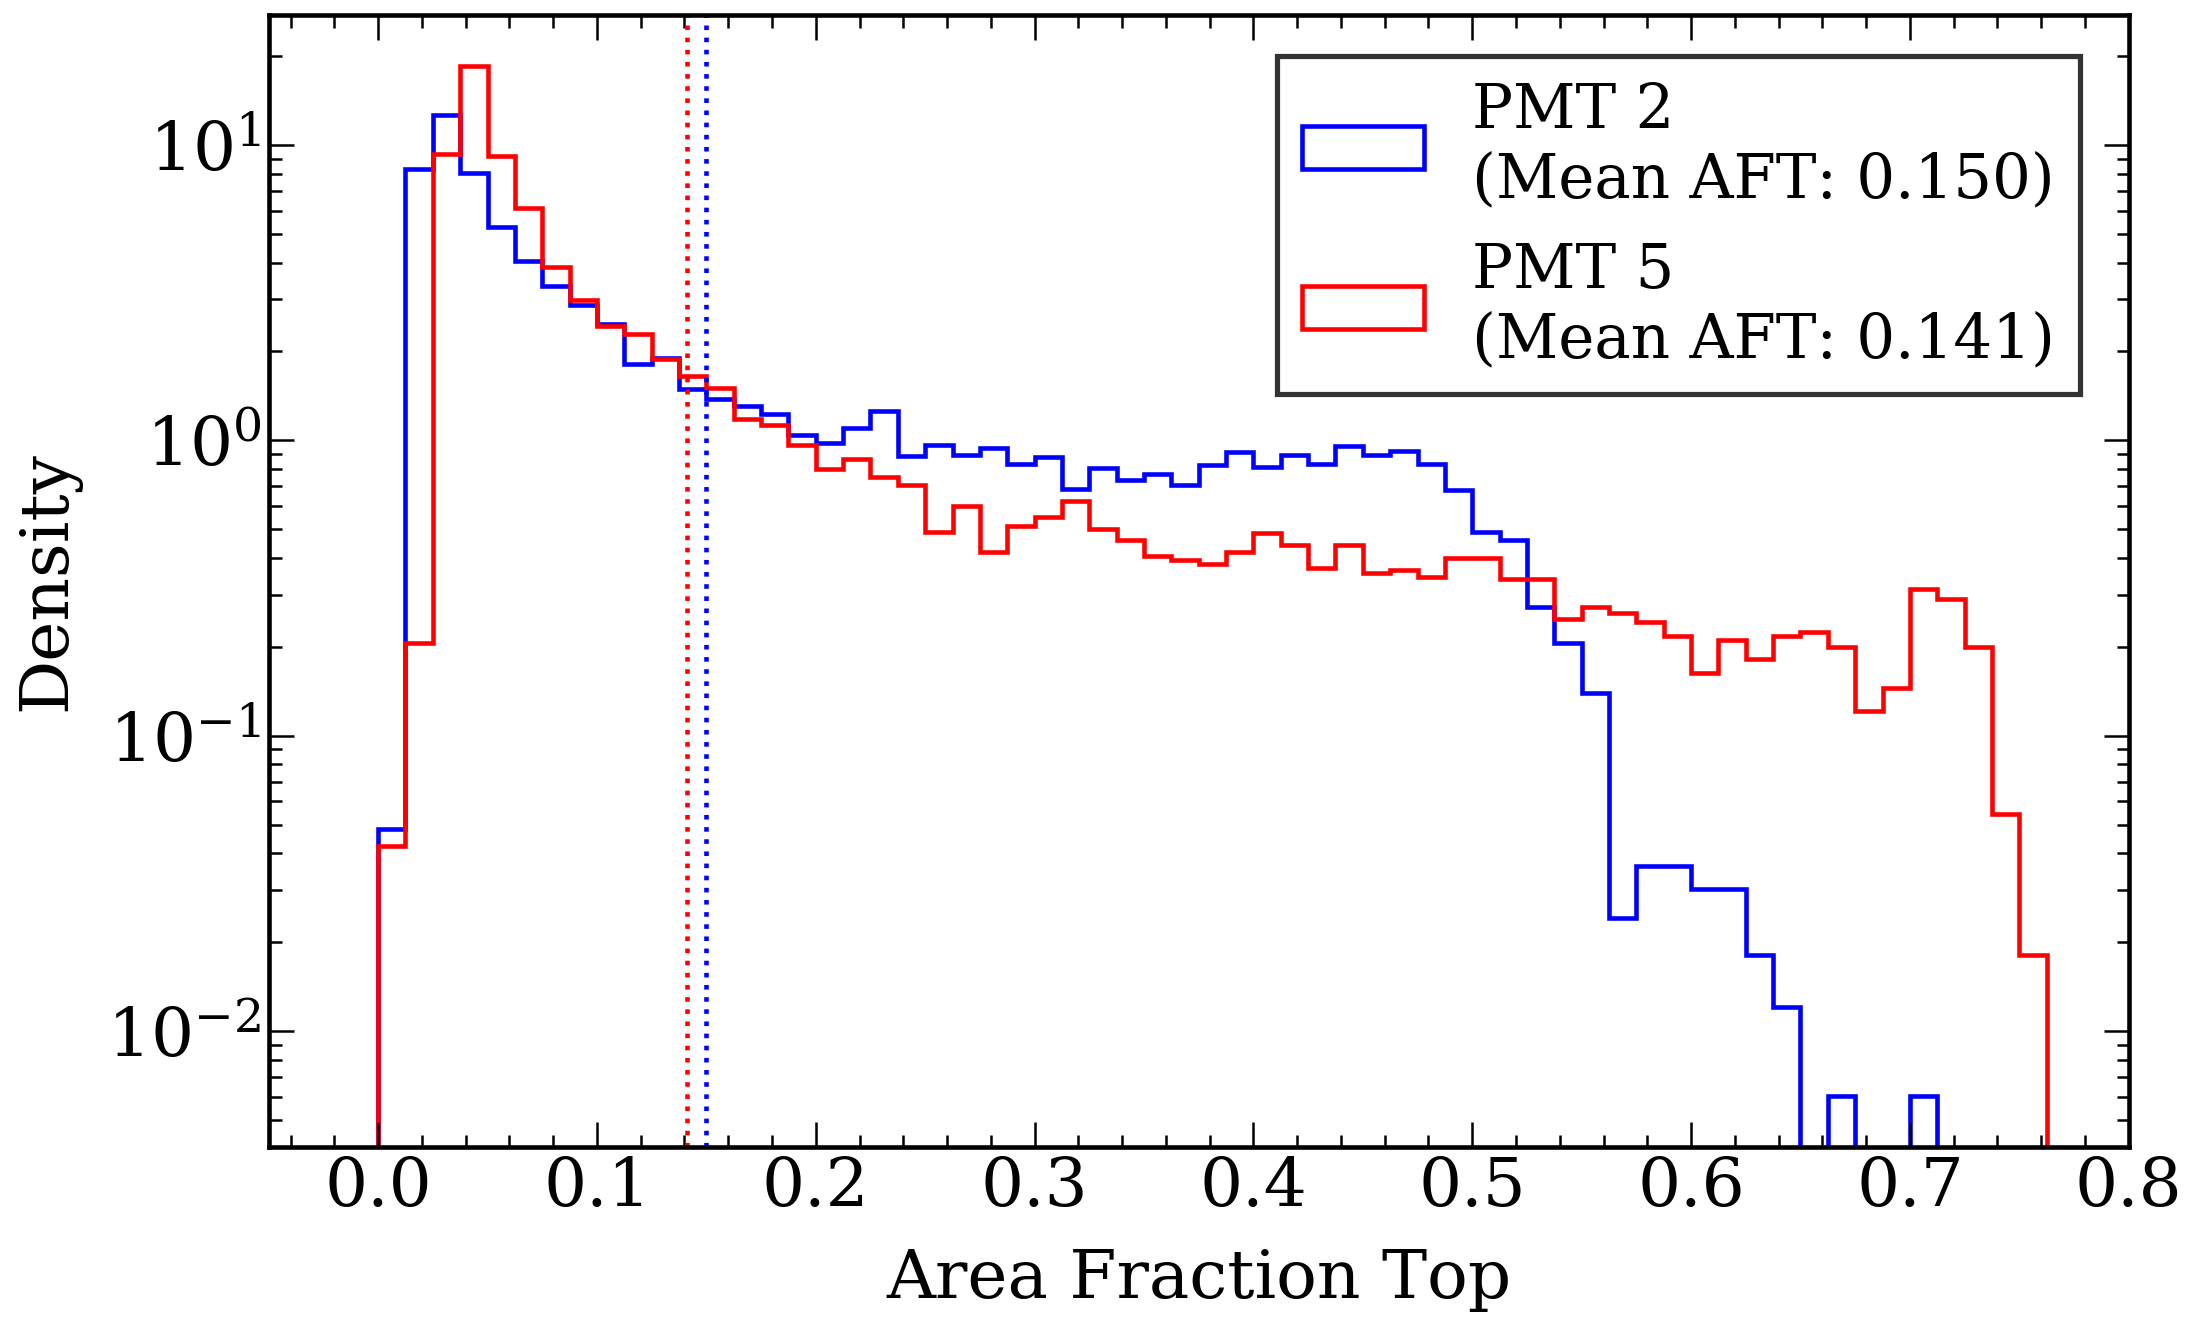

In [25]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.hist(PMT2_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'blue', range = (0,1), 
         label = 'PMT 2'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT2_HF)).mean(), 3))+")")
plt.hist(PMT5_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'red', range = (0,1), 
         label = 'PMT 5'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT5_HF)).mean(), 3))+")")

plt.axvline(x=(np.array(PMT2_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'blue')
plt.axvline(x=(np.array(PMT5_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'red')

plt.xlabel('Area Fraction Top', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Density', fontsize = label_size, labelpad = label_pad)
#plt.title('Tagged Kr-83m S2s', fontsize = title_size, pad = title_pad)

plt.xlim(-0.05,0.8)
plt.yscale('log')

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_AFT_PMT25_hist_scaled_fixedbinning_log.png", bbox_inches='tight')
plt.show()

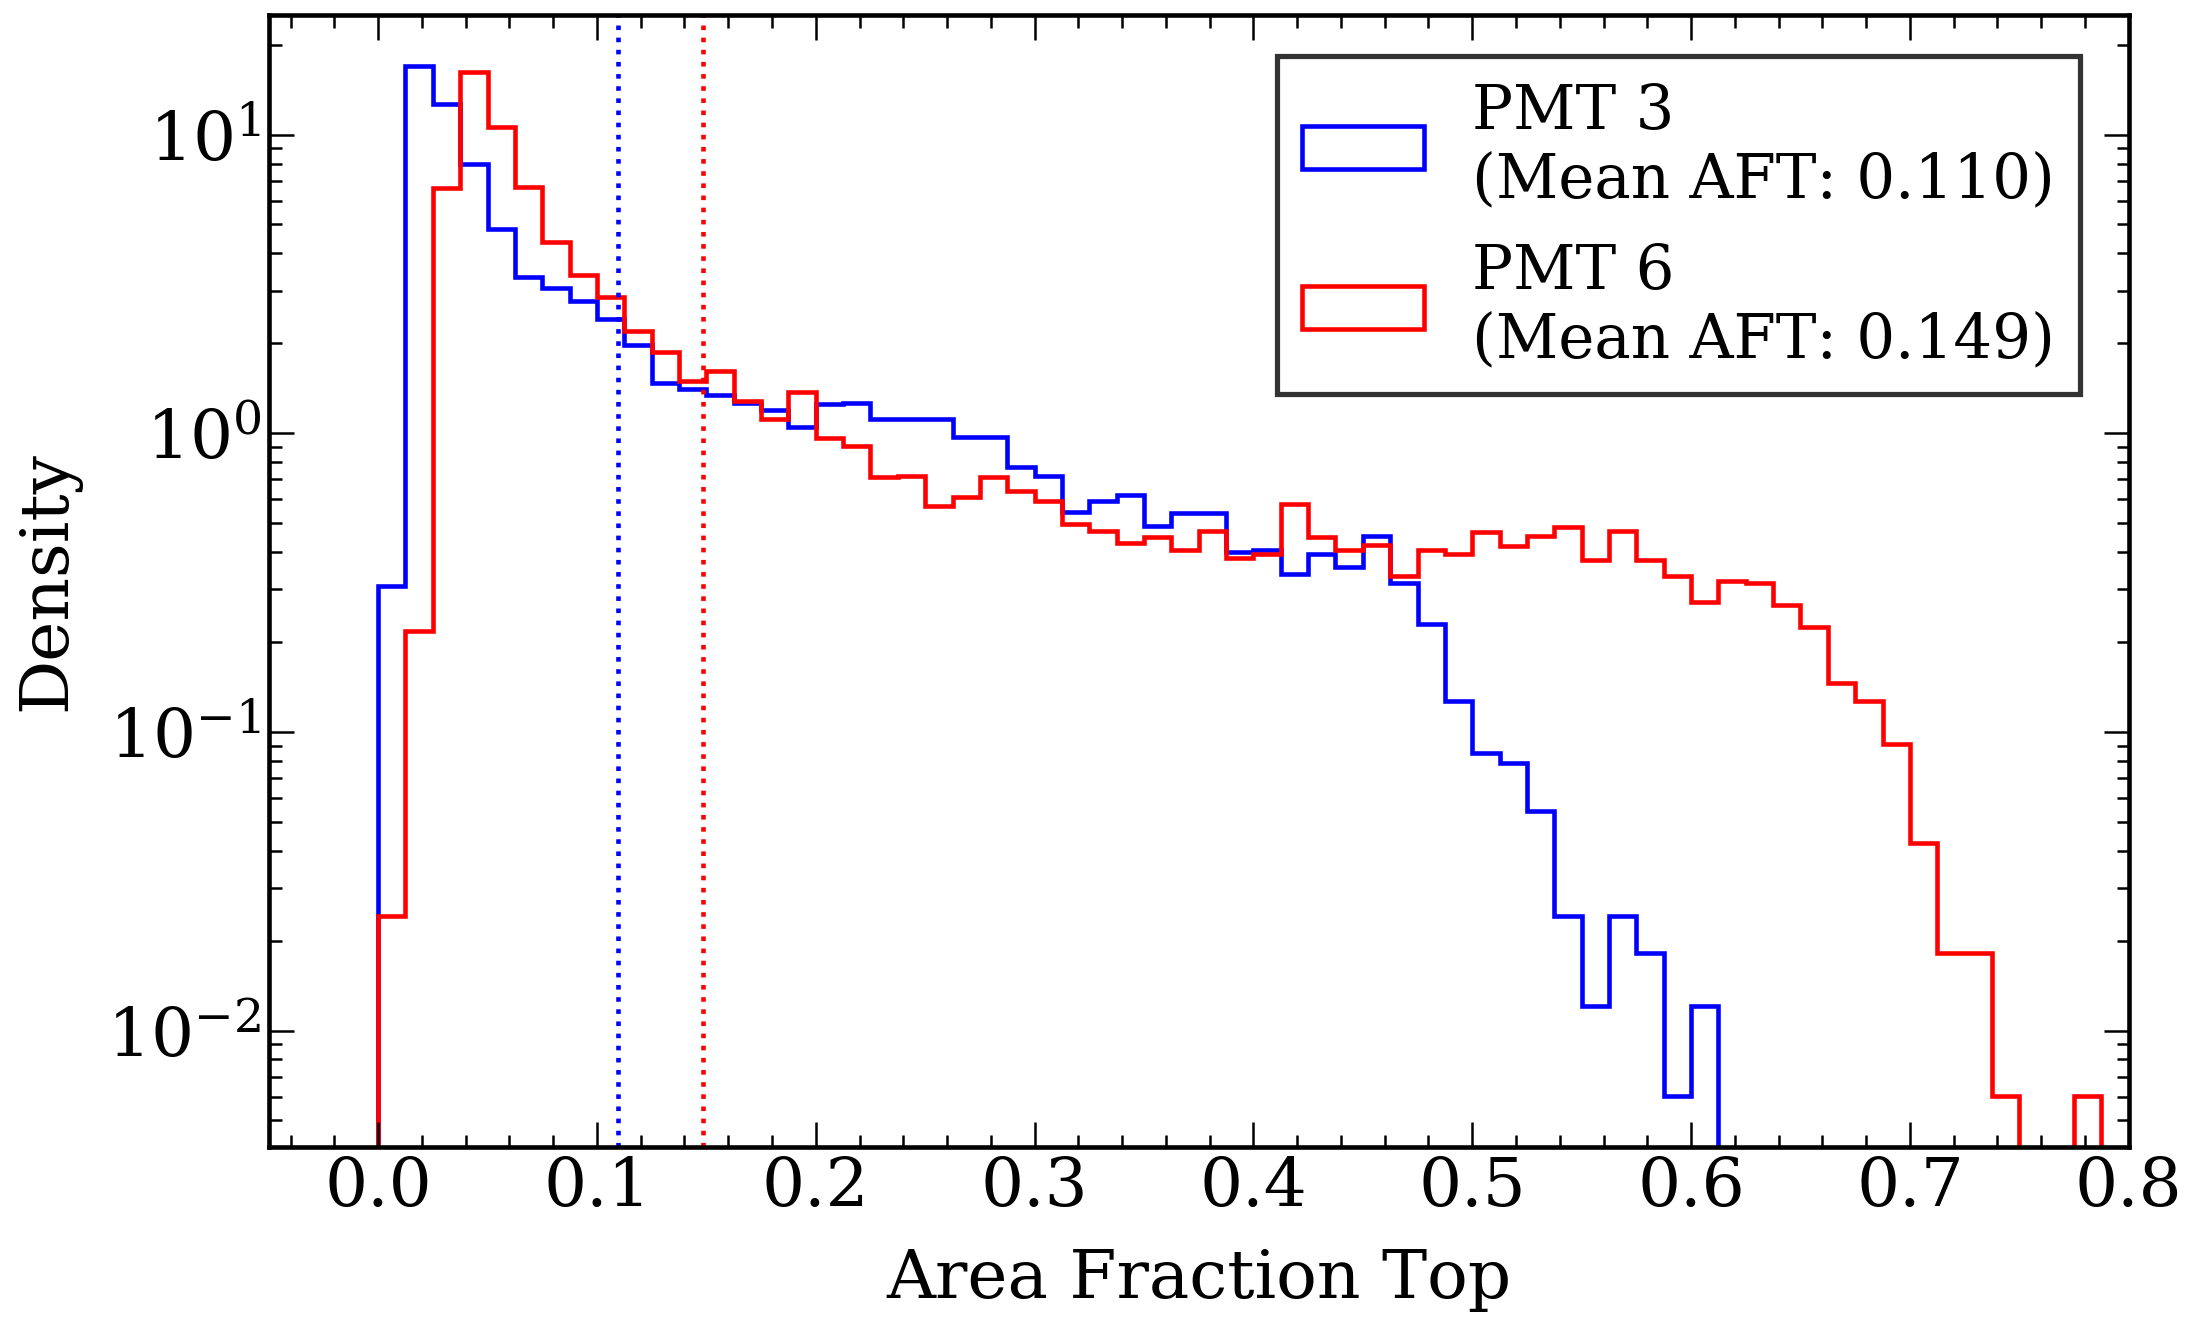

In [26]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.hist(PMT3_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'blue', range = (0,1), 
         label = 'PMT 3'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT3_HF)).mean(), 3))+")")
plt.hist(PMT6_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'red', range = (0,1), 
         label = 'PMT 6'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT6_HF)).mean(), 3))+")")

plt.axvline(x=(np.array(PMT3_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'blue')
plt.axvline(x=(np.array(PMT6_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'red')

plt.xlabel('Area Fraction Top', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Density', fontsize = label_size, labelpad = label_pad)
#plt.title('Tagged Kr-83m S2s', fontsize = title_size, pad = title_pad)

plt.xlim(-0.05,0.8)
plt.yscale('log')

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_AFT_PMT36_hist_scaled_fixedbinning_log.png", bbox_inches='tight')
plt.show()

### Average equal PMTs

(7, 82)
(7, 82)


PMT1  \
area                 [426.16977, 190.64023, 172.95564, 144.08025, 4...   
HF                   [0.09338497074456319, 0.030777857546780384, 0....   
hist_HF_bins_center  [-0.006250000000000002, 0.00625, 0.01875000000...   
hist_HF_n            [0.0, 0.03026405387001589, 7.087841416357721, ...   

                                                                  PMT2  \
area                 [1846.7761, 524.09015, 636.9843, 105.065254, 1...   
HF                   [0.40467707155995775, 0.08461158534880628, 0.1...   
hist_HF_bins_center  [-0.006250000000000002, 0.00625, 0.01875000000...   
hist_HF_n            [0.0, 0.048422486192025424, 8.28629794961035, ...   

                                                                  PMT3  \
area                 [537.56274, 3202.876, 3091.1914, 149.54991, 20...   
HF                   [0.11779409229076401, 0.5170874030126767, 0.52...   
hist_HF_bins_center  [-0.006250000000000002, 0.00625, 0.01875000000...   
hist_HF_n            [0.0, 0.30869334947416205, 16.959975788756903,...   

                                                                  PMT4  \
area                 [156.90564, 1062.0885, 908.21893, 650.06433, 3...   
HF                   [0.03438213975791153, 0.17146857660377493, 0.1...   
hist_HF_bins_center  [-0.006250000000000002, 0.00625, 0.01875000000...   
hist_HF_n            [0.0, 0.09079216161004766, 16.009684497238403,...   

                                                                  PMT5  \
area                 [189.35686, 308.73694, 258.4374, 4162.3887, 29...   
HF                   [0.04149305242557372, 0.049843947408250516, 0....   
hist_HF_bins_center  [-0.006250000000000002, 0.00625, 0.01875000000...   
hist_HF_n            [0.0, 0.042369675418022244, 0.2057955663161080...   

                                                                  PMT6  \
area                 [186.81871, 224.73189, 149.86327, 439.07626, 2...   
HF                   [0.04093687787292209, 0.036281775846452, 0.025...   
hist_HF_bins_center  [-0.006250000000000002, 0.00625, 0.01875000000...   
hist_HF_n            [0.0, 0.024211243096012712, 0.2179011878641144...   

                                                                  PMT7  
area                 [1219.99, 680.9071, 628.42194, 485.72406, 1632...  
HF                   [0.2673317953483077, 0.10992885423325913, 0.10...  
hist_HF_bins_center  [-0.006250000000000002, 0.00625, 0.01875000000...  
hist_HF_n            [0.0, 0.012105621548006356, 0.0, 0.0, 0.012105...

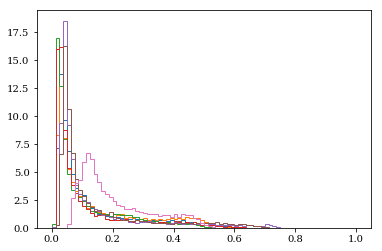

In [27]:
n_list = []
bins_center_list = []

for i in range(1,8):
    n, bins, *patches = plt.hist(eval('PMT'+str(i)+'_HF'), bins = 80, density = True, range = (0,1), histtype='step')
    bins_center = (bins[1:] + bins[:-1])/2
    
    n = np.concatenate((np.array([0]), n, np.array([0])))
    bins_center = np.concatenate((np.array([2*bins_center[0]-bins_center[1]]), bins_center, np.array([2*bins_center[-1]-bins_center[-2]])))
    
    n_list.append(n)
    bins_center_list.append(bins_center)

try:
    df = df.drop(index = ['hist_HF_n', 'hist_HF_bins_center'])
except:
    pass

print((np.array(n_list)).shape)
print((np.array(bins_center_list)).shape)

d = {'PMT1': [bins_center_list[0], n_list[0]], 'PMT2': [bins_center_list[1], n_list[1]], 
'PMT3': [bins_center_list[2], n_list[2]], 'PMT4': [bins_center_list[3], n_list[3]], 
'PMT5': [bins_center_list[4], n_list[4]], 'PMT6': [bins_center_list[5], n_list[5]], 
'PMT7': [bins_center_list[6], n_list[6]]}
df_append = pd.DataFrame(data=d, index = ['hist_HF_bins_center', 'hist_HF_n'])
df = df.append(df_append)

df.to_pickle(filenameprefix+"_Kr83m_S2_AFT.pkl")    
df

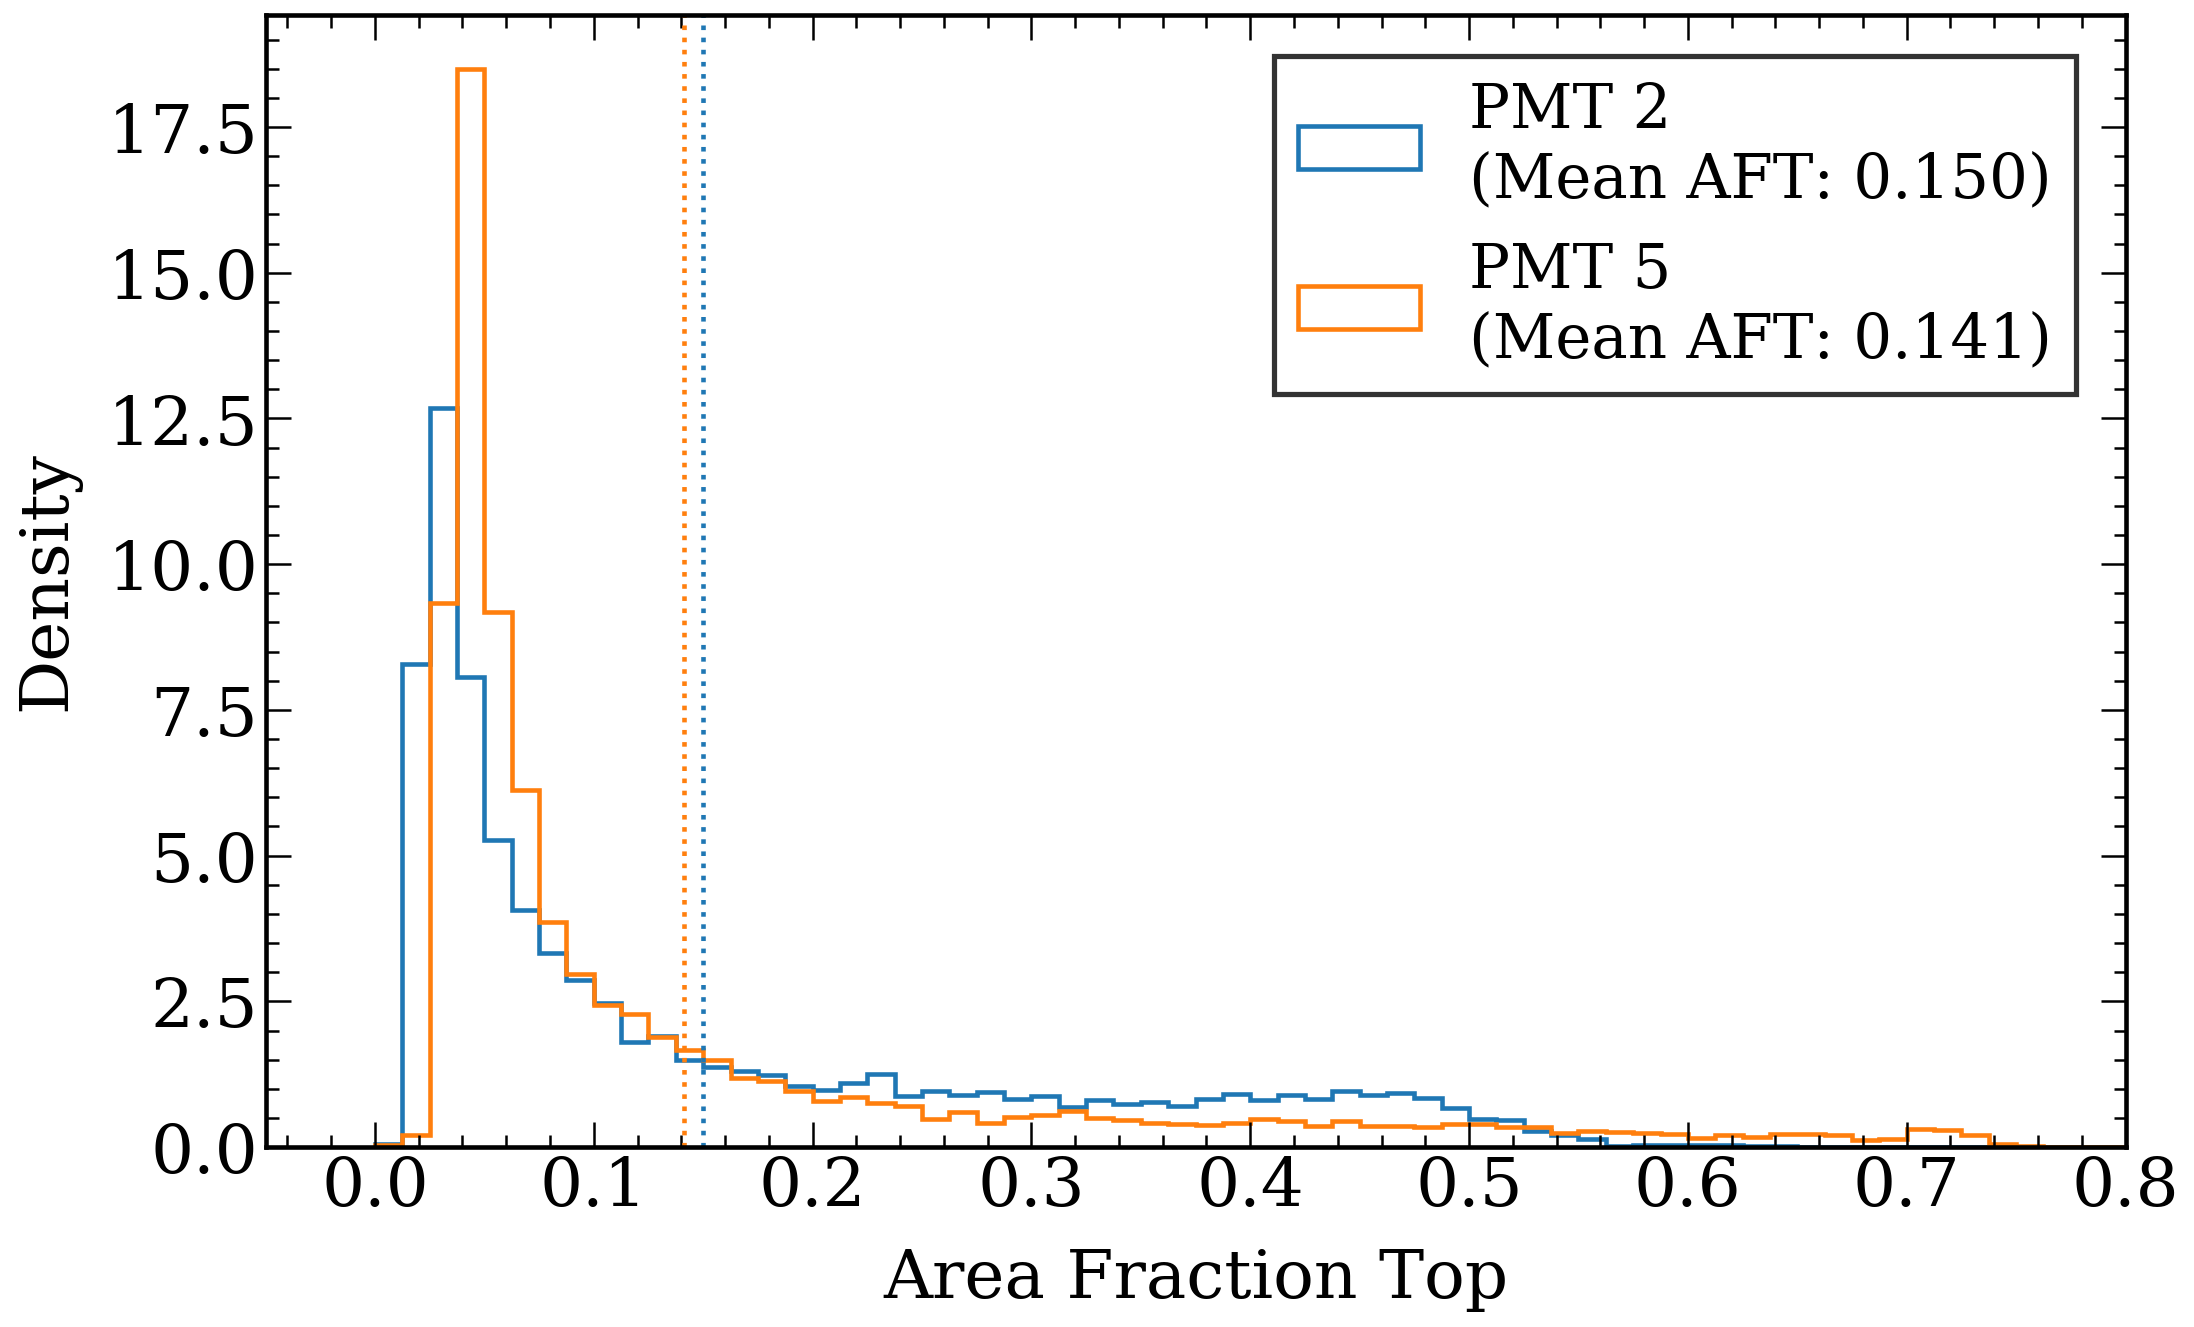

In [28]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.hist(PMT2_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C0', range = (0,1), 
         label = 'PMT 2'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT2_HF)).mean(), 3))+")")
plt.hist(PMT5_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C1', range = (0,1), 
         label = 'PMT 5'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT5_HF)).mean(), 3))+")")


plt.axvline(x=(np.array(PMT2_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C0')
plt.axvline(x=(np.array(PMT5_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C1')

plt.xlabel('Area Fraction Top', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Density', fontsize = label_size, labelpad = label_pad)
#plt.title('Tagged Kr-83m S2s', fontsize = title_size, pad = title_pad)

plt.xlim(-0.05,0.8)

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_AFT_PMT25_hist_scaled_fixedbinning.png")
plt.show()

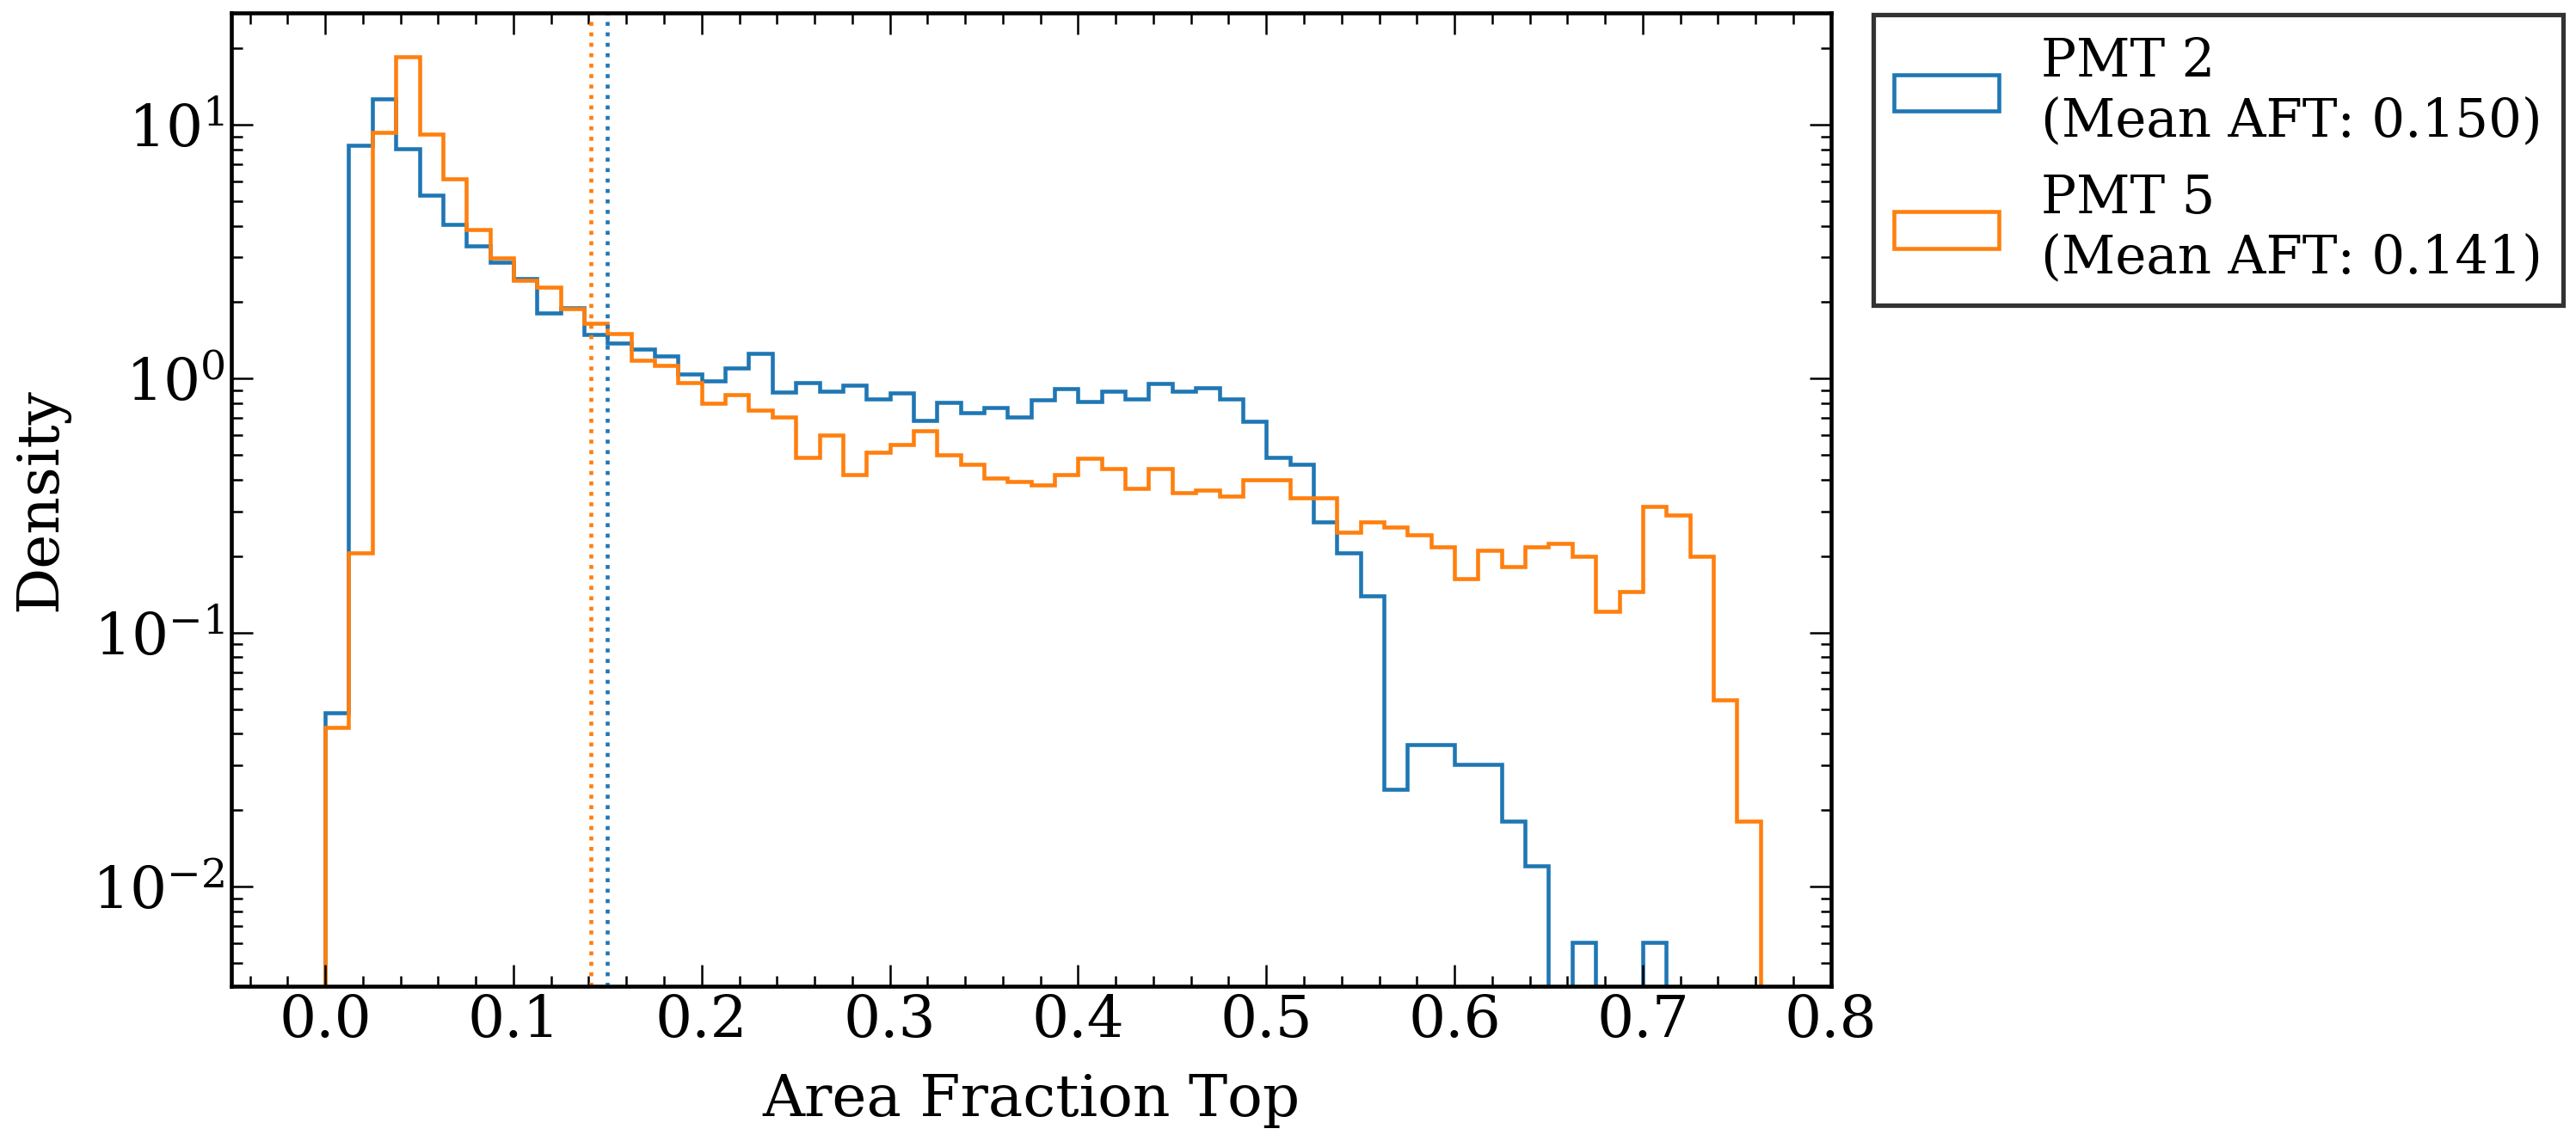

In [29]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.hist(PMT2_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C0', range = (0,1), 
         label = 'PMT 2'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT2_HF)).mean(), 3))+")")
plt.hist(PMT5_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C1', range = (0,1), 
         label = 'PMT 5'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT5_HF)).mean(), 3))+")")


plt.axvline(x=(np.array(PMT2_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C0')
plt.axvline(x=(np.array(PMT5_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C1')

plt.xlabel('Area Fraction Top', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Density', fontsize = label_size, labelpad = label_pad)
#plt.title('Tagged Kr-83m S2s', fontsize = title_size, pad = title_pad)

plt.xlim(-0.05,0.8)
plt.yscale('log')

# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(1.01,1.025), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_AFT_PMT25_hist_scaled_fixedbinning_log.png", bbox_inches='tight')
plt.show()

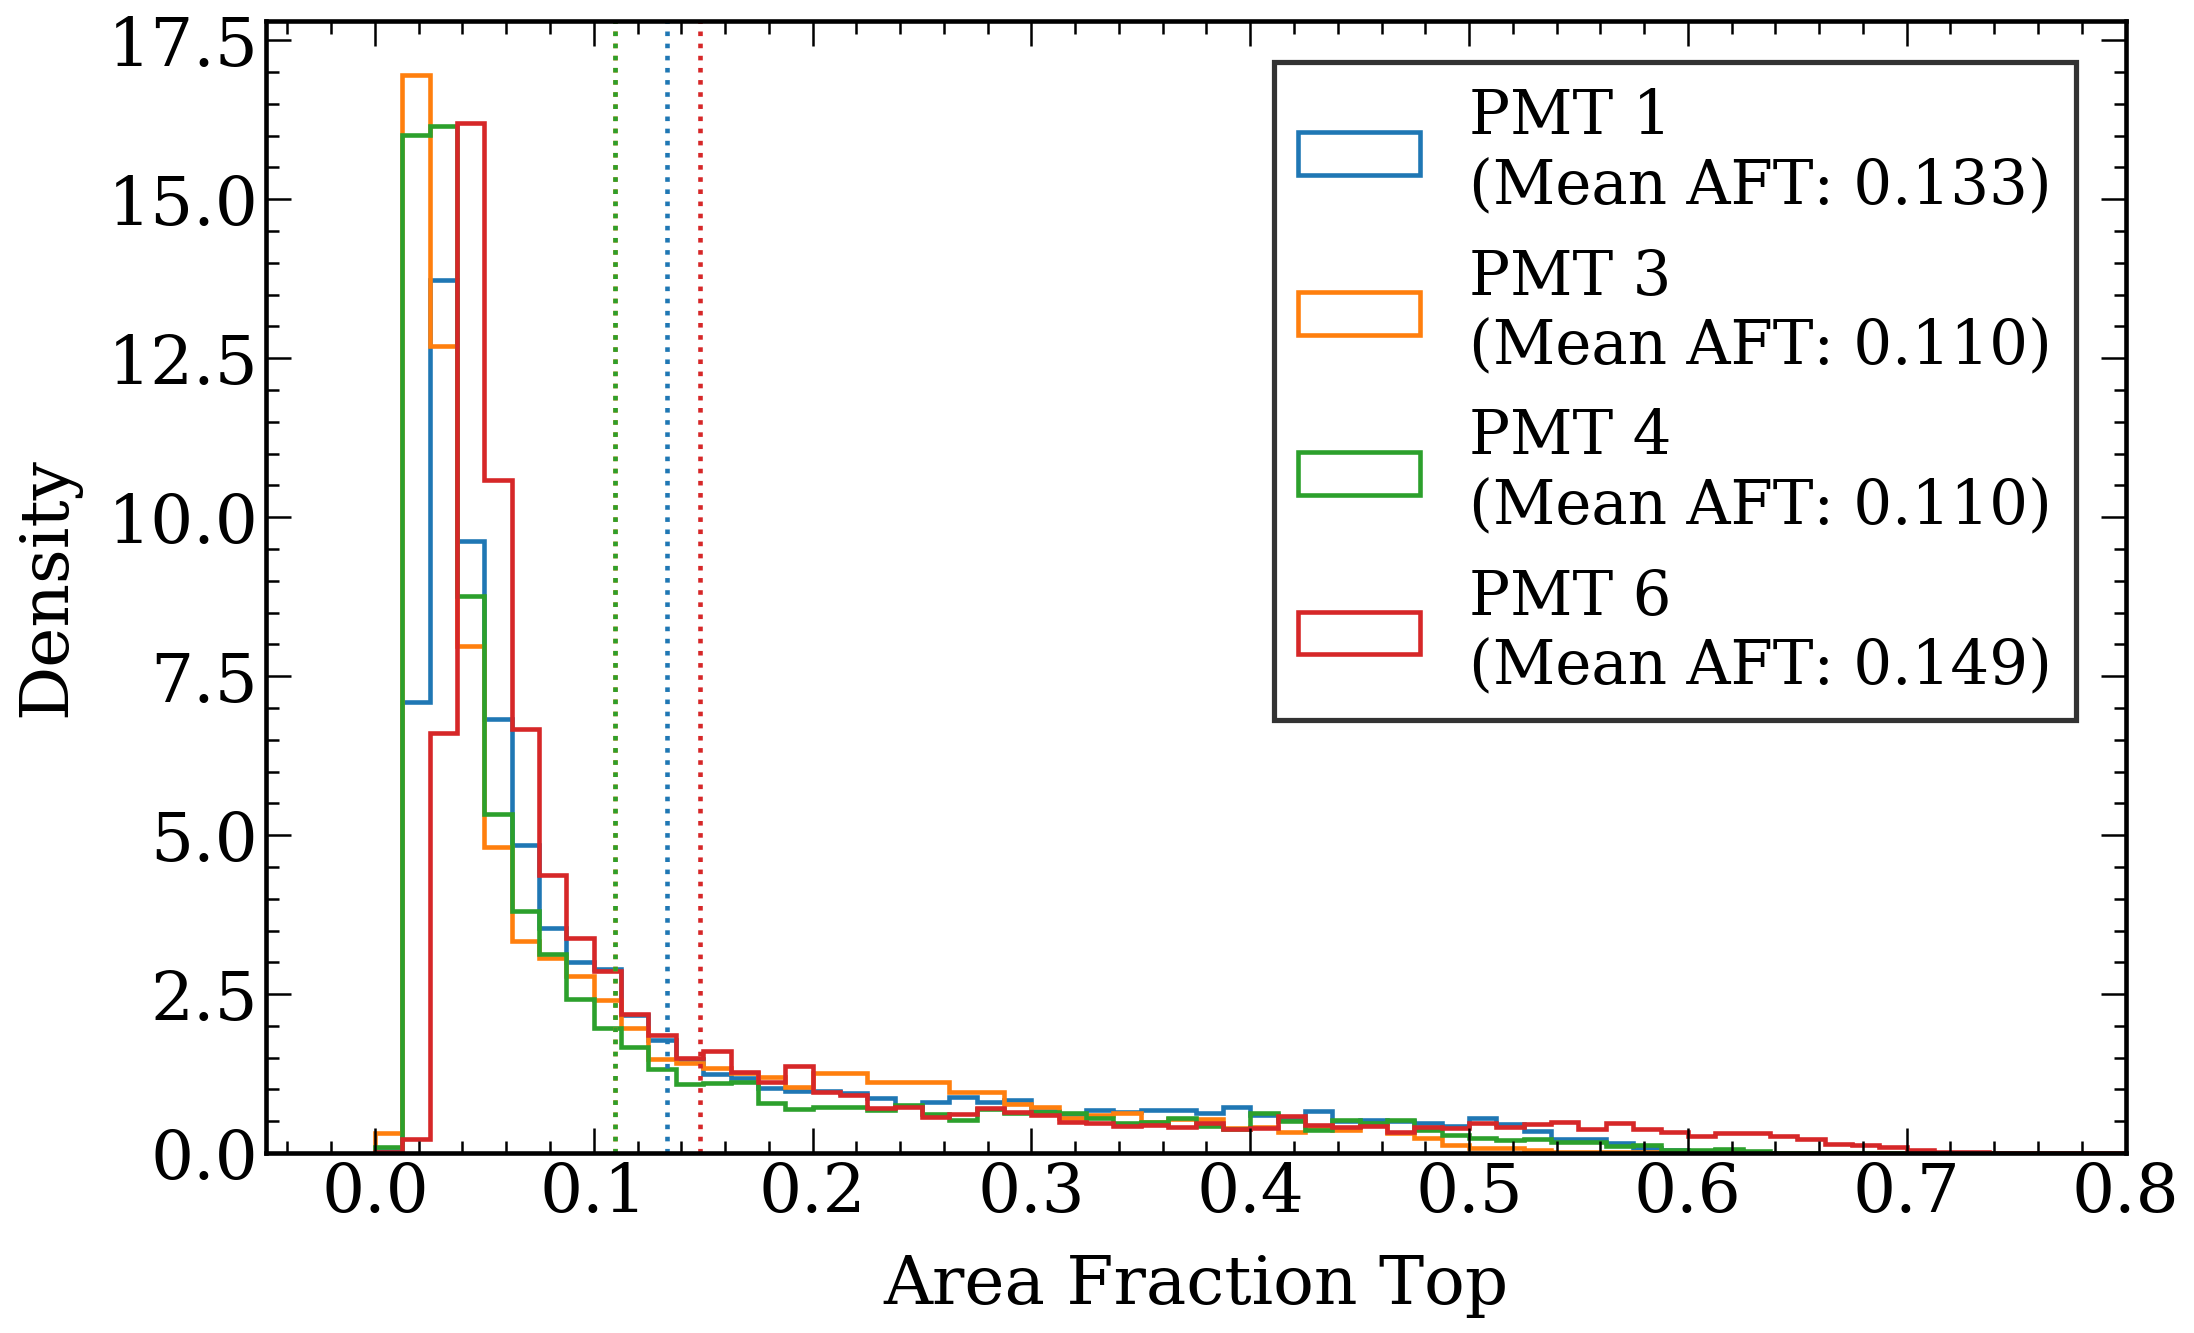

In [30]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.hist(PMT1_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C0', range = (0,1), 
         label = 'PMT 1'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT1_HF)).mean(), 3))+")")
plt.hist(PMT3_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C1', range = (0,1), 
         label = 'PMT 3'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT3_HF)).mean(), 3))+")")
plt.hist(PMT4_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C2', range = (0,1), 
         label = 'PMT 4'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT4_HF)).mean(), 3))+")")
plt.hist(PMT6_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C3', range = (0,1), 
         label = 'PMT 6'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT6_HF)).mean(), 3))+")")


plt.axvline(x=(np.array(PMT1_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C0')
plt.axvline(x=(np.array(PMT3_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C1')
plt.axvline(x=(np.array(PMT4_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C2')
plt.axvline(x=(np.array(PMT6_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C3')

plt.xlabel('Area Fraction Top', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Density', fontsize = label_size, labelpad = label_pad)
#plt.title('Tagged Kr-83m S2s', fontsize = title_size, pad = title_pad)

plt.xlim(-0.05,0.8)

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_AFT_PMT1346_hist_scaled_fixedbinning.png")
plt.show()

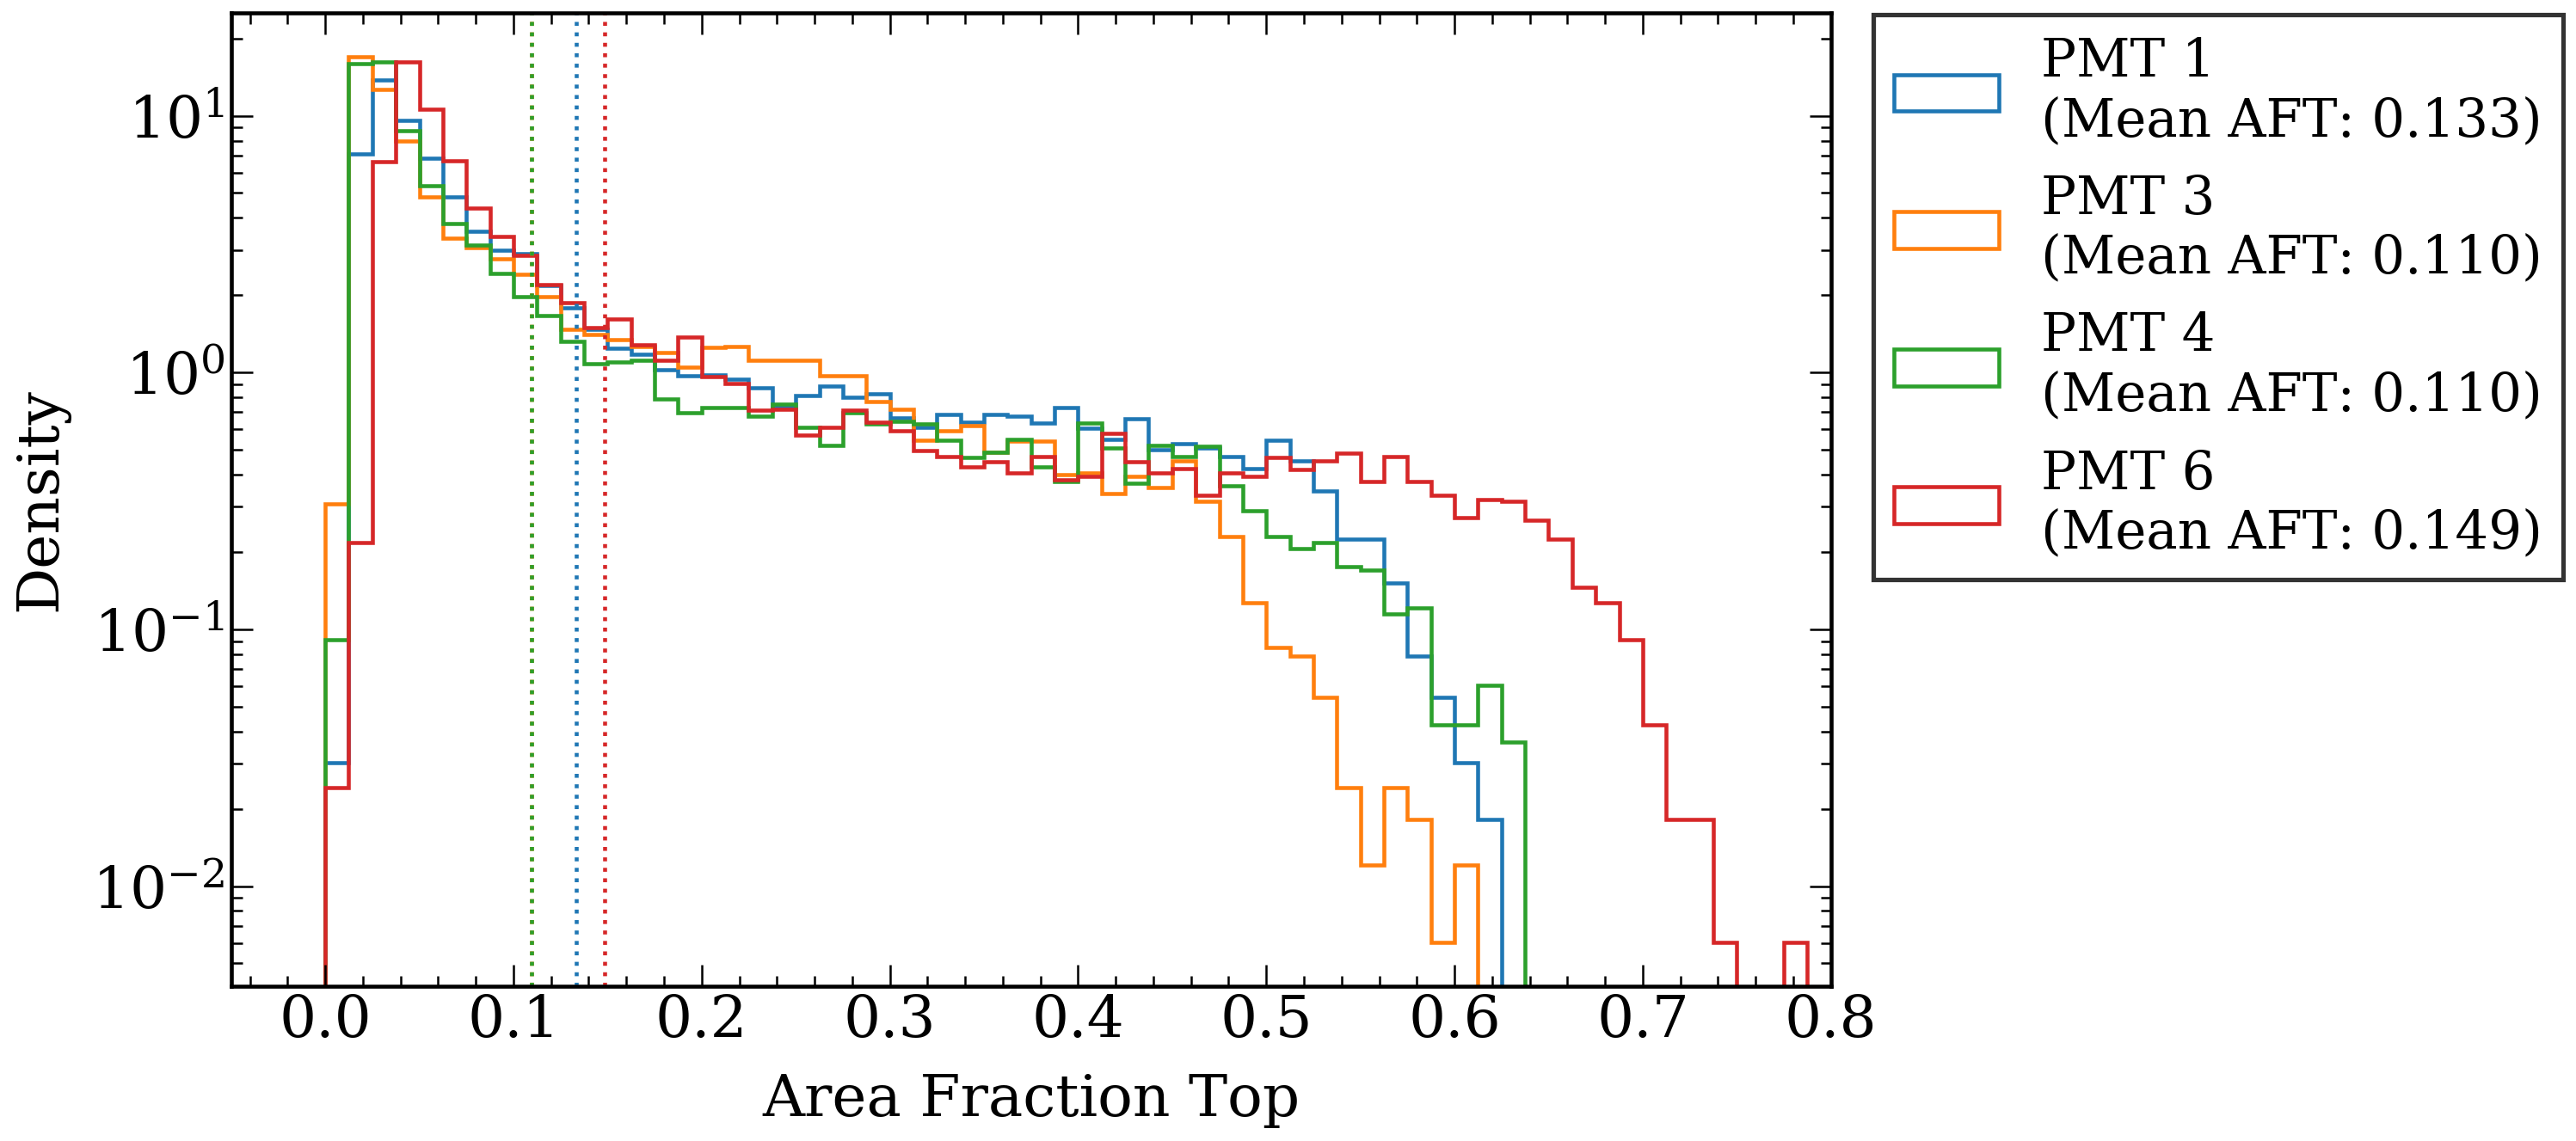

In [31]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.hist(PMT1_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C0', range = (0,1), 
         label = 'PMT 1'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT1_HF)).mean(), 3))+")")
plt.hist(PMT3_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C1', range = (0,1), 
         label = 'PMT 3'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT3_HF)).mean(), 3))+")")
plt.hist(PMT4_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C2', range = (0,1), 
         label = 'PMT 4'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT4_HF)).mean(), 3))+")")
plt.hist(PMT6_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C3', range = (0,1), 
         label = 'PMT 6'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT6_HF)).mean(), 3))+")")


plt.axvline(x=(np.array(PMT1_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C0')
plt.axvline(x=(np.array(PMT3_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C1')
plt.axvline(x=(np.array(PMT4_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C2')
plt.axvline(x=(np.array(PMT6_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C3')

plt.xlabel('Area Fraction Top', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Density', fontsize = label_size, labelpad = label_pad)
#plt.title('Tagged Kr-83m S2s', fontsize = title_size, pad = title_pad)

plt.xlim(-0.05,0.8)
plt.yscale('log')

# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(1.01,1.025), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_AFT_PMT1346_hist_scaled_fixedbinning_log.png", bbox_inches='tight')
plt.show()

In [32]:
###########################
## Average equivalent PMTs
###########################

PMT1346_HF_hist = (df['PMT1']['hist_HF_n']+df['PMT3']['hist_HF_n']+df['PMT4']['hist_HF_n']+df['PMT6']['hist_HF_n'])/4
PMT1346_HF_hist_mean = (PMT1346_HF_hist*df['PMT1']['hist_HF_bins_center']).sum()/(PMT1346_HF_hist.sum())

PMT25_HF_hist = (df['PMT2']['hist_HF_n']+df['PMT5']['hist_HF_n'])/2
PMT25_HF_hist_mean = (PMT25_HF_hist*df['PMT2']['hist_HF_bins_center']).sum()/(PMT25_HF_hist.sum())

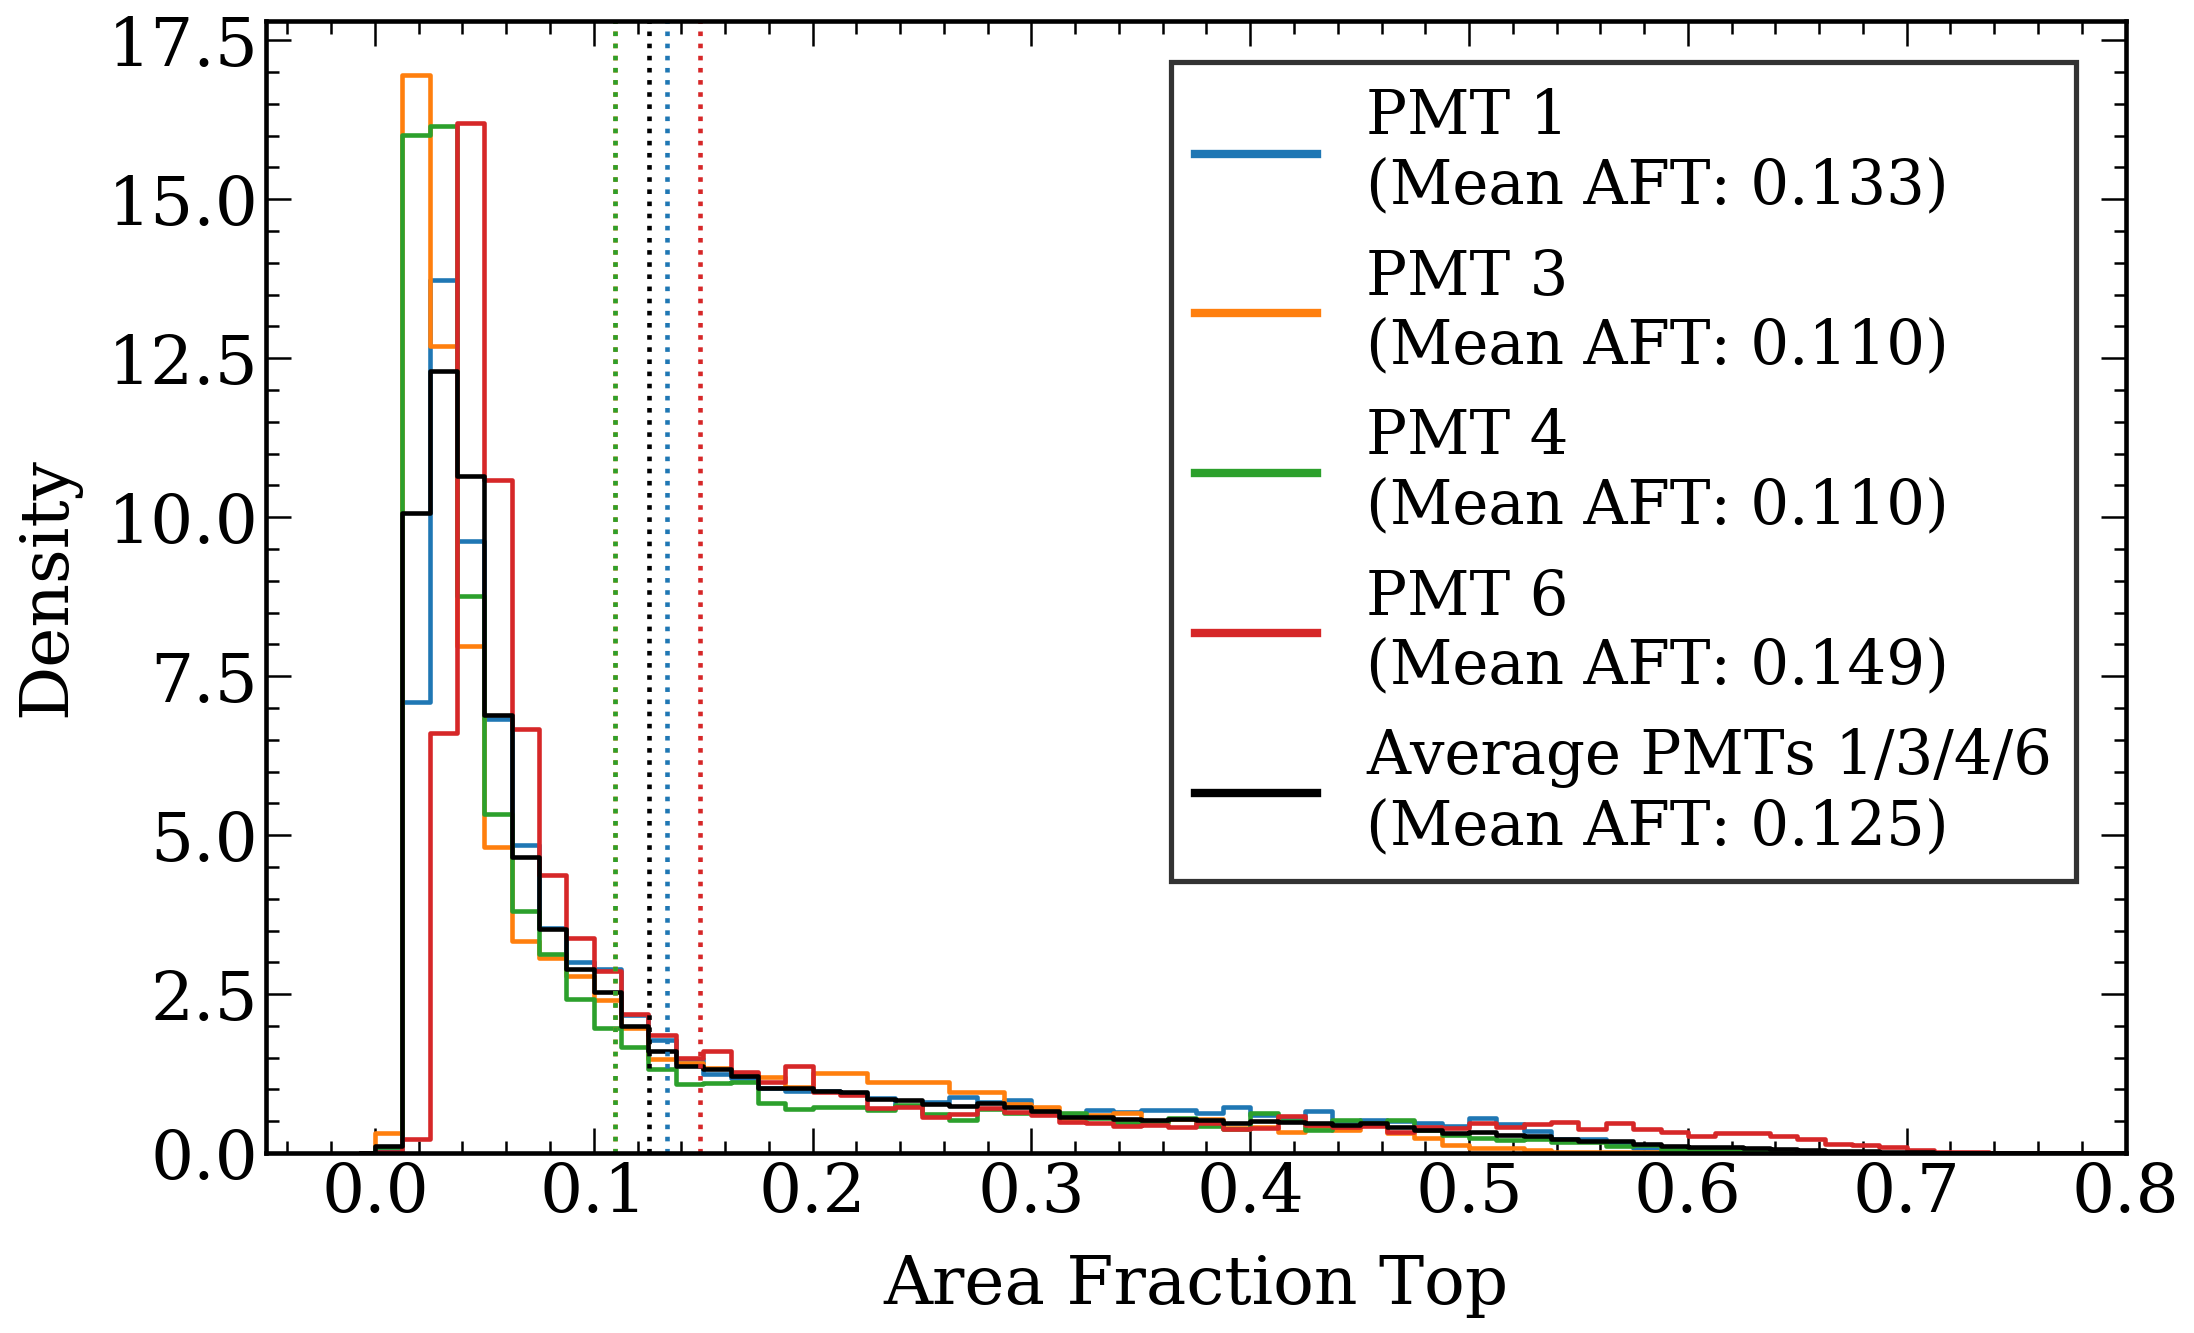

In [33]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

'''plt.hist(PMT1_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C0', range = (0,1), 
         label = 'PMT 1'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT1_HF)).mean(), 3))+")")
plt.hist(PMT3_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C1', range = (0,1), 
         label = 'PMT 3'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT3_HF)).mean(), 3))+")")
plt.hist(PMT4_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C2', range = (0,1), 
         label = 'PMT 4'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT4_HF)).mean(), 3))+")")
plt.hist(PMT6_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C3', range = (0,1), 
         label = 'PMT 6'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT6_HF)).mean(), 3))+")")'''

plt.step(df['PMT1']['hist_HF_bins_center'], df['PMT1']['hist_HF_n'], where='mid', 
         linewidth = 2.2, color = 'C0', 
         label = 'PMT 1'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT1_HF)).mean(), 3))+")")
plt.step(df['PMT3']['hist_HF_bins_center'], df['PMT3']['hist_HF_n'], where='mid', 
         linewidth = 2.2, color = 'C1', 
         label = 'PMT 3'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT3_HF)).mean(), 3))+")")
plt.step(df['PMT4']['hist_HF_bins_center'], df['PMT4']['hist_HF_n'], where='mid', 
         linewidth = 2.2, color = 'C2', 
         label = 'PMT 4'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT4_HF)).mean(), 3))+")")
plt.step(df['PMT6']['hist_HF_bins_center'], df['PMT6']['hist_HF_n'], where='mid', 
         linewidth = 2.2, color = 'C3', 
         label = 'PMT 6'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT6_HF)).mean(), 3))+")")
plt.step(df['PMT1']['hist_HF_bins_center'], PMT1346_HF_hist, where='mid', 
         linewidth = 2.2, color = 'k', 
         label = 'Average PMTs 1/3/4/6'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig(PMT1346_HF_hist_mean, 3))+")")

plt.axvline(x=(np.array(PMT1_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C0')
plt.axvline(x=(np.array(PMT3_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C1')
plt.axvline(x=(np.array(PMT4_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C2')
plt.axvline(x=(np.array(PMT6_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C3')
plt.axvline(x=PMT1346_HF_hist_mean, linewidth = 2.2, linestyle = 'dotted', color = 'k')

plt.xlabel('Area Fraction Top', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Density', fontsize = label_size, labelpad = label_pad)
#plt.title('Tagged Kr-83m S2s', fontsize = title_size, pad = title_pad)

plt.xlim(-0.05,0.8)
plt.ylim(bottom=0)

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_AFT_PMT1346_hist_scaled_fixedbinning.png")
plt.show()

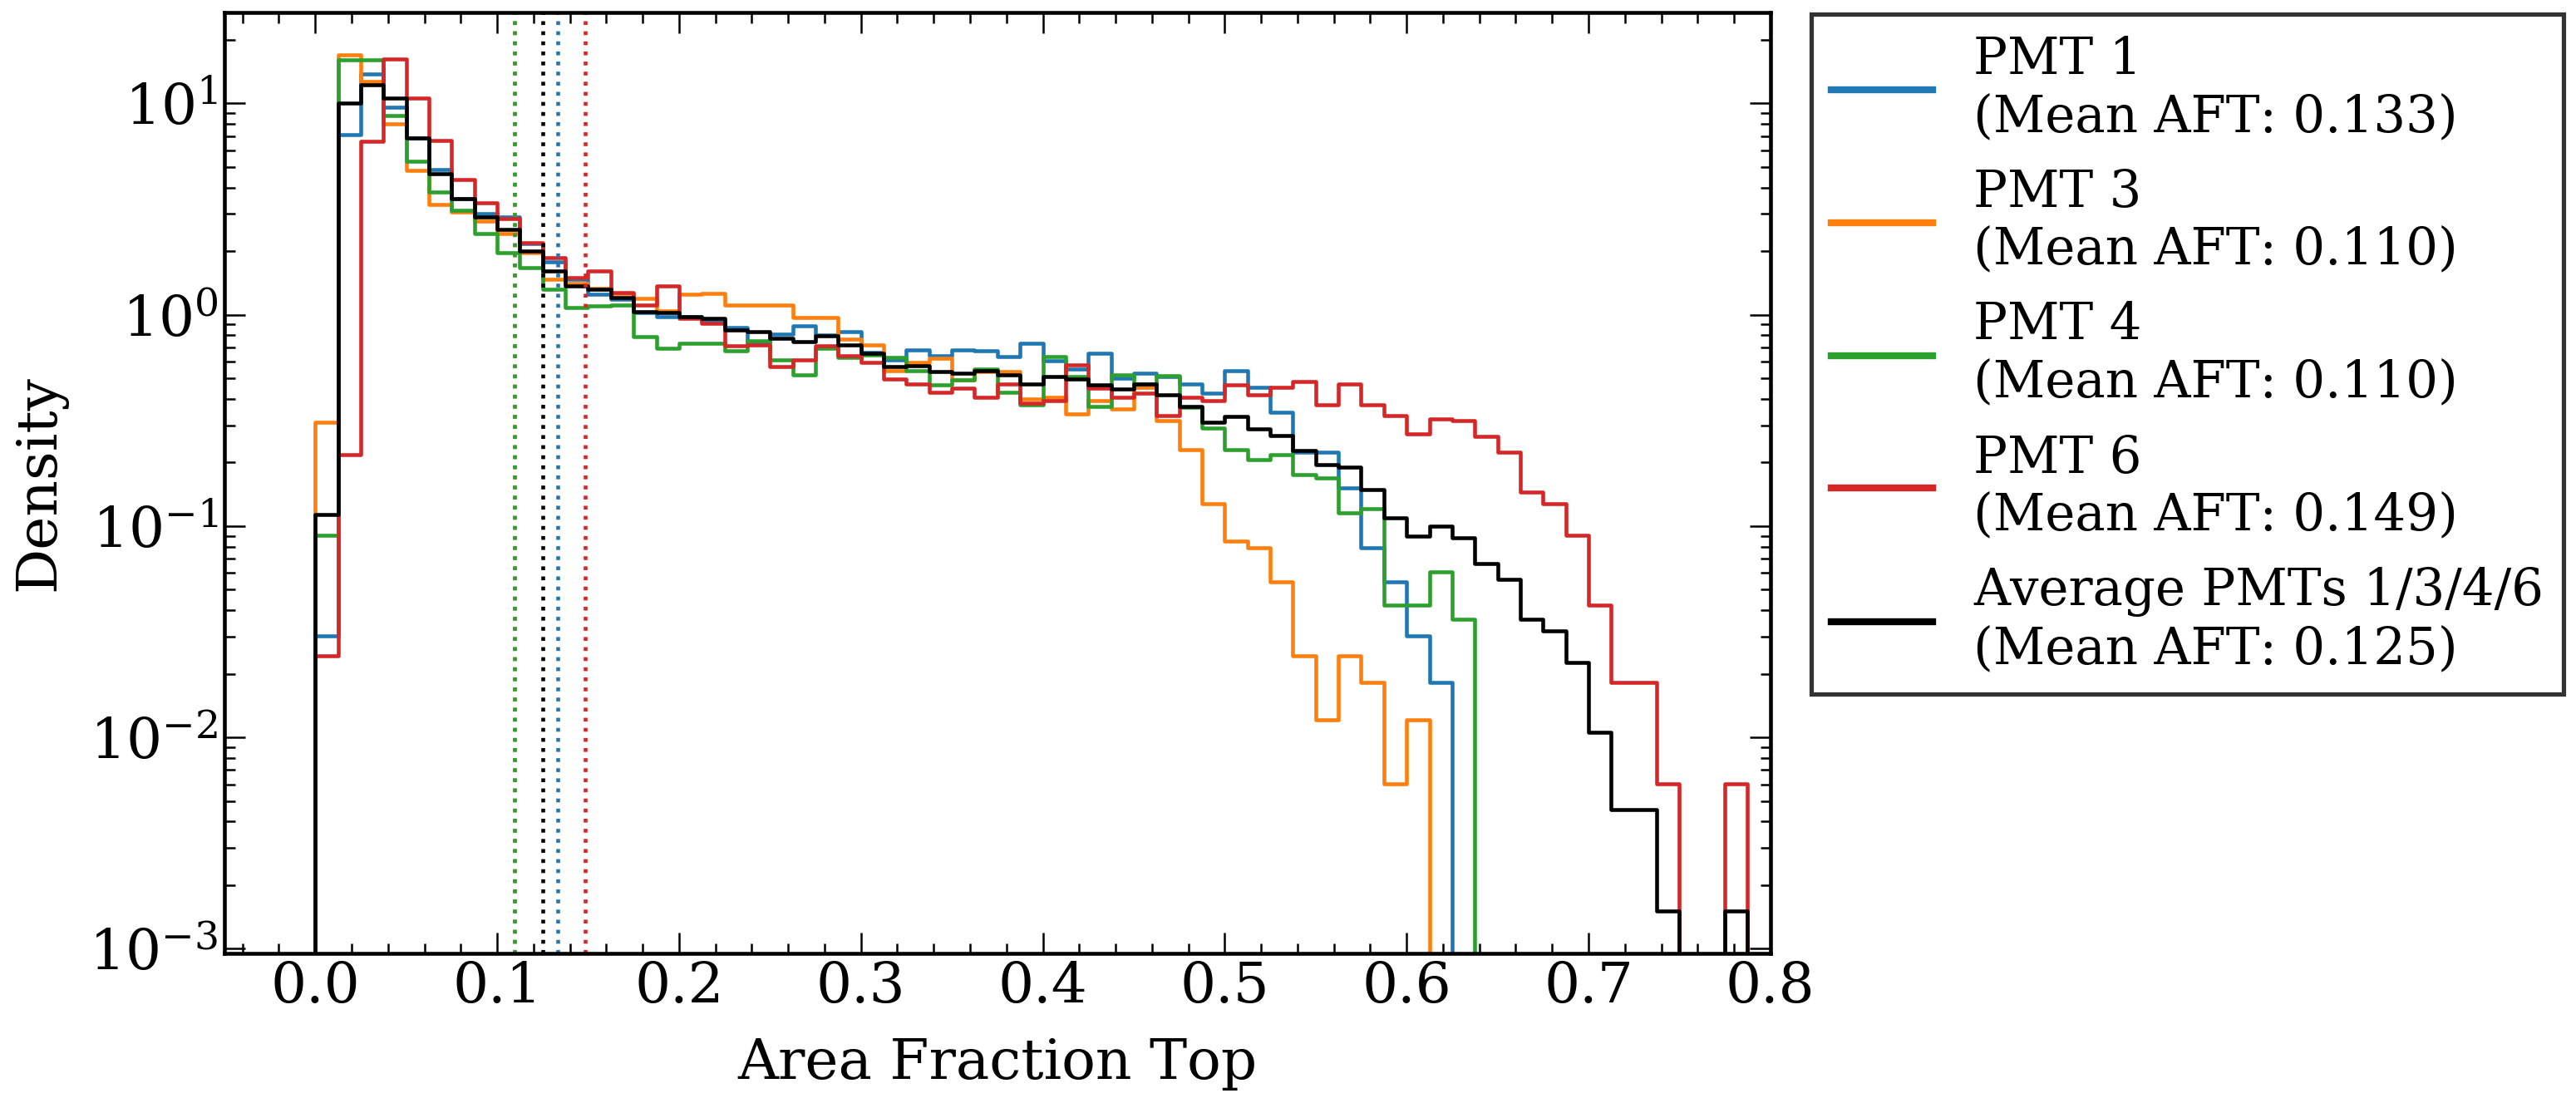

In [34]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

'''plt.hist(PMT1_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C0', range = (0,1), 
         label = 'PMT 1'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT1_HF)).mean(), 3))+")")
plt.hist(PMT3_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C1', range = (0,1), 
         label = 'PMT 3'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT3_HF)).mean(), 3))+")")
plt.hist(PMT4_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C2', range = (0,1), 
         label = 'PMT 4'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT4_HF)).mean(), 3))+")")
plt.hist(PMT6_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C3', range = (0,1), 
         label = 'PMT 6'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT6_HF)).mean(), 3))+")")'''

plt.step(df['PMT1']['hist_HF_bins_center'], df['PMT1']['hist_HF_n'], where='mid', 
         linewidth = 2.2, color = 'C0', 
         label = 'PMT 1'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT1_HF)).mean(), 3))+")")
plt.step(df['PMT3']['hist_HF_bins_center'], df['PMT3']['hist_HF_n'], where='mid', 
         linewidth = 2.2, color = 'C1', 
         label = 'PMT 3'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT3_HF)).mean(), 3))+")")
plt.step(df['PMT4']['hist_HF_bins_center'], df['PMT4']['hist_HF_n'], where='mid', 
         linewidth = 2.2, color = 'C2', 
         label = 'PMT 4'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT4_HF)).mean(), 3))+")")
plt.step(df['PMT6']['hist_HF_bins_center'], df['PMT6']['hist_HF_n'], where='mid', 
         linewidth = 2.2, color = 'C3', 
         label = 'PMT 6'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT6_HF)).mean(), 3))+")")
plt.step(df['PMT1']['hist_HF_bins_center'], PMT1346_HF_hist, where='mid', 
         linewidth = 2.2, color = 'k', 
         label = 'Average PMTs 1/3/4/6'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig(PMT1346_HF_hist_mean, 3))+")")

plt.axvline(x=(np.array(PMT1_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C0')
plt.axvline(x=(np.array(PMT3_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C1')
plt.axvline(x=(np.array(PMT4_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C2')
plt.axvline(x=(np.array(PMT6_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C3')
plt.axvline(x=PMT1346_HF_hist_mean, linewidth = 2.2, linestyle = 'dotted', color = 'k')

plt.xlabel('Area Fraction Top', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Density', fontsize = label_size, labelpad = label_pad)
#plt.title('Tagged Kr-83m S2s', fontsize = title_size, pad = title_pad)

plt.xlim(-0.05,0.8)
#plt.ylim(bottom=0)
plt.yscale('log')

# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(1.01,1.025), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_AFT_PMT1346_hist_scaled_fixedbinning_log.png")
plt.show()

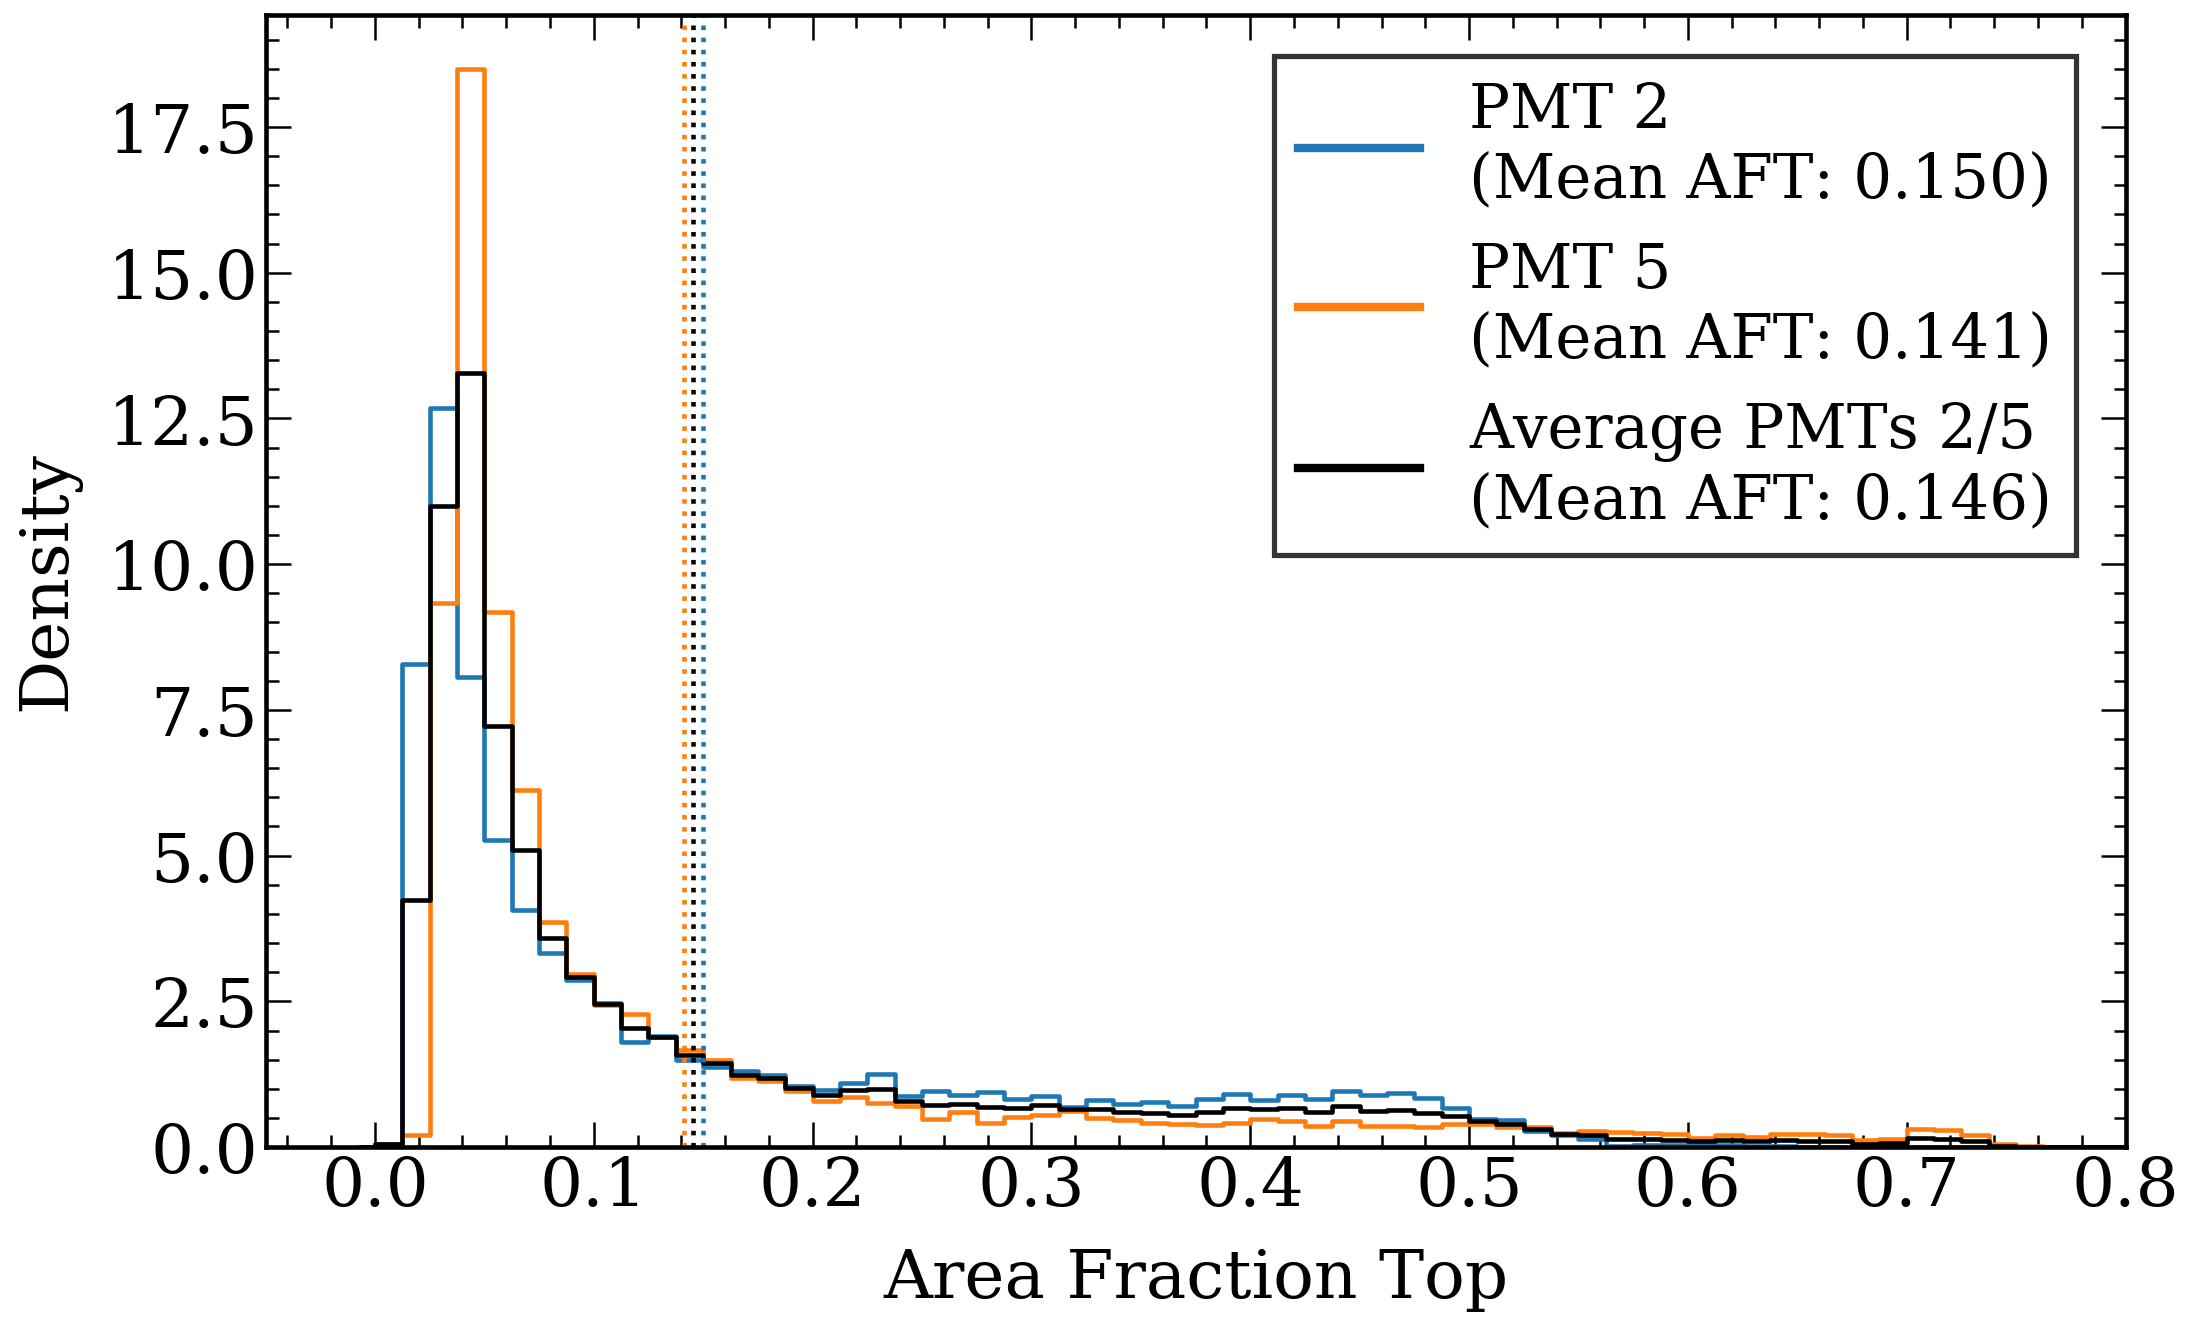

In [35]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

'''plt.hist(PMT2_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C0', range = (0,1), 
         label = 'PMT 2'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT2_HF)).mean(), 3))+")")
plt.hist(PMT5_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C1', range = (0,1), 
         label = 'PMT 5'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT5_HF)).mean(), 3))+")")'''

plt.step(df['PMT2']['hist_HF_bins_center'], df['PMT2']['hist_HF_n'], where='mid', 
         linewidth = 2.2, color = 'C0', 
         label = 'PMT 2'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT2_HF)).mean(), 3))+")")
plt.step(df['PMT5']['hist_HF_bins_center'], df['PMT5']['hist_HF_n'], where='mid', 
         linewidth = 2.2, color = 'C1', 
         label = 'PMT 5'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT5_HF)).mean(), 3))+")")

plt.step(df['PMT2']['hist_HF_bins_center'], PMT25_HF_hist, where='mid', 
         linewidth = 2.2, color = 'k', 
         label = 'Average PMTs 2/5'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig(PMT25_HF_hist_mean, 3))+")")

plt.axvline(x=(np.array(PMT2_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C0')
plt.axvline(x=(np.array(PMT5_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C1')
plt.axvline(x=PMT25_HF_hist_mean, linewidth = 2.2, linestyle = 'dotted', color = 'k')

plt.xlabel('Area Fraction Top', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Density', fontsize = label_size, labelpad = label_pad)
#plt.title('Tagged Kr-83m S2s', fontsize = title_size, pad = title_pad)

plt.xlim(-0.05,0.8)
plt.ylim(bottom=0)

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_AFT_PMT25_hist_scaled_fixedbinning.png")
plt.show()

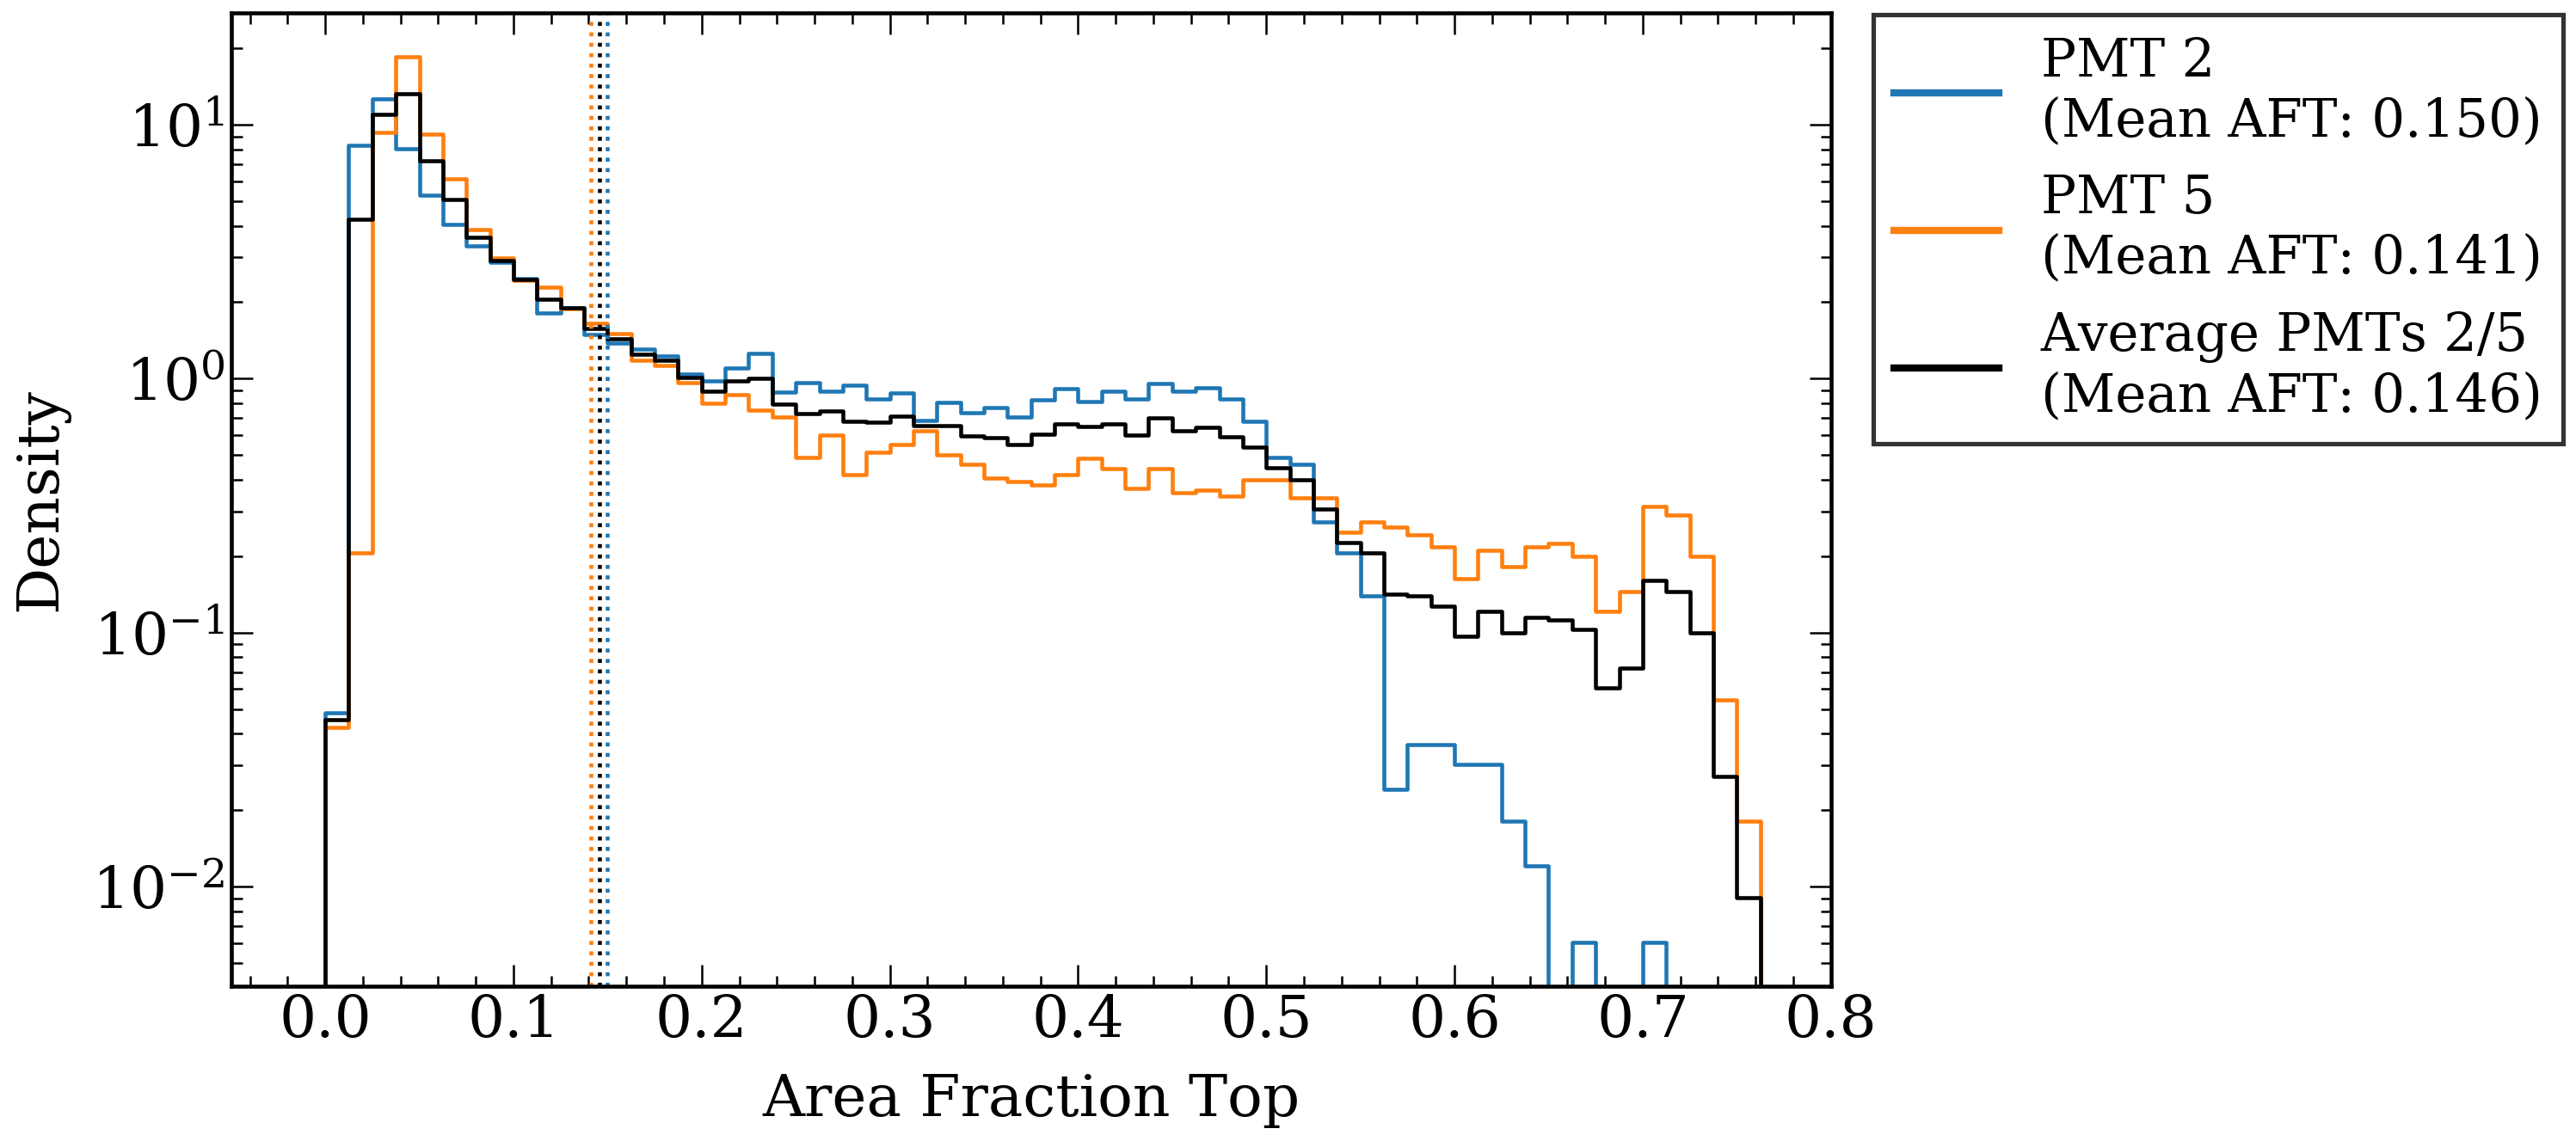

In [36]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

'''plt.hist(PMT2_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C0', range = (0,1), 
         label = 'PMT 2'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT2_HF)).mean(), 3))+")")
plt.hist(PMT5_HF, bins = 80, histtype='step', linewidth = 2.2, 
         density = True, color = 'C1', range = (0,1), 
         label = 'PMT 5'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT5_HF)).mean(), 3))+")")'''

plt.step(df['PMT2']['hist_HF_bins_center'], df['PMT2']['hist_HF_n'], where='mid', 
         linewidth = 2.2, color = 'C0', 
         label = 'PMT 2'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT2_HF)).mean(), 3))+")")
plt.step(df['PMT5']['hist_HF_bins_center'], df['PMT5']['hist_HF_n'], where='mid', 
         linewidth = 2.2, color = 'C1', 
         label = 'PMT 5'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT5_HF)).mean(), 3))+")")

plt.step(df['PMT2']['hist_HF_bins_center'], PMT25_HF_hist, where='mid', 
         linewidth = 2.2, color = 'k', 
         label = 'Average PMTs 2/5'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig(PMT25_HF_hist_mean, 3))+")")

plt.axvline(x=(np.array(PMT2_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C0')
plt.axvline(x=(np.array(PMT5_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C1')
plt.axvline(x=PMT25_HF_hist_mean, linewidth = 2.2, linestyle = 'dotted', color = 'k')

plt.xlabel('Area Fraction Top', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Density', fontsize = label_size, labelpad = label_pad)
#plt.title('Tagged Kr-83m S2s', fontsize = title_size, pad = title_pad)

plt.xlim(-0.05,0.8)
plt.yscale('log')

# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(1.01,1.025), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_AFT_PMT25_hist_scaled_fixedbinning_log.png")
plt.show()

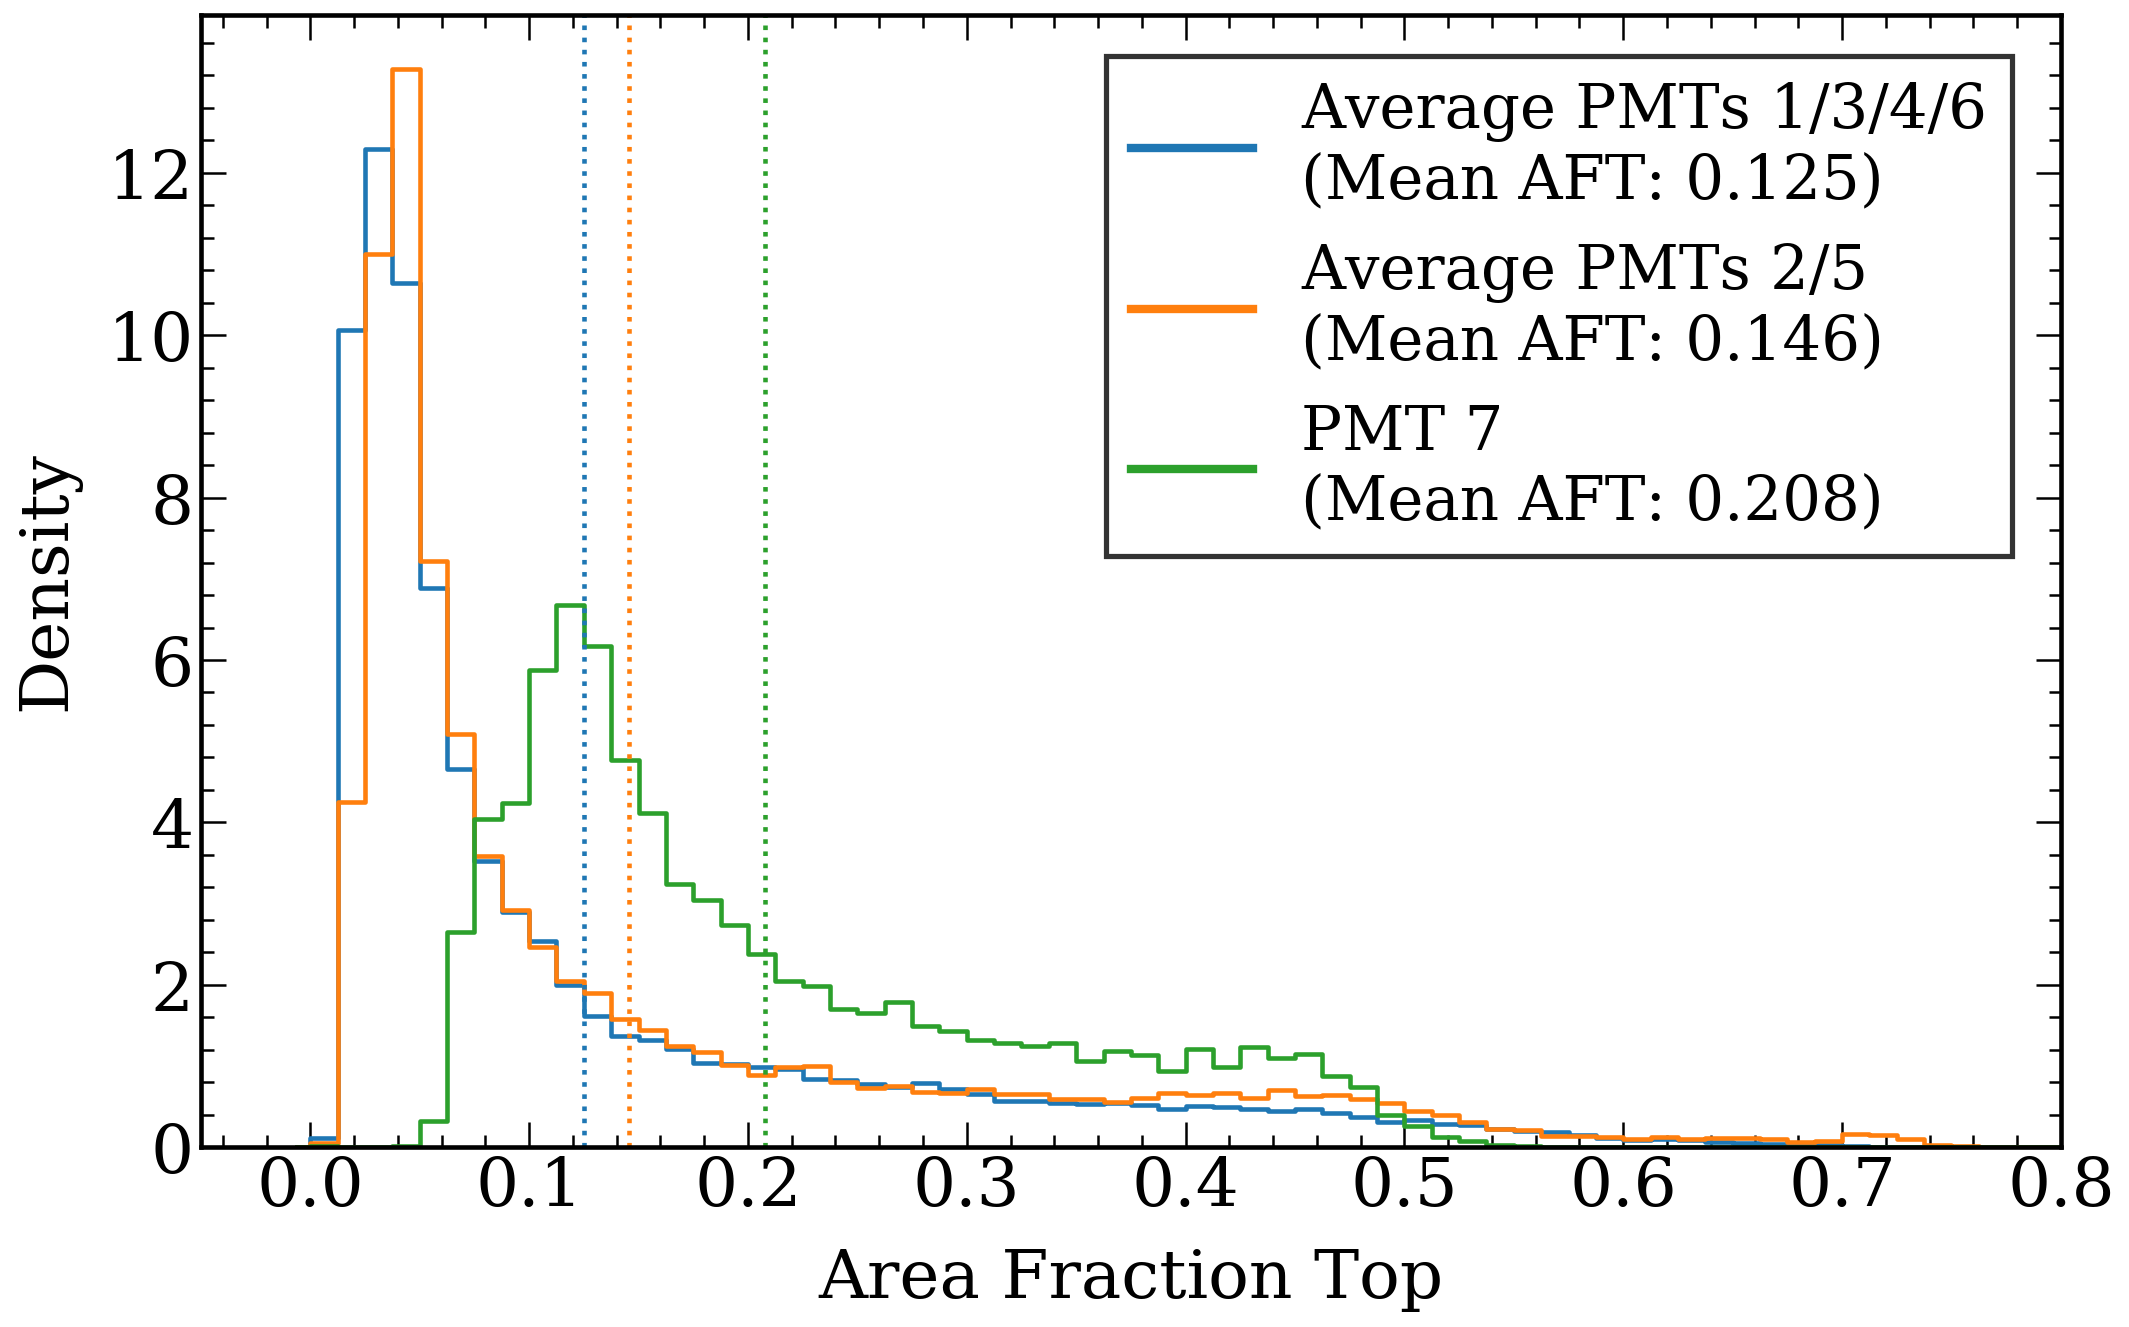

In [37]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.step(df['PMT1']['hist_HF_bins_center'], PMT1346_HF_hist, where='mid', 
         linewidth = 2.2, color = 'C0', 
         label = 'Average PMTs 1/3/4/6'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig(PMT1346_HF_hist_mean, 3))+")")
plt.step(df['PMT2']['hist_HF_bins_center'], PMT25_HF_hist, where='mid', 
         linewidth = 2.2, color = 'C1', 
         label = 'Average PMTs 2/5'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig(PMT25_HF_hist_mean, 3))+")")
plt.step(df['PMT7']['hist_HF_bins_center'], df['PMT7']['hist_HF_n'], where='mid', 
         linewidth = 2.2, color = 'C2', 
         label = 'PMT 7'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT7_HF)).mean(), 3))+")")

plt.axvline(x=PMT1346_HF_hist_mean, linewidth = 2.2, linestyle = 'dotted', color = 'C0')
plt.axvline(x=PMT25_HF_hist_mean, linewidth = 2.2, linestyle = 'dotted', color = 'C1')
plt.axvline(x=(np.array(PMT7_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C2')

plt.xlabel('Area Fraction Top', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Density', fontsize = label_size, labelpad = label_pad)
#plt.title('Tagged Kr-83m S2s', fontsize = title_size, pad = title_pad)

plt.xlim(-0.05,0.8)
plt.ylim(bottom=0)

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_AFT_PMT1av2av7_hist_scaled_fixedbinning.png")
plt.show()

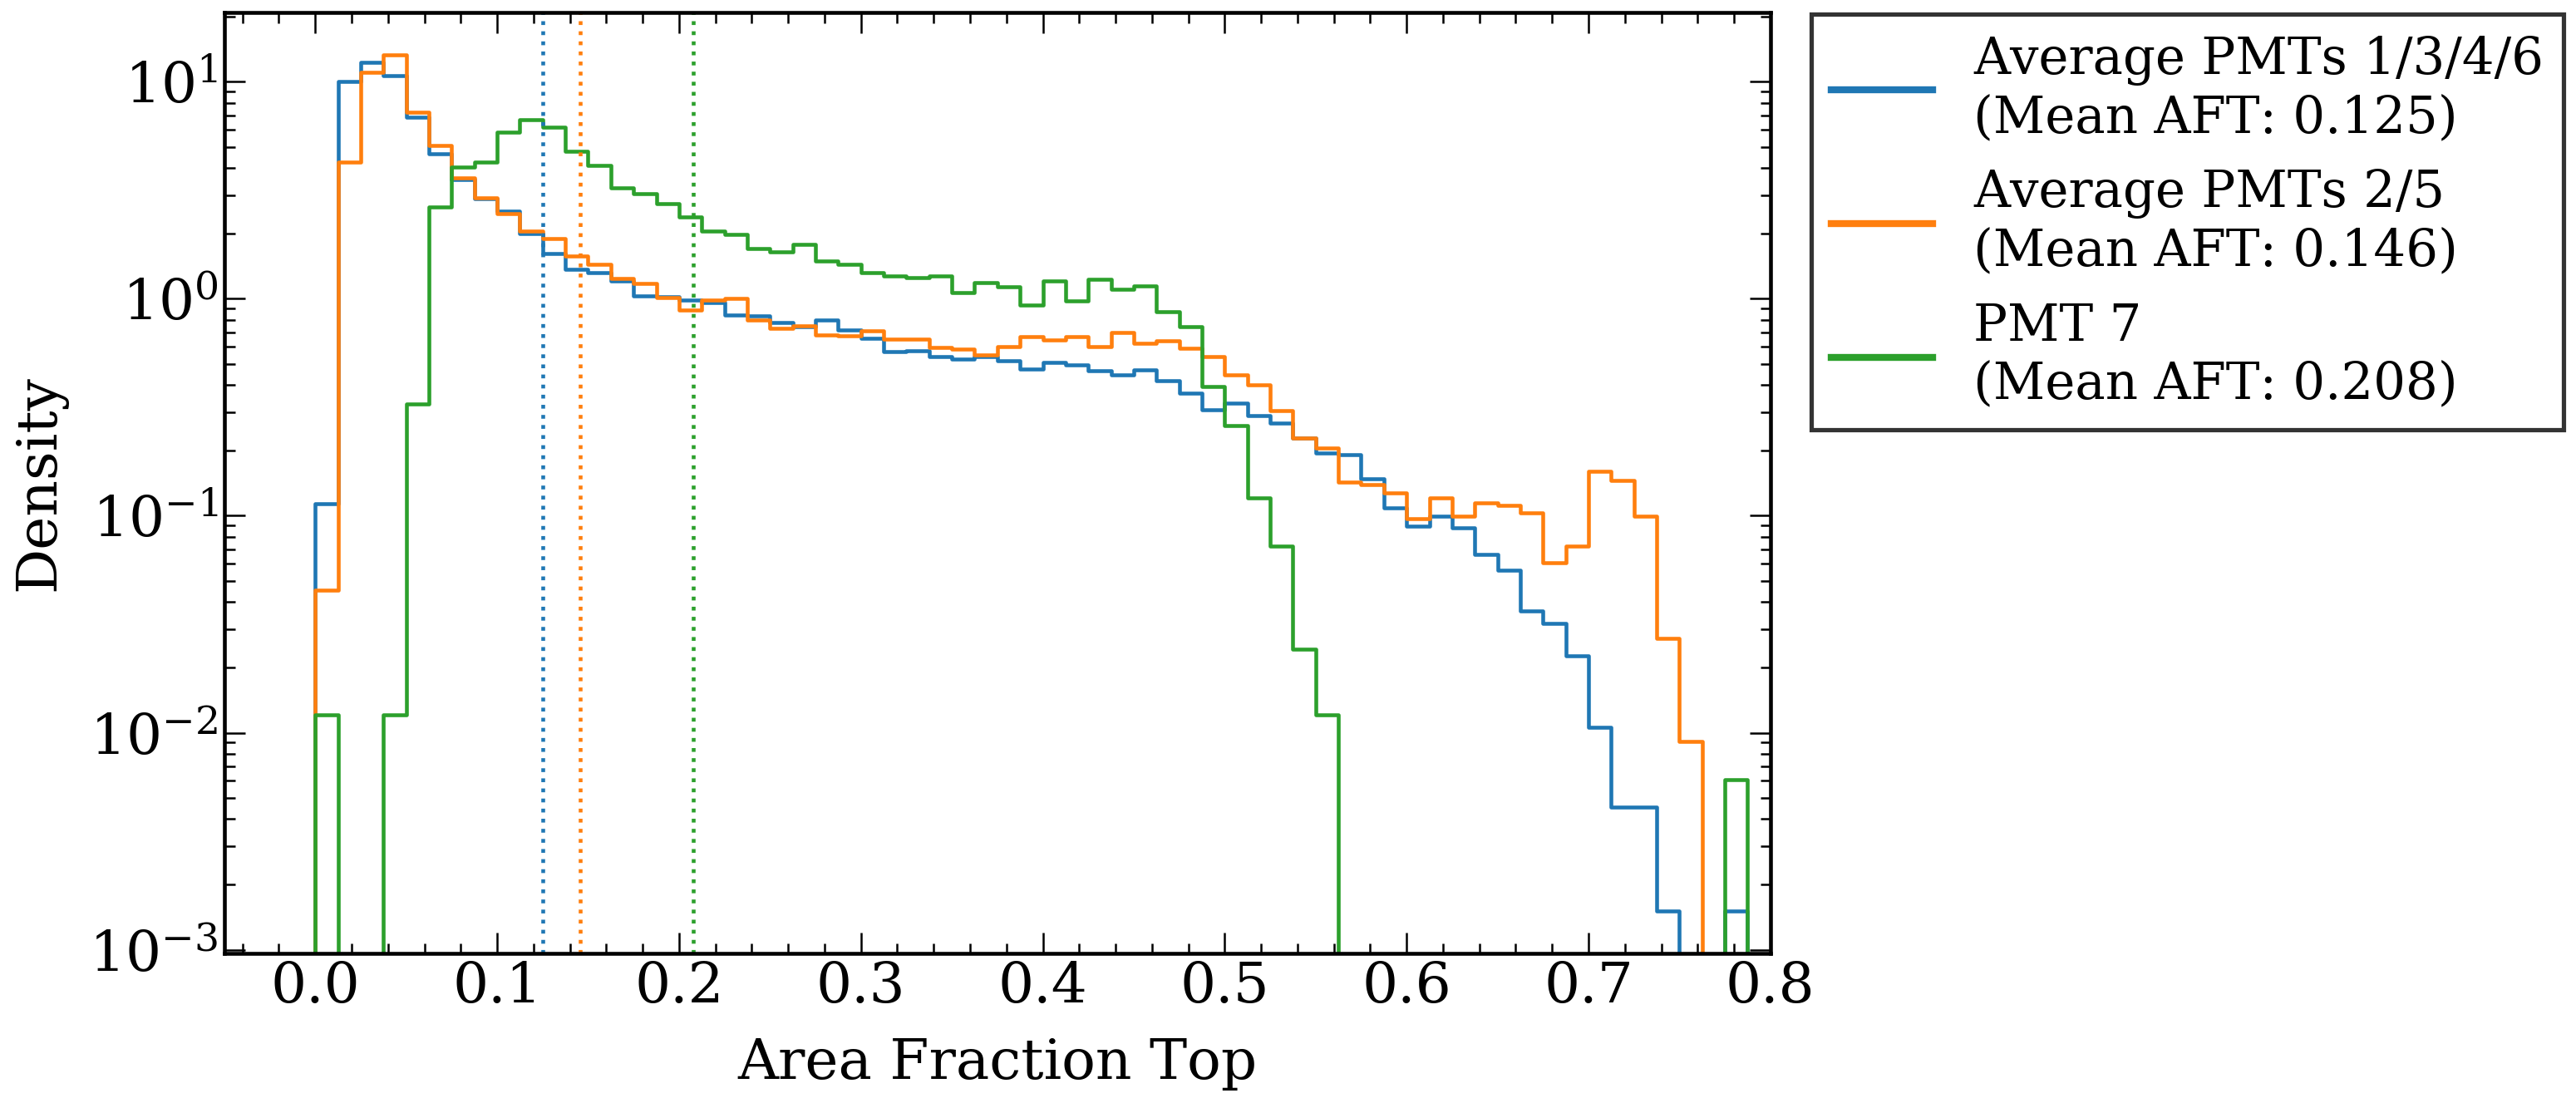

In [38]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.step(df['PMT1']['hist_HF_bins_center'], PMT1346_HF_hist, where='mid', 
         linewidth = 2.2, color = 'C0', 
         label = 'Average PMTs 1/3/4/6'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig(PMT1346_HF_hist_mean, 3))+")")
plt.step(df['PMT2']['hist_HF_bins_center'], PMT25_HF_hist, where='mid', 
         linewidth = 2.2, color = 'C1', 
         label = 'Average PMTs 2/5'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig(PMT25_HF_hist_mean, 3))+")")
plt.step(df['PMT7']['hist_HF_bins_center'], df['PMT7']['hist_HF_n'], where='mid', 
         linewidth = 2.2, color = 'C2', 
         label = 'PMT 7'+"\n(Mean AFT: "+"{0:.3f}".format(
             round_sig((np.array(PMT7_HF)).mean(), 3))+")")

plt.axvline(x=PMT1346_HF_hist_mean, linewidth = 2.2, linestyle = 'dotted', color = 'C0')
plt.axvline(x=PMT25_HF_hist_mean, linewidth = 2.2, linestyle = 'dotted', color = 'C1')
plt.axvline(x=(np.array(PMT7_HF)).mean(), linewidth = 2.2, linestyle = 'dotted', color = 'C2')

plt.xlabel('Area Fraction Top', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Density', fontsize = label_size, labelpad = label_pad)
#plt.title('Tagged Kr-83m S2s', fontsize = title_size, pad = title_pad)

plt.xlim(-0.05,0.8)
plt.yscale('log')

# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(1.01,1.025), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig(filenameprefix+"_AFT_PMT1av2av7_hist_scaled_fixedbinning_log.png")
plt.show()